# <font color = 'blue'>Lending Club Case Study</font>

                                                                                                        CREATED BY - SANCHITA PATIL


#### [Table of Contents](#table_of_contents)

---

Please use the links below to navigate to specific sections of interest:

- Click on the section titles to jump directly to the corresponding coection.

---


| Section                                            | Anchor                                    |
|----------------------------------------------------|-------------------------------------------|
| [Problem Statement](#problem-statement)            |                 
| [Objective](#objective)                            |            
| [1. Data Loading](#data-loading)                  |    
| [2. Data Exploration](#data-exploration)          |        
| [3. Data Cleaning](#data-cleaning)                | - [3.1 Redundant Column Identification and Removal](#redundant-column-identification-and-removal) <br> - [3.2 Eliminating Non-Essential Columns](#eliminating-non-essential-columns) <br> - [3.3 Dealing with missing values](#dealing-with-missing-values) <br> - [3.4 Data Transformation for Analysis Readiness](#data-transformation-for-analysis-readiness) <br> - [3.5 Outlier Treatment Analysis](#outlier-treatment-analysis) <br> - [3.6 Renaming Columns for Improved Understanding](#renaming-columns-for-improved-understanding) |
| [4. Exploratory Data Analysis](#exploratory-data-analysis) | - [4.1 Univariate Analysis](#univariate-analysis) <br> - [4.2 Segmented Univariate Analysis](#segmented-univariate-analysis) <br> - [4.3 Derived Metrics](#derived-metrics) <br> - [4.4 Bivariate Analysis](#bivariate-analysis) |
| [5. Conclusion](#conclusion)                      |                                           |


<a id="problem-statement"></a>
# Problem Statement:
The primary challenge for the leading online loan marketplace is to mitigate credit loss effectively by identifying and understanding the driving factors contributing to loan defaults. By leveraging Exploratory Data Analysis (EDA), the company aims to pinpoint the key variables strongly associated with loan defaults, thereby enabling precise risk assessment and portfolio management.<br>


<a id="objective"></a>
# Objective:
To uncover the significant predictors of loan defaults through EDA, enabling the company to enhance its risk assessment strategies and minimize credit losses.In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.

In [145]:
## Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<a id="data-loading"></a>
## 1. Data Loading :

In [146]:
# Load the dataset into a Pandas DataFrame.
# The dataset contains the complete loan data for all loans issued through the time period 2007 to 2011.
df = pd.read_csv("loan.csv")

# Display the first few rows of the DataFrame
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000          4975.00   36 months   
1  1077430    1314167       2500         2500          2500.00   60 months   
2  1077175    1313524       2400         2400          2400.00   36 months   
3  1076863    1277178      10000        10000         10000.00   36 months   
4  1075358    1311748       3000         3000          3000.00   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               NaN                 0.00   
1                NaN            NaN               NaN                 0.00   
2                NaN            NaN               NaN                 0.00   
3                NaN            NaN               NaN                 0.00   
4                NaN            NaN               NaN                 0.00   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0      0.00             NaN               NaN            NaN   
1      0.00             NaN               NaN            NaN   
2      0.00             NaN               NaN            NaN   
3      0.00             NaN               NaN            NaN   
4      0.00             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

<a id="data-exploration"></a>
## 2. Data Exploration :

In [147]:
# Checking the shape of the DataFrame to see how many rows and columns it has
df.shape

(39717, 111)

In [148]:
# DataFrame Information Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [149]:
# Display all columns with their data types
pd.set_option('display.max_rows', None)  # Display all rows
print(df.dtypes)

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

In [150]:
# Set display format for float values
pd.set_option('display.float_format', lambda x: '%.2f' % x)

#Getting summary statistics for numeric columns
df.describe()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
count   39717.00   39717.00   39717.00     39717.00         39717.00   
mean   683131.91  850463.56   11219.44     10947.71         10397.45   
std    210694.13  265678.31    7456.67      7187.24          7128.45   
min     54734.00   70699.00     500.00       500.00             0.00   
25%    516221.00  666780.00    5500.00      5400.00          5000.00   
50%    665665.00  850812.00   10000.00      9600.00          8975.00   
75%    837755.00 1047339.00   15000.00     15000.00         14400.00   
max   1077501.00 1314167.00   35000.00     35000.00         35000.00   

       installment  annual_inc      dti  delinq_2yrs  inq_last_6mths  ...  \
count     39717.00    39717.00 39717.00     39717.00        39717.00  ...   
mean        324.56    68968.93    13.32         0.15            0.87  ...   
std         208.87    63793.77     6.68         0.49            1.07  ...   
min          15.69     4000.00     0.00         0.00            0.00  ...   
25%         167.02    40404.00     8.17         0.00            0.00  ...   
50%         280.22    59000.00    13.40         0.00            1.00  ...   
75%         430.78    82300.00    18.60         0.00            1.00  ...   
max        1305.19  6000000.00    29.99        11.00            8.00  ...   

       num_tl_90g_dpd_24m  num_tl_op_past_12m  pct_tl_nvr_dlq  \
count                0.00                0.00            0.00   
mean                  NaN                 NaN             NaN   
std                   NaN                 NaN             NaN   
min                   NaN                 NaN             NaN   
25%                   NaN                 NaN             NaN   
50%                   NaN                 NaN             NaN   
75%                   NaN                 NaN             NaN   
max                   NaN                 NaN             NaN   

       percent_bc_gt_75  pub_rec_bankruptcies  tax_liens  tot_hi_cred_lim  \
count              0.00              39020.00   39678.00             0.00   
mean                NaN                  0.04       0.00              NaN   
std                 NaN                  0.20       0.00              NaN   
min                 NaN                  0.00       0.00              NaN   
25%                 NaN                  0.00       0.00              NaN   
50%                 NaN                  0.00       0.00              NaN   
75%                 NaN                  0.00       0.00              NaN   
max                 NaN                  2.00       0.00              NaN   

       total_bal_ex_mort  total_bc_limit  total_il_high_credit_limit  
count               0.00            0.00                        0.00  
mean                 NaN             NaN                         NaN  
std                  NaN             NaN                         NaN  
min                  NaN             NaN                         NaN  
25%                  NaN             NaN                         NaN  
50%                  NaN             NaN                         NaN  
75%                  NaN             NaN                         NaN  
max                  NaN             NaN                         NaN  

[8 rows x 87 columns]

In [151]:
#Getting a list of unique values in categorical columns
for column in df.select_dtypes(include='object').columns:
    print(column + ":", df[column].unique())

term: [' 36 months' ' 60 months']
int_rate: ['10.65%' '15.27%' '15.96%' '13.49%' '12.69%' '7.90%' '18.64%' '21.28%'
 '14.65%' '9.91%' '16.29%' '6.03%' '11.71%' '12.42%' '14.27%' '16.77%'
 '7.51%' '8.90%' '18.25%' '6.62%' '19.91%' '17.27%' '17.58%' '21.67%'
 '19.42%' '22.06%' '20.89%' '20.30%' '23.91%' '19.03%' '23.52%' '23.13%'
 '22.74%' '22.35%' '24.11%' '6.00%' '22.11%' '7.49%' '11.99%' '5.99%'
 '10.99%' '9.99%' '18.79%' '11.49%' '8.49%' '15.99%' '16.49%' '6.99%'
 '12.99%' '15.23%' '14.79%' '5.42%' '10.59%' '17.49%' '15.62%' '21.36%'
 '19.29%' '13.99%' '18.39%' '16.89%' '17.99%' '20.62%' '20.99%' '22.85%'
 '19.69%' '20.25%' '23.22%' '21.74%' '22.48%' '23.59%' '12.62%' '18.07%'
 '11.63%' '7.91%' '7.42%' '11.14%' '20.20%' '12.12%' '19.39%' '16.11%'
 '17.54%' '22.64%' '13.84%' '16.59%' '17.19%' '12.87%' '20.69%' '9.67%'
 '21.82%' '19.79%' '18.49%' '22.94%' '24.59%' '24.40%' '21.48%' '14.82%'
 '14.17%' '7.29%' '17.88%' '20.11%' '16.02%' '17.51%' '13.43%' '14.91%'
 '13.06%' '15.28%' '15.6

In [152]:
# Unique Values in Each Column: Sorted Overview
df.nunique().sort_values()

verification_status_joint             0
bc_util                               0
bc_open_to_buy                        0
avg_cur_bal                           0
acc_open_past_24mths                  0
inq_last_12m                          0
total_cu_tl                           0
inq_fi                                0
total_rev_hi_lim                      0
all_util                              0
max_bal_bc                            0
mo_sin_old_il_acct                    0
open_rv_24m                           0
il_util                               0
total_bal_il                          0
mths_since_rcnt_il                    0
open_il_24m                           0
open_il_12m                           0
open_il_6m                            0
open_acc_6m                           0
tot_cur_bal                           0
tot_coll_amt                          0
total_bc_limit                        0
open_rv_12m                           0
mo_sin_old_rev_tl_op                  0


<a id="data-cleaning"></a>
# 3. Data Cleaning :

<a id="redundant-column-identification-and-removal"></a>
### Redundant Column Identification and Removal

In [153]:
# Identification of Columns with Unique Value
df.nunique().sort_values()

verification_status_joint             0
bc_util                               0
bc_open_to_buy                        0
avg_cur_bal                           0
acc_open_past_24mths                  0
inq_last_12m                          0
total_cu_tl                           0
inq_fi                                0
total_rev_hi_lim                      0
all_util                              0
max_bal_bc                            0
mo_sin_old_il_acct                    0
open_rv_24m                           0
il_util                               0
total_bal_il                          0
mths_since_rcnt_il                    0
open_il_24m                           0
open_il_12m                           0
open_il_6m                            0
open_acc_6m                           0
tot_cur_bal                           0
tot_coll_amt                          0
total_bc_limit                        0
open_rv_12m                           0
mo_sin_old_rev_tl_op                  0


In [154]:
# Shape of the dataframe
df.shape

(39717, 111)

<font color='red'>**Decision : Removing Redundant Columns**</font><font color='blue'></br>Columns with 0 or 1 unique values contain either constant values or a single unique value throughout the dataset, making them irrelevant for identifying patterns, trends, or predictors related to loan defaults. By removing these redundant columns, we streamline our dataset and focus on variables that contribute meaningfully to our objective of uncovering significant predictors of loan defaults through EDA</font>

In [155]:
# Identify columns with 0 or 1 unique values
redundant_columns = df.columns[df.nunique() <= 1]
redundant_columns

Index(['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op

In [156]:
# Drop redundant columns from the DataFrame
df.drop(columns=redundant_columns, inplace=True)

In [157]:
# Shape of the dataframe after dropping redundant columns
df.shape

(39717, 48)

<a id="eliminating-non-essential-columns"></a>
### Eliminating Non-Essential Columns


<font color='red'>**Decision : Eliminating Non-Essential Columns**</font></br><font color='blue'>**id, member_id -**  Can be used for internal tracking purpose but does not directly relate to borrower characteristics or credit history.</br>
**emp_title , issue_d , url , zip_code , addr_state , funded_amnt , funded_amnt_inv** - Less critical for predicting loan default exclusion and limited contribution to understanding the primary objective of identifying the driving factors behind loan default.</br>
**total_rec_late_fee , recoveries , collection_recovery_fee , last_pymnt_d , last_pymnt_amnt , last_credit_pull_d , out_prncp , out_prncp_inv , total_pymnt , total_pymnt_inv , total_rec_prncp , total_rec_int**- These columns are related to post-default events and may introduce bias or data leakage as these columns contain information that typically becomes available only after a loan has defaulted.</font>

In [158]:
# To eliminate non-essential columns
columns_to_drop = ['id','member_id','emp_title','issue_d', 'url', 'zip_code', 'addr_state', 
                   'funded_amnt', 'funded_amnt_inv', 'total_rec_late_fee', 
                   'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 
                   'last_pymnt_amnt', 'last_credit_pull_d', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
                   'total_rec_prncp', 'total_rec_int']

# Drop irrelevant columns
df.drop(columns=columns_to_drop, inplace=True)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'desc', 'purpose', 'title', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'next_pymnt_d', 'pub_rec_bankruptcies'],
      dtype='object')

In [159]:
# Shape of the dataframe after dropping non-essential columns
df.shape

(39717, 27)

<a id="dealing-with-missing-values"></a>
### Dealing with missing values




<font color='red'>**Decision: Consideration for Dropping Columns with a high percentage of missing values (more than 90%)**</font></br>
<font color='blue'>
Columns with a high percentage of missing values (more than 90%) indicate significant gaps in the data, which can compromise its integrity and reliability.</br>
It provides little to no meaningful information for analysis. </br>
Imputing such a large portion of missing data may introduce biases or inaccuracies, leading to misleading conclusions.</br>
By dropping columns with predominantly missing values, we streamline the dataset and focus our analysis on variables that contribute significantly to our objectives</font>

In [160]:
# Calculate missing value percentage for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage

loan_amnt                 0.00
term                      0.00
int_rate                  0.00
installment               0.00
grade                     0.00
sub_grade                 0.00
emp_length                2.71
home_ownership            0.00
annual_inc                0.00
verification_status       0.00
loan_status               0.00
desc                     32.59
purpose                   0.00
title                     0.03
dti                       0.00
delinq_2yrs               0.00
earliest_cr_line          0.00
inq_last_6mths            0.00
mths_since_last_delinq   64.66
mths_since_last_record   92.99
open_acc                  0.00
pub_rec                   0.00
revol_bal                 0.00
revol_util                0.13
total_acc                 0.00
next_pymnt_d             97.13
pub_rec_bankruptcies      1.75
dtype: float64

In [161]:
# Filter columns where missing value percentage is greater than 90%
columns_to_drop = missing_percentage[missing_percentage > 90].index
columns_to_drop

Index(['mths_since_last_record', 'next_pymnt_d'], dtype='object')

In [162]:
# Drop columns with missing value percentage greater than 90%
df.drop(columns=columns_to_drop, inplace=True)

In [163]:
# Verify if columns have been dropped
columns_to_drop.isnull().sum()

0

In [164]:
# Shape of the dataframe
df.shape

(39717, 25)

<font color='red'>**Decision: Consideration for Dropping Columns desc and mths_since_last_delinq**</font></br> <font color='blue'>
Two columns, desc and mths_since_last_delinq, exhibit high percentages of missing values (33% and 65%, respectively).</br>
While the desc column contains textual descriptions from borrowers, it was not deemed essential for our analysis.</br>
In contrast, the mths_since_last_delinq column, crucial for assessing credit risk, contains diverse values (95 unique), rendering imputation less reliable.</br>
Considering these challenges and their limited relevance to our analysis objective, we will drop these columns to ensure the integrity of our results.</font>

In [165]:
# Calculate missing value percentage for rest of the column
(df.isnull().sum() / len(df)) * 100

loan_amnt                 0.00
term                      0.00
int_rate                  0.00
installment               0.00
grade                     0.00
sub_grade                 0.00
emp_length                2.71
home_ownership            0.00
annual_inc                0.00
verification_status       0.00
loan_status               0.00
desc                     32.59
purpose                   0.00
title                     0.03
dti                       0.00
delinq_2yrs               0.00
earliest_cr_line          0.00
inq_last_6mths            0.00
mths_since_last_delinq   64.66
open_acc                  0.00
pub_rec                   0.00
revol_bal                 0.00
revol_util                0.13
total_acc                 0.00
pub_rec_bankruptcies      1.75
dtype: float64

In [166]:
# Dropping columns desc and mths_since_last_delinq
df.drop(columns=['desc', 'mths_since_last_delinq'], inplace=True)

In [167]:
# Shape of the dataframe after dropping columns desc and mths_since_last_delinq
df.shape

(39717, 23)

<font color='red'>**Decision:Imputation  of emp_length and title column with Mode**</font></br> <font color='blue'>
title and emp_length columns are categorical variables with discrete categories.In the case of categorical variables, the mode (most frequent value) is often the most appropriate measure of central tendency.Categorical variables do not have outliers in the same sense as continuous variables. Therefore, the mode is not influenced by extreme values and remains a stable measure of central tendency.</font>

In [168]:
#Percentage of Missing Values per Column (> 0%)
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage[missing_percentage > 0]

emp_length             2.71
title                  0.03
revol_util             0.13
pub_rec_bankruptcies   1.75
dtype: float64

In [169]:
# Impute missing values in emp_length with mode
mode_emp_length = df['emp_length'].mode()[0]  # Calculate the mode
mode_emp_length

'10+ years'

In [170]:
df['emp_length'].fillna(mode_emp_length, inplace=True)  # Impute missing values with mode

In [171]:
# Impute missing values in title with mode
title_mode = df['title'].mode()[0]
title_mode
# Replace missing values with the mode
df['title'].fillna(title_mode, inplace=True)

In [172]:
#Again calculate the Percentage of Missing Values per Column (> 0%)
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage[missing_percentage > 0]

revol_util             0.13
pub_rec_bankruptcies   1.75
dtype: float64

<font color='red'>**Decision : Imputation of revol_util column with Median**</font></br> <font color='blue'>Based on the summary statistics provided below:</br>
<font color='blue'>The mean and median values are very close, with the mean being approximately 48.83% and the median being approximately 49.30%. </br>
The standard deviation is approximately 28.33%, suggesting a relatively high variability or dispersion of utilization rates around the mean.</br>
Median imputation was chosen as it provides a more reliable estimate of the central tendency in the presence of skewed distributions and outliers, ensuring a more accurate representation of the typical utilization rate in the revol_util column.</font>

In [173]:
# Unique Values of revol_util Column
df['revol_util'].unique()

array(['83.70%', '9.40%', '98.50%', ..., '49.63%', '0.04%', '7.28%'],
      dtype=object)

In [174]:
# Remove '%' from revol_util and convert to numeric
df['revol_util'] = df['revol_util'].str.rstrip('%').astype(float)
df['revol_util'].dtype

dtype('float64')

In [175]:
df['revol_util'].describe()

count   39667.00
mean       48.83
std        28.33
min         0.00
25%        25.40
50%        49.30
75%        72.40
max        99.90
Name: revol_util, dtype: float64

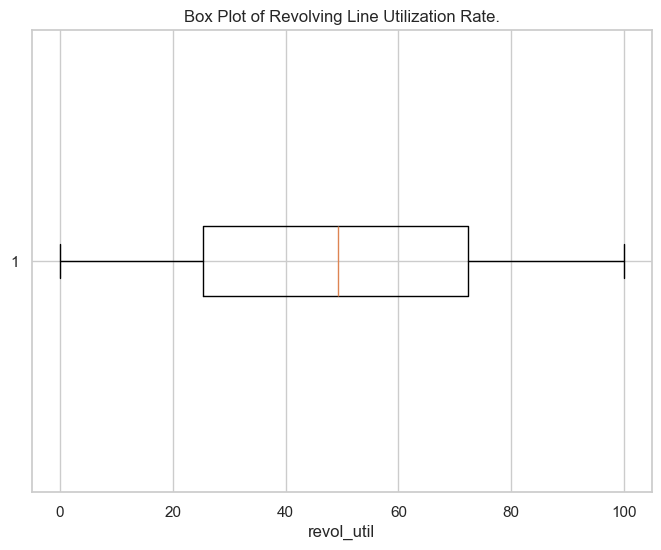

In [176]:
import matplotlib.pyplot as plt

# Create a box plot for revol_util
plt.figure(figsize=(8, 6))
plt.boxplot(df['revol_util'].dropna(), vert=False)
plt.title('Box Plot of Revolving Line Utilization Rate.')
plt.xlabel('revol_util')
plt.show()

In [177]:
# Calculate median
median_revol_util = df['revol_util'].median()
median_revol_util 

49.3

In [178]:
# Impute missing values with median
df['revol_util'].fillna(median_revol_util, inplace=True)

In [179]:
#Again calculate the Percentage of Missing Values per Column (> 0%)
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage[missing_percentage > 0]

pub_rec_bankruptcies   1.75
dtype: float64

<font color='red'> **Decision: Imputation of pub_rec_bankruptcies column with Mode**</font></br><font color='blue'>Based on the provided summary statistics below for the pub_rec_bankruptcies column </br>
The majority of values (75%) are 0, with a median (50th percentile) also at 0. </br>
There is a small number of non-zero values (25th percentile = 0, max = 2). </br>
The mean (0.04) indicates a low average number of bankruptcies.</br>
In cases where there is a clear majority or dominant category (such as 0 bankruptcies in this case), the mode provides a more accurate representation of the prevalent pattern.</font>

In [180]:
# Summary Statistics of pub_rec_bankruptcies
df['pub_rec_bankruptcies'].describe()

count   39020.00
mean        0.04
std         0.20
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         2.00
Name: pub_rec_bankruptcies, dtype: float64

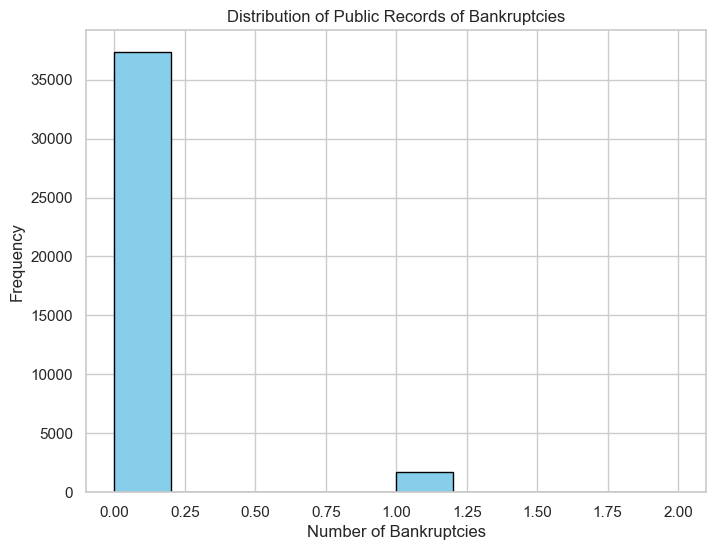

In [181]:
# "Distribution of Bankruptcy Records and Imputation Strategy"
# Plot histogram of pub_rec_bankruptcies
plt.figure(figsize=(8, 6))
plt.hist(df['pub_rec_bankruptcies'].dropna(), bins=10, color='skyblue', edgecolor='black')
plt.xlabel('Number of Bankruptcies')
plt.ylabel('Frequency')
plt.title("Distribution of Public Records of Bankruptcies")
plt.grid(True)
plt.show()

In [182]:
# Calculate the mode of pub_rec_bankruptcies
mode_value = df['pub_rec_bankruptcies'].mode()[0]
mode_value

0.0

In [183]:
# Impute missing values with the mode
df['pub_rec_bankruptcies'].fillna(mode_value, inplace=True)

In [184]:
# Calculate missing value percentage for rest of the column
(df.isnull().sum() / len(df)) * 100

loan_amnt              0.00
term                   0.00
int_rate               0.00
installment            0.00
grade                  0.00
sub_grade              0.00
emp_length             0.00
home_ownership         0.00
annual_inc             0.00
verification_status    0.00
loan_status            0.00
purpose                0.00
title                  0.00
dti                    0.00
delinq_2yrs            0.00
earliest_cr_line       0.00
inq_last_6mths         0.00
open_acc               0.00
pub_rec                0.00
revol_bal              0.00
revol_util             0.00
total_acc              0.00
pub_rec_bankruptcies   0.00
dtype: float64

<a id="data-transformation-for-analysis-readiness"></a>
### Data Transformation for Analysis Readiness

In [185]:
# Get unique values and data types of all columns
unique_values = df.apply(pd.unique)
data_types = df.dtypes

# Combine unique values and data types into a DataFrame
unique_df = pd.DataFrame({'Unique_Values': unique_values, 'Data_Types': data_types})

# Display the DataFrame
print(unique_df)

                                                          Unique_Values  \
loan_amnt             [5000, 2500, 2400, 10000, 3000, 7000, 5600, 53...   
term                                           [ 36 months,  60 months]   
int_rate              [10.65%, 15.27%, 15.96%, 13.49%, 12.69%, 7.90%...   
installment           [162.87, 59.83, 84.33, 339.31, 67.79, 156.46, ...   
grade                                             [B, C, A, E, F, D, G]   
sub_grade             [B2, C4, C5, C1, B5, A4, E1, F2, C3, B1, D1, A...   
emp_length            [10+ years, < 1 year, 1 year, 3 years, 8 years...   
home_ownership                       [RENT, OWN, MORTGAGE, OTHER, NONE]   
annual_inc            [24000.0, 30000.0, 12252.0, 49200.0, 80000.0, ...   
verification_status           [Verified, Source Verified, Not Verified]   
loan_status                          [Fully Paid, Charged Off, Current]   
purpose               [credit_card, car, small_business, other, wedd...   
title                 [Co

In [186]:
 #"term" column is being transformed by removing the "months" keyword and converting its data type from object to integer.
df['term'] = df['term'].str.replace(' months', '').astype(int)

In [187]:
#Term Column Check
df['term'].head()

0    36
1    60
2    36
3    36
4    60
Name: term, dtype: int32

In [188]:
 #"int_rate" column is being transformed by removing the "%" sign and converting its data type from object to integer.
df['int_rate'] = df['int_rate'].str.rstrip('%').astype(float)
df['int_rate'].head()

0   10.65
1   15.27
2   15.96
3   13.49
4   12.69
Name: int_rate, dtype: float64

In [189]:
# In emp_length column replace'< 1 year' to '0 years'. Remove '+' sign and drop ('years','year') keyword and convert data type to integer
df['emp_length'] = df['emp_length'].str.replace('< 1 year', '0 years').str.replace('+', '').str.replace(' years', '').str.replace(' year', '').astype(int)
df['emp_length'].head()

0    10
1     0
2    10
3    10
4     1
Name: emp_length, dtype: int32

In [190]:
# Convert 'earliest_cr_line' to datetime type
# The M8[ns] datatype typically refers to a datetime64[ns] data type in pandas, which represents datetime values with nanosecond precision. 
# It's the default datetime type used by pandas for storing datetime values.
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')
df['earliest_cr_line'].dtypes

dtype('<M8[ns]')

In [191]:
df['title'].unique()

array(['Computer', 'bike', 'real estate business', ...,
       'Retiring credit card debt', 'MBA Loan Consolidation', 'JAL Loan'],
      dtype=object)

In [192]:
 # Extract month and year into separate columns
df['earliest_cr_month'] = df['earliest_cr_line'].dt.month
df['earliest_cr_year'] = df['earliest_cr_line'].dt.year

In [193]:
# Drop the original 'earliest_cr_line' column
df.drop('earliest_cr_line', axis=1, inplace=True)
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'title', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'pub_rec_bankruptcies', 'earliest_cr_month',
       'earliest_cr_year'],
      dtype='object')

<a id="outlier-treatment-analysis"></a>
### Outlier Treatment Analysis

<font color='red'>**Decision : Based on the statistics provided for the 'loan_amnt' column I would not consider removing outliers**<font color='blue'></br>
The maximum loan amount is 35,000, which is within a reasonable range for loan applications.</br>
The minimum loan amount is 500, which is also plausible for small loans.</br>
Given these observations, I would not consider removing outliers in this case. The range of loan amounts appears to be realistic and representative of typical loan applications. Removing outliers could potentially lead to loss of valuable information and bias in the analysis.</font>

In [194]:
# Summary Statistics for Loan Amount
df['loan_amnt'].describe()

count   39717.00
mean    11219.44
std      7456.67
min       500.00
25%      5500.00
50%     10000.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64

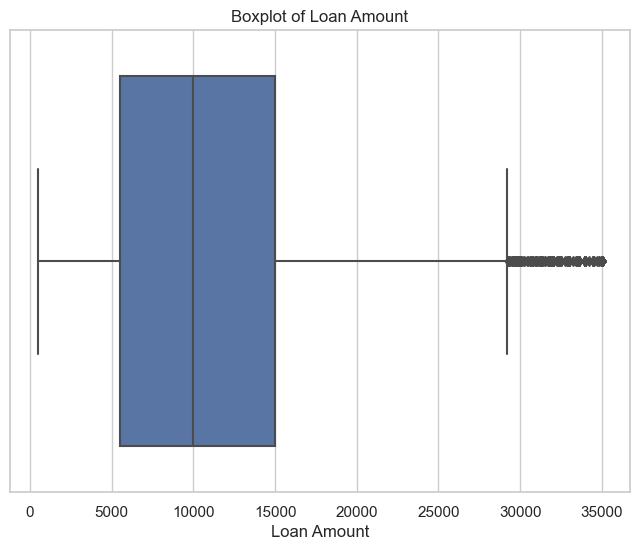

In [195]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['loan_amnt'])
plt.title('Boxplot of Loan Amount')
plt.xlabel('Loan Amount')
plt.show()

<font color='red'>**Decision : Removing outliers from the 'annual_inc' column at the 95th percentile**</font><font color='blue'></br>
Removing outliers at the 95th percentile ensures that only the top 5% of the highest income values, which are potentially outliers, are excluded from the analysis.</font>

In [196]:
# Summary Statistics for Annual Income
df['annual_inc'].describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9,0.95,0.96,0.97,0.98,0.99,0.995,0.999])

count     39717.00
mean      68968.93
std       63793.77
min        4000.00
10%       30000.00
25%       40404.00
50%       59000.00
75%       82300.00
90%      116000.00
95%      142000.00
96%      150000.00
97%      165757.92
98%      187000.00
99%      234999.36
99.5%    300000.00
99.9%    676858.88
max     6000000.00
Name: annual_inc, dtype: float64

In [197]:
#Remove the outliers and remove the records above 95%
df = df[df['annual_inc'] <= df['annual_inc'].quantile(0.95)]

In [198]:
# Updated Summary Statistics for Annual Income
df.annual_inc.describe()

count    37743.00
mean     61071.86
std      27831.00
min       4000.00
25%      40000.00
50%      56000.00
75%      78000.00
max     142000.00
Name: annual_inc, dtype: float64

<a id="renaming-columns-for-improved-understanding"></a>
### Renaming Columns for Improved Understanding

<font color='red'> **Decision: Renaming columns**</font></br><font color='blue'>Renaming the columns was necessary to improve the readability and understanding of the dataset.These descriptive column names help convey the meaning and purpose of each attribute, facilitating better communication and understanding among stakeholders and data analysts.</font>

In [199]:
# Original column names
original_column_names = ['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
                        'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
                        'loan_status', 'purpose', 'title', 'dti', 'delinq_2yrs',
                        'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
                        'total_acc', 'pub_rec_bankruptcies', 'earliest_cr_month', 'earliest_cr_year']

# Updated column names
updated_column_names = ['Loan_Amount', 'Loan_Term', 'Interest_Rate', 'Monthly_Installment', 'Credit_Grade', 'Credit_Subgrade',
                      'Employment_Length', 'Home_Ownership_Status', 'Annual_Income', 'Income_Verification_Status',
                      'Loan_Status', 'Loan_Purpose', 'Loan_Title', 'Debt_to_Income_Ratio', 'Number_of_Delinquencies_in_the_Last_2_Years',
                      'Number_of_Inquiries_in_the_Last_6_Months', 'Number_of_Open_Credit_Accounts', 'Number_of_Public_Records', 'Revolving_Balance', 'Revolving_Utilization_Rate',
                      'Total_Number_of_Credit_Accounts', 'Number_of_Public_Record_Bankruptcies', 'Earliest_Credit_Line_Month', 'Earliest_Credit_Line_Year']

In [200]:
# Create a dictionary mapping original column names to updated column names
column_name_mapping = dict(zip(original_column_names, updated_column_names))
column_name_mapping

{'loan_amnt': 'Loan_Amount',
 'term': 'Loan_Term',
 'int_rate': 'Interest_Rate',
 'installment': 'Monthly_Installment',
 'grade': 'Credit_Grade',
 'sub_grade': 'Credit_Subgrade',
 'emp_length': 'Employment_Length',
 'home_ownership': 'Home_Ownership_Status',
 'annual_inc': 'Annual_Income',
 'verification_status': 'Income_Verification_Status',
 'loan_status': 'Loan_Status',
 'purpose': 'Loan_Purpose',
 'title': 'Loan_Title',
 'dti': 'Debt_to_Income_Ratio',
 'delinq_2yrs': 'Number_of_Delinquencies_in_the_Last_2_Years',
 'inq_last_6mths': 'Number_of_Inquiries_in_the_Last_6_Months',
 'open_acc': 'Number_of_Open_Credit_Accounts',
 'pub_rec': 'Number_of_Public_Records',
 'revol_bal': 'Revolving_Balance',
 'revol_util': 'Revolving_Utilization_Rate',
 'total_acc': 'Total_Number_of_Credit_Accounts',
 'pub_rec_bankruptcies': 'Number_of_Public_Record_Bankruptcies',
 'earliest_cr_month': 'Earliest_Credit_Line_Month',
 'earliest_cr_year': 'Earliest_Credit_Line_Year'}

In [201]:
# Rename columns in your dataframe
df.rename(columns=column_name_mapping, inplace=True)
df.columns

Index(['Loan_Amount', 'Loan_Term', 'Interest_Rate', 'Monthly_Installment',
       'Credit_Grade', 'Credit_Subgrade', 'Employment_Length',
       'Home_Ownership_Status', 'Annual_Income', 'Income_Verification_Status',
       'Loan_Status', 'Loan_Purpose', 'Loan_Title', 'Debt_to_Income_Ratio',
       'Number_of_Delinquencies_in_the_Last_2_Years',
       'Number_of_Inquiries_in_the_Last_6_Months',
       'Number_of_Open_Credit_Accounts', 'Number_of_Public_Records',
       'Revolving_Balance', 'Revolving_Utilization_Rate',
       'Total_Number_of_Credit_Accounts',
       'Number_of_Public_Record_Bankruptcies', 'Earliest_Credit_Line_Month',
       'Earliest_Credit_Line_Year'],
      dtype='object')

<font color='red'>**Observation :** </font><font color='blue'>Breakdown of the columns into different categories:</br>
**Employment-related Variables :** Employment_Title , Employment_Length </br>
**Financial Variables** : Annual_Income , Debt_to_Income_Ratio </br>
**Credit History Variables** : Number_of_Delinquencies_in_the_Last_2_Years , Earliest_Credit_Line_Month , Number_of_Inquiries_in_the_Last_6_Months , Number_of_Open_Credit_Accounts , Number_of_Public_Records , Number_of_Public_Record_Bankruptcies </br>
**Loan-related Variables :** Loan_Amount , Loan_Term , Interest_Rate , Monthly_Installment , Credit_Grade , Credit_Subgrade , Income_Verification_Status , Loan_Purpose,Loan_Title , Revolving_Balance , Revolving_Utilization_Rate , Total_Number_of_Credit_Accounts , Home_Ownership_Status </br>
**Loan Status Variable** : Loan_Status </font>  <br><br>

<a id="exploratory-data-analysis"></a>
# 4. Exploratory Data Analysis

_____________________________________________________________________________________________________________________________________________________________________________________________________<br><font color='red'><b>Final DataFrame Overview for Analysis</b></font> <font color='blue'> <br>
<b>Loan_Amount:</b> The amount of money requested by the borrower in the loan application.<br>
<b>Loan_Term_Months:</b> The duration of the loan in months.<br>
<b>Interest_Rate_Percent:</b> The annual interest rate charged on the loan.<br>
<b>Monthly_Installment:</b> The monthly payment owed by the borrower if the loan is originated.<br>
<b>Credit_Grade:</b> The grade assigned to the loan by the lending club.<br>
<b>Credit_Subgrade:</b> The subgrade assigned to the loan by the lending club.<br>
<b>Employment_Length_Years:</b> The length of employment of the borrower in years.<br>
<b>Home_Ownership_Status:</b> The status of home ownership provided by the borrower.<br>
<b>Annual_Income:</b> The self-reported annual income provided by the borrower during registration.<br>
<b>Income_Verification_Status:</b> The status indicating if the income was verified by the lending club.<br>
<b>Loan_Status:</b> The current status of the loan.<br>
<b>Loan_Purpose:</b> The purpose for which the loan was requested by the borrower.<br>
<b>Loan_Title:</b> The title of the loan provided by the borrower.<br>
<b>Debt_to_Income_Ratio:</b> The ratio of the borrower’s total monthly debt payments to their monthly income.<br>
<b>Number_of_Delinquencies_in_the_Last_2_Years:</b> The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.<br>
<b>Number_of_Inquiries_in_the_Last_6_Months:</b> The number of inquiries made in the past 6 months.<br>
<b>Number_of_Open_Credit_Accounts:</b> The number of open credit lines in the borrower's credit file.<br>
<b>Number_of_Public_Records:</b> The number of derogatory public records.<br>
<b>Revolving_Balance:</b> The total credit revolving balance.<br>
<b>Revolving_Utilization_Rate:</b> The revolving line utilization rate.<br>
<b>Total_Number_of_Credit_Accounts:</b> The total number of credit lines currently in the borrower's credit file.<br>
<b>Number_of_Public_Record_Bankruptcies:</b> The number of public record bankruptcies.<br>
<b>Earliest_Credit_Line_Month:</b> The month in which the borrower's earliest reported credit line was opened.<br>
<b>Earliest_Credit_Line_Year:</b> The year in which the borrower's earliest reported credit line was opened. <br>
_____________________________________________________________________________________________________________________________________________________________________________________________________


<a id="univariate-analysis"></a>
### Univariate Analysis 

In [202]:
#Plot the distribution of charged-off loans based on a specified column in the DataFrame.

def barplot_charged_off_distribution(df, column_name, num_bins=10):
    # Filter charged-off loans
    charged_off_loans = df[df['Loan_Status'] == 'Charged Off']

    # Calculate bin edges
    col_min = charged_off_loans[column_name].min()
    col_max = charged_off_loans[column_name].max()
    bin_edges = [col_min + (i * ((col_max - col_min) / num_bins)) for i in range(num_bins + 1)]

    # Calculate charged-off percentage for each bin
    charged_off_percentages = []
    for i in range(len(bin_edges) - 1):
        bin_start = bin_edges[i]
        bin_end = bin_edges[i + 1]
        
        # Mask to filter loans falling within the current bin range
        bin_mask = (charged_off_loans[column_name] >= bin_start) & (charged_off_loans[column_name] < bin_end)
        
        # Count of charged-off loans within the current bin range
        bin_charged_off_count = charged_off_loans[bin_mask].shape[0]

        # Total count of loans falling within the current bin range
        total_bin_count = df[(df[column_name] >= bin_start) & (df[column_name] < bin_end)].shape[0]

        # Calculate charged-off percentage for the current bin
        charged_off_percentage = (bin_charged_off_count / total_bin_count) * 100 if total_bin_count != 0 else 0
        charged_off_percentages.append(charged_off_percentage)

    # Sort charged_off_percentages in ascending order
    charged_off_percentages_sorted = sorted(charged_off_percentages)

    # Create a DataFrame to represent the data in tabular form
    bin_ranges = [f'{bin_edges[i]:.0f}-{bin_edges[i+1]:.0f}' for i in range(len(bin_edges)-1)]
    data = {'Bin Range': bin_ranges, 'Charged-Off Percentage (%)': charged_off_percentages_sorted}
    df_table = pd.DataFrame(data)

    # Summary statistics of the specified column
    col_summary = charged_off_loans[column_name].describe()
    
    # Plot the distribution
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(charged_off_percentages_sorted)), charged_off_percentages_sorted, color='skyblue', edgecolor='black')
    plt.title(f'Charged-Off Percentage in Ascending Order of {column_name} Bins')
    plt.xlabel('Bins')
    plt.ylabel('Charged-Off Percentage (%)')

    # Set x-axis ticks and labels to show bin ranges
    plt.xticks(range(len(charged_off_percentages_sorted)), 
               [f'{bin_edges[i]:.0f}-{bin_edges[i+1]:.0f}' for i in range(len(bin_edges)-1)], rotation=45)

    plt.grid(True)

    # Display charged-off percentages on top of the bars
    for i, percentage in enumerate(charged_off_percentages_sorted):
        plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', fontsize=8)

    plt.tight_layout()
    plt.show()
    
    
    # Print summary statistics
    print("Summary Statistics for", column_name)
    print(col_summary)
    return df_table
    


In [203]:
# Function to plot the distribution of a specified column for charged-off loans using box plot and histogram with KDE.

def hist_box_charged_off_distribution(df, column_name):
    # Filter charged-off loans
    charged_off_loans = df[df['Loan_Status'] == 'Charged Off']

    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot box plot of the specified column
    sns.boxplot(y=column_name, data=charged_off_loans, ax=axes[0])
    axes[0].set_title(f'Box Plot of {column_name}')

    # Plot histogram of the specified column
    sns.histplot(charged_off_loans[column_name], bins=20, kde=True, color='skyblue', edgecolor='black', ax=axes[1])
    axes[1].set_title(f'Histogram of {column_name} with KDE')
    axes[1].set_xlabel(column_name)
    axes[1].set_ylabel('Frequency')

    # Add vertical lines for the mean and median
    mean_value = charged_off_loans[column_name].mean()
    median_value = charged_off_loans[column_name].median()
    axes[1].axvline(mean_value, color='red', linestyle='dashed', linewidth=1)
    axes[1].text(mean_value + (mean_value * 0.1), axes[1].get_ylim()[1] * 0.9, f'Mean: {mean_value:.2f}', color='red')
    axes[1].axvline(median_value, color='green', linestyle='dashed', linewidth=1)
    axes[1].text(median_value - (mean_value * 0.1), axes[1].get_ylim()[1] * 0.8, f'Median: {median_value:.2f}', color='green')

    plt.tight_layout()
    plt.show()

In [204]:
# To plot the distribution of charged-off and fully paid loans based on a specified column in the DataFrame.

def barplot_charged_off_fully_paid_distribution(df, column_name, num_bins=10):

    # Filter charged-off and fully paid loans
    charged_off_loans = df[df['Loan_Status'] == 'Charged Off']
    fully_paid_loans = df[df['Loan_Status'] == 'Fully Paid']

    # Calculate bin edges
    col_min = df[column_name].min()
    col_max = df[column_name].max()
    bin_edges = [col_min + (i * ((col_max - col_min) / num_bins)) for i in range(num_bins + 1)]

    # Calculate charged-off percentage for each bin
    charged_off_percentages = []
    fully_paid_percentages = []
    for i in range(len(bin_edges) - 1):
        bin_start = bin_edges[i]
        bin_end = bin_edges[i + 1]
        
        # Mask to filter loans falling within the current bin range for charged-off loans
        charged_off_bin_mask = (charged_off_loans[column_name] >= bin_start) & (charged_off_loans[column_name] < bin_end)
        charged_off_bin_count = charged_off_loans[charged_off_bin_mask].shape[0]
        total_charged_off_bin_count = charged_off_loans.shape[0]
        charged_off_percentage = (charged_off_bin_count / total_charged_off_bin_count) * 100 if total_charged_off_bin_count != 0 else 0
        charged_off_percentages.append(charged_off_percentage)

        # Mask to filter loans falling within the current bin range for fully paid loans
        fully_paid_bin_mask = (fully_paid_loans[column_name] >= bin_start) & (fully_paid_loans[column_name] < bin_end)
        fully_paid_bin_count = fully_paid_loans[fully_paid_bin_mask].shape[0]
        total_fully_paid_bin_count = fully_paid_loans.shape[0]
        fully_paid_percentage = (fully_paid_bin_count / total_fully_paid_bin_count) * 100 if total_fully_paid_bin_count != 0 else 0
        fully_paid_percentages.append(fully_paid_percentage)

    # Create a DataFrame to represent the data in tabular form
    bin_ranges = [f'{bin_edges[i]:.0f}-{bin_edges[i+1]:.0f}' for i in range(len(bin_edges)-1)]
    data = {'Bin Range': bin_ranges, 'Charged-Off Percentage (%)': charged_off_percentages, 'Fully Paid Percentage (%)': fully_paid_percentages}
    df_table = pd.DataFrame(data)
    
    # Summary statistics of the specified column
    col_summary_charged_off_loans = charged_off_loans[column_name].describe()
    col_summary_fully_paid_loans = fully_paid_loans[column_name].describe()
    
    # Plot the distribution
    plt.figure(figsize=(10, 6))
    plt.plot(bin_ranges, charged_off_percentages, marker='o', label='Charged Off', color='red')
    plt.plot(bin_ranges, fully_paid_percentages, marker='o', label='Fully Paid', color='green')
    plt.title(f'Distribution of {column_name} by Loan Status')
    plt.xlabel('Bin Range')
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)

    # Display charged-off and fully paid percentages on top of the markers
    for i, (co_percentage, fp_percentage) in enumerate(zip(charged_off_percentages, fully_paid_percentages)):
        plt.text(bin_ranges[i], co_percentage, f'{co_percentage:.2f}%', ha='left', va='top', fontsize=10, color='red')
        plt.text(bin_ranges[i], fp_percentage, f'{fp_percentage:.2f}%', ha='right', va='bottom', fontsize=10, color='green')

    plt.tight_layout()
    plt.show()

    # Print summary statistics
    print("Summary Statistics (charged_off_loans) for ", column_name)
    print(col_summary_charged_off_loans)
    
    print("Summary Statistics (fully_paid_loans) for", column_name)
    print(col_summary_fully_paid_loans)
    return df_table



In [205]:
#Plot the distribution of the specified column for charged-off and fully paid loans.(Box plot and Histogram)
def hist_box_charged_off_fully_paid_distribution(df, column_name):

    # Filter charged-off and fully paid loans
    charged_off_loans = df[df['Loan_Status'] == 'Charged Off']
    fully_paid_loans = df[df['Loan_Status'] == 'Fully Paid']

    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot box plot of the specified column for charged-off loans
    sns.boxplot(y=column_name, data=charged_off_loans, ax=axes[0])
    axes[0].set_title(f'Box Plot of {column_name} (Charged Off)')

    # Plot histogram of the specified column for charged-off loans
    sns.histplot(charged_off_loans[column_name], bins=20, kde=True, color='skyblue', edgecolor='black', ax=axes[1])
    axes[1].set_title(f'Histogram of {column_name} with KDE (Charged Off)')
    axes[1].set_xlabel(column_name)
    axes[1].set_ylabel('Frequency')

    # Add vertical lines for the mean and median of charged-off loans
    mean_value_charged_off = charged_off_loans[column_name].mean()
    median_value_charged_off = charged_off_loans[column_name].median()
    axes[1].axvline(mean_value_charged_off, color='red', linestyle='dashed', linewidth=1)
    axes[1].text(mean_value_charged_off + (mean_value_charged_off * 0.1), axes[1].get_ylim()[1] * 0.9, f'Mean: {mean_value_charged_off:.2f}', color='red')
    axes[1].axvline(median_value_charged_off, color='green', linestyle='dashed', linewidth=1)
    axes[1].text(median_value_charged_off - (mean_value_charged_off * 0.1), axes[1].get_ylim()[1] * 0.8, f'Median: {median_value_charged_off:.2f}', color='green')

    # Create a figure with two subplots for fully paid loans
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Plot box plot of the specified column for fully paid loans
    sns.boxplot(y=column_name, data=fully_paid_loans, ax=axes[0])
    axes[0].set_title(f'Box Plot of {column_name} (Fully Paid)')

    # Plot histogram of the specified column for fully paid loans
    sns.histplot(fully_paid_loans[column_name], bins=20, kde=True, color='lightgreen', edgecolor='black', ax=axes[1])
    axes[1].set_title(f'Histogram of {column_name} with KDE (Fully Paid)')
    axes[1].set_xlabel(column_name)
    axes[1].set_ylabel('Frequency')

    # Add vertical lines for the mean and median of fully paid loans
    mean_value_fully_paid = fully_paid_loans[column_name].mean()
    median_value_fully_paid = fully_paid_loans[column_name].median()
    axes[1].axvline(mean_value_fully_paid, color='red', linestyle='dashed', linewidth=1)
    axes[1].text(mean_value_fully_paid + (mean_value_fully_paid * 0.1), axes[1].get_ylim()[1] * 0.9, f'Mean: {mean_value_fully_paid:.2f}', color='red')
    axes[1].axvline(median_value_fully_paid, color='green', linestyle='dashed', linewidth=1)
    axes[1].text(median_value_fully_paid - (mean_value_fully_paid * 0.1), axes[1].get_ylim()[1] * 0.8, f'Median: {median_value_fully_paid:.2f}', color='green')

    plt.tight_layout()
    plt.show()

#### 1. Loan_Amount 

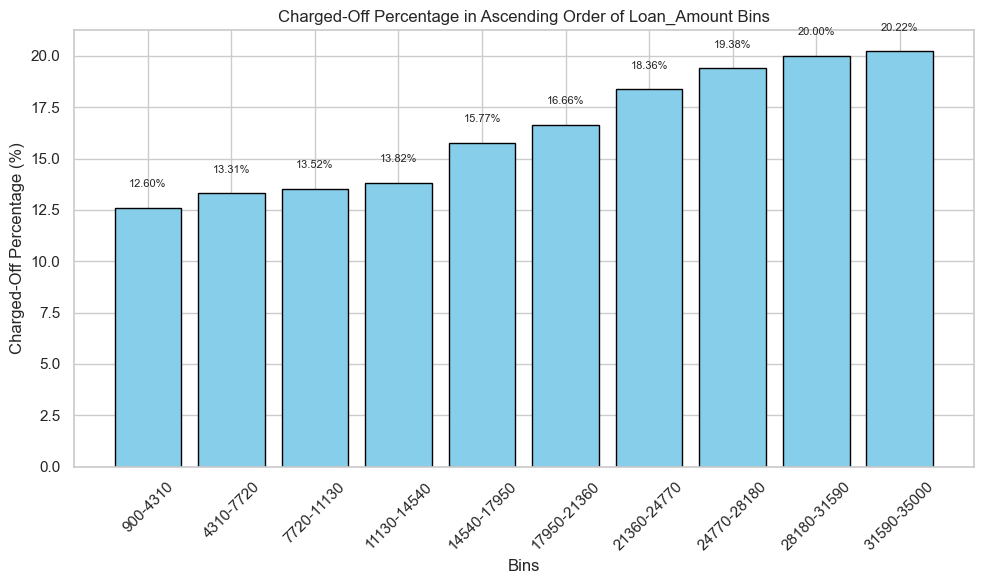

Summary Statistics for Loan_Amount
count    5421.00
mean    11810.67
std      7883.33
min       900.00
25%      5500.00
50%     10000.00
75%     16000.00
max     35000.00
Name: Loan_Amount, dtype: float64


Bin Range  Charged-Off Percentage (%)
0     900-4310                       12.60
1    4310-7720                       13.31
2   7720-11130                       13.52
3  11130-14540                       13.82
4  14540-17950                       15.77
5  17950-21360                       16.66
6  21360-24770                       18.36
7  24770-28180                       19.38
8  28180-31590                       20.00
9  31590-35000                       20.22

In [206]:
barplot_charged_off_distribution(df, 'Loan_Amount')

<font color='red'> **Insight :**</font> 
<font color='blue'>
1. As the loan amount moves from lower to higher bins, the charged-off percentages rise gradually, reaching their maximum percentage of 20.22% in the bin range of 31590-35000.<br>
2. This suggests that there is a larger default rate for loans in the higher loan amount groups, particularly above 28,000.
3. Based on the observed trend, loan amount can be considered a moderately strong indicator of loan default.</font> <br>

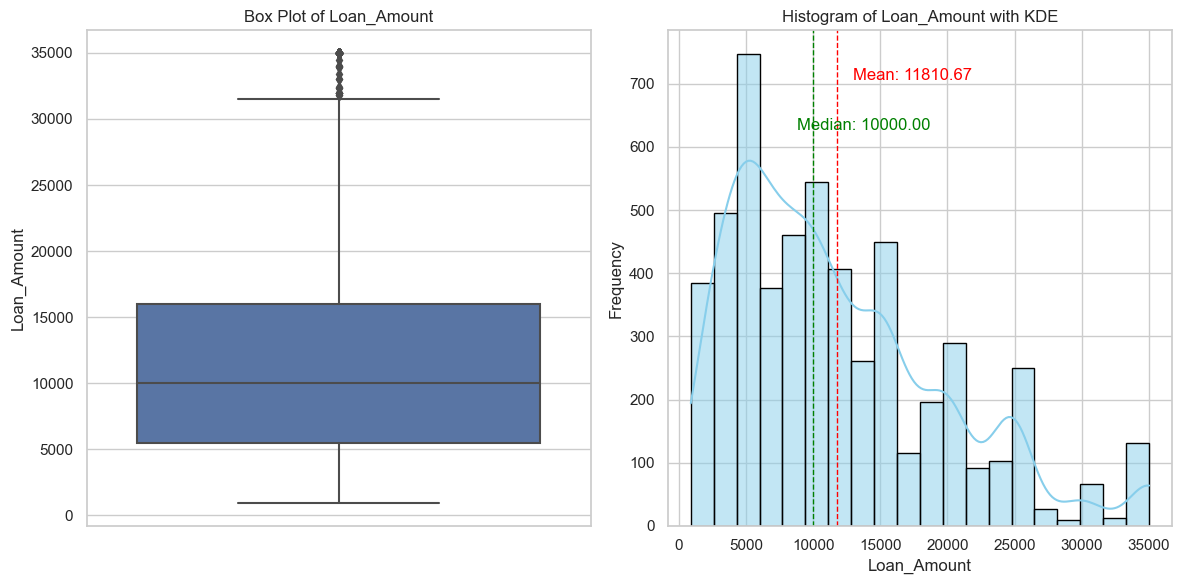

In [207]:
# any noticeable trends or outliers in the distribution of loan amounts
hist_box_charged_off_distribution(df, 'Loan_Amount')

<font color='red'> **Insight :**</font> 
1. The loan amounts are favorably skewed, as seen by the histogram, where the mean (11810.67) is higher than the median (10000.00).
2. This skewness indicates that while fewer loans are spread towards the higher end of the loan amount spectrum, there appears to be a larger frequency of smaller loan amounts.
3. Consequently, there is a positive association between loan size and default risk, as seen by the charged-off percentages, which start off lower and steadily rise as loan amounts increase.<br>

#### 2. Interest Rate

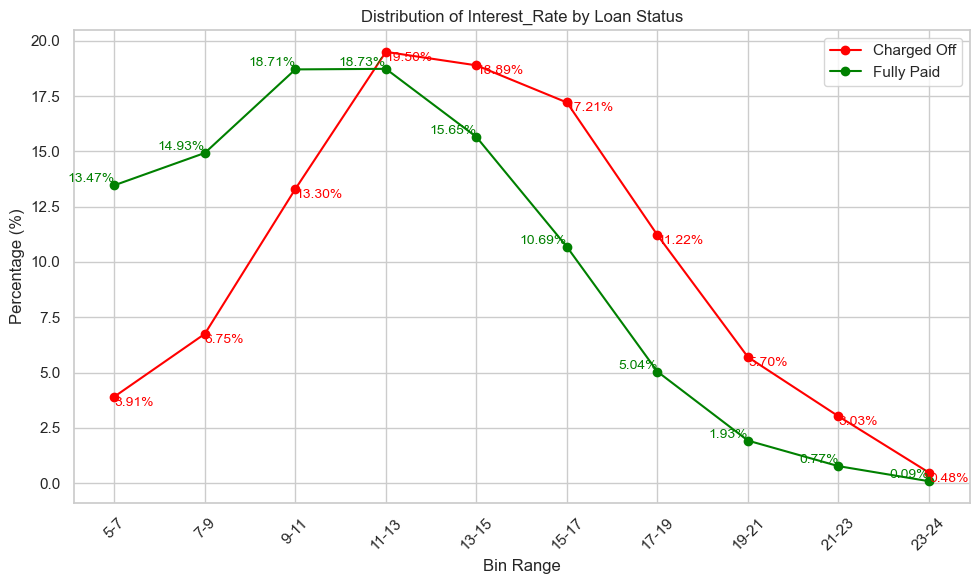

Summary Statistics (charged_off_loans) for  Interest_Rate
count   5421.00
mean      13.76
std        3.63
min        5.42
25%       11.26
50%       13.49
75%       16.32
max       24.40
Name: Interest_Rate, dtype: float64
Summary Statistics (fully_paid_loans) for Interest_Rate
count   31268.00
mean       11.56
std         3.58
min         5.42
25%         8.49
50%        11.49
75%        13.98
max        24.11
Name: Interest_Rate, dtype: float64


Bin Range  Charged-Off Percentage (%)  Fully Paid Percentage (%)
0       5-7                        3.91                      13.47
1       7-9                        6.75                      14.93
2      9-11                       13.30                      18.71
3     11-13                       19.50                      18.73
4     13-15                       18.89                      15.65
5     15-17                       17.21                      10.69
6     17-19                       11.22                       5.04
7     19-21                        5.70                       1.93
8     21-23                        3.03                       0.77
9     23-24                        0.48                       0.09

In [208]:
barplot_charged_off_fully_paid_distribution(df, 'Interest_Rate')

<font color='red'> **Insight :**</font> 
1.  Higher interest rates for charged-off loans are linked to a higher risk of loan default. defaults tend to concentrate in the 11–15% interest rate range.

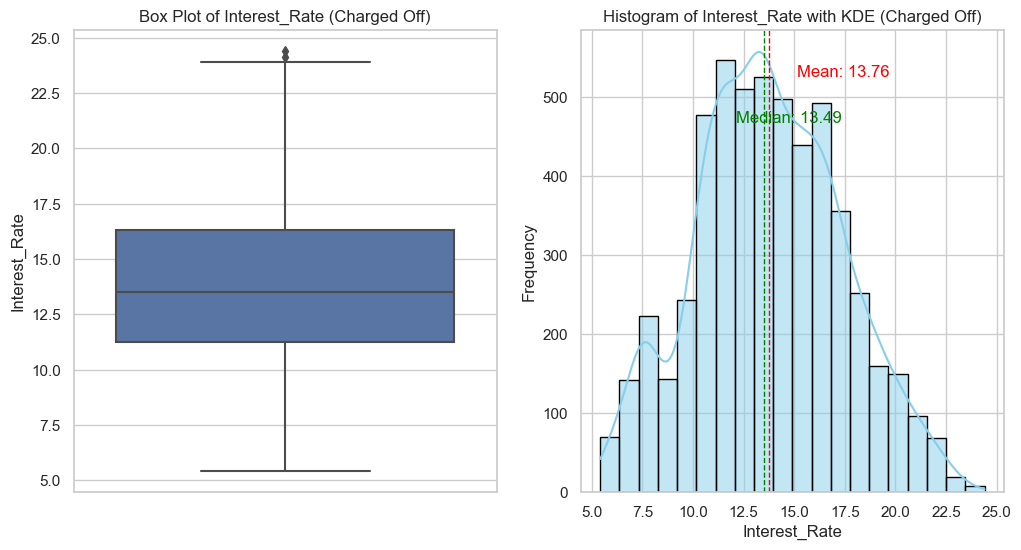

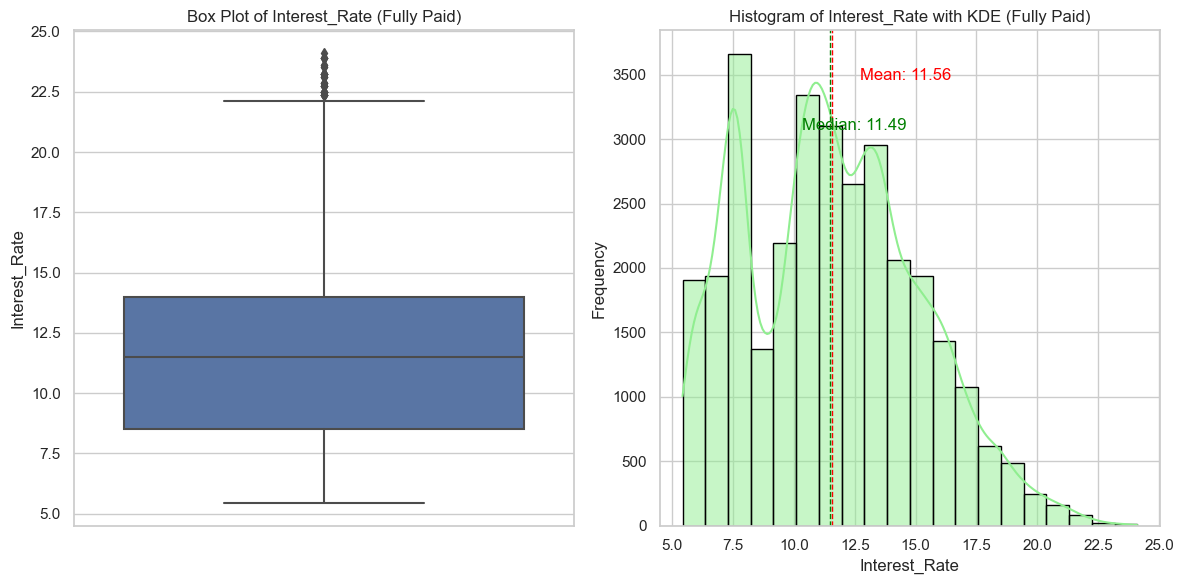

In [209]:
hist_box_charged_off_fully_paid_distribution(df, 'Interest_Rate')

<font color='red'> **Insight :**</font> 
1. The interest rate distributions for fully paid and charged-off loans are both right-skewed, meaning there are more cases of lower interest rates and fewer cases of higher interest rates.
2. Compared to completely paid loans, charged-off loans typically have somewhat higher mean interest rates, indicating a shift towards higher rates1. A distinct pattern in the data indicates that as the credit rating declines, the charged-off percentages rise.
2. Significantly greater charged-off percentages (30.65% and 34.30%) are shown by borrowers with lower credit grades, especially Grades F and G, suggesting a larger probability of default..
3. The interest rate can be considered a strong indicator of loan default.

#### 3. Credit Grade and Subgrade

In [210]:
charged_off_percentages_by_grade = df[df['Loan_Status'] == 'Charged Off'].groupby('Credit_Grade').size() / df.groupby('Credit_Grade').size() * 100
charged_off_percentages_by_grade

Credit_Grade
A    6.12
B   12.05
C   17.13
D   21.41
E   25.28
F   30.65
G   34.30
dtype: float64

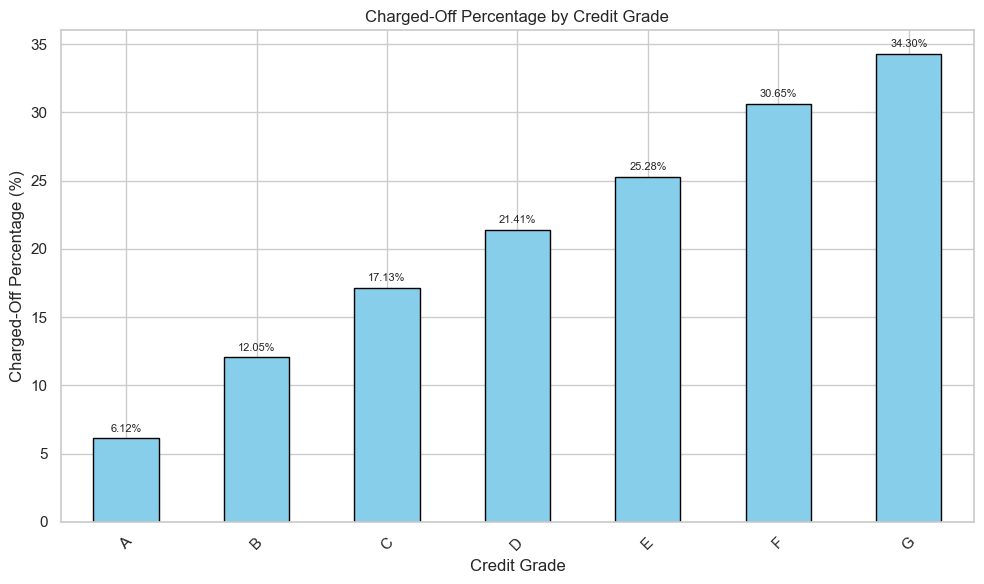

In [211]:
# Plot the charged-off percentages by Credit Grade
plt.figure(figsize=(10, 6))
charged_off_percentages_by_grade.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Charged-Off Percentage by Credit Grade')
plt.xlabel('Credit Grade')
plt.ylabel('Charged-Off Percentage (%)')
plt.xticks(rotation=45)
plt.grid(True)
# Display charged-off percentages as labels over each bar
for i, percentage in enumerate(charged_off_percentages_by_grade):
    plt.text(i, percentage + 0.5, f'{percentage:.2f}%', ha='center', fontsize=8)
plt.tight_layout()
plt.show()

<font color='red'> **Insight :**</font> 
1. A distinct pattern in the data indicates that as the credit rating declines, the charged-off percentages rise.
2. Significantly greater charged-off percentages (30.65% and 34.30%) are shown by borrowers with lower credit grades, especially Grades F and G, suggesting a larger probability of default

3. This suggests that credit grade is a strong predictor of loan default, with borrowers in lower credit grades posing a higher risk.

In [212]:
# Group by Credit Subgrade and calculate charged-off percentages
charged_off_percentages_by_subgrade = df[df['Loan_Status'] == 'Charged Off'].groupby('Credit_Subgrade').size() / df.groupby('Credit_Subgrade').size() * 100
charged_off_percentages_by_subgrade

Credit_Subgrade
A1    2.73
A2    5.09
A3    5.88
A4    6.26
A5    8.11
B1    9.47
B2   11.10
B3   11.87
B4   13.31
B5   13.55
C1   16.05
C2   16.44
C3   18.31
C4   17.67
C5   18.17
D1   18.22
D2   20.56
D3   21.94
D4   22.42
D5   24.33
E1   25.91
E2   24.83
E3   21.58
E4   28.06
E5   26.68
F1   27.21
F2   29.13
F3   27.88
F4   30.07
F5   49.50
G1   30.93
G2   38.24
G3   43.18
G4   23.91
G5   40.91
dtype: float64

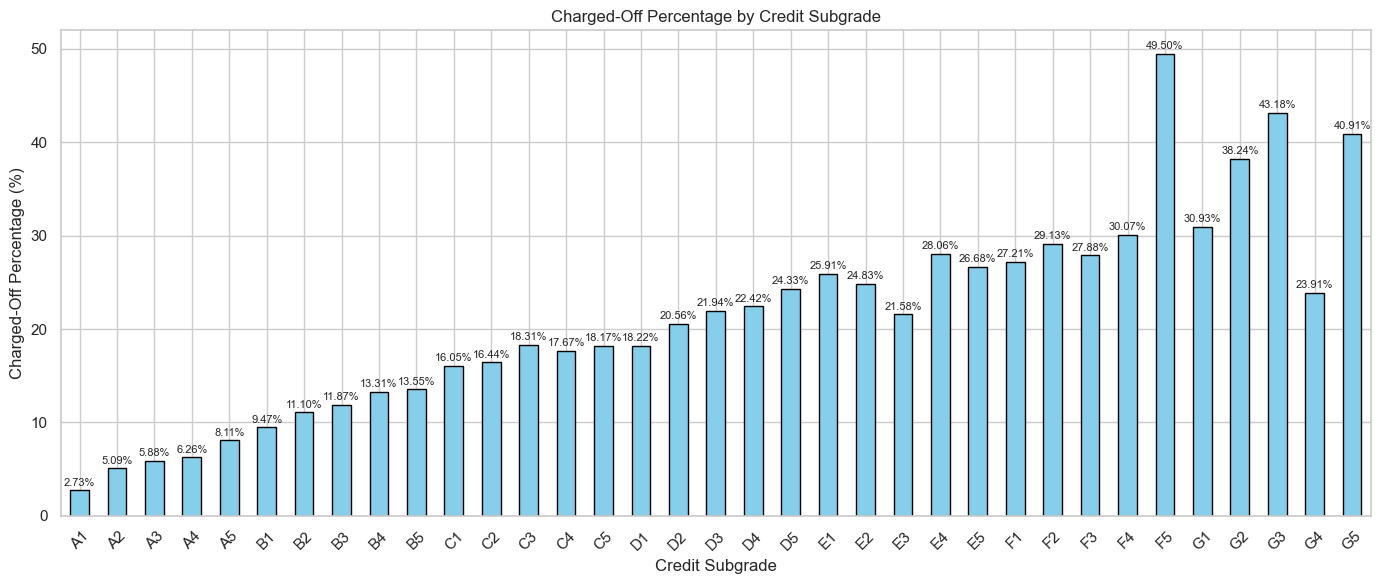

In [213]:
# Plot the charged-off percentages by Credit Subgrade
plt.figure(figsize=(14, 6))
charged_off_percentages_by_subgrade.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Charged-Off Percentage by Credit Subgrade')
plt.xlabel('Credit Subgrade')
plt.ylabel('Charged-Off Percentage (%)')
plt.xticks(rotation=45)
plt.grid(True) 
# Display charged-off percentages as labels over each bar
for i, percentage in enumerate(charged_off_percentages_by_subgrade):
    plt.text(i, percentage + 0.5, f'{percentage:.2f}%', ha='center', fontsize=8)

plt.tight_layout()
plt.show()

<font color='red'> **Insight :**</font> 
1. The charged-off percentages rise in tandem with the credit subgrade within each grade, much like the credit grade.
2. With the highest charged-off percentage of 49.50%, Subgrade F5 stands out as having a very high default likelihood.
3. Subgrade G5 also shows a very high charged-off percentage of 40.91%, indicating that there is a considerable default risk attached to borrowers in this subgrade.
4. It looks that credit subgrade and credit grade are both reliable predictors of loan default. Lower grades or subgrades are linked to higher default rates, and they offer a hierarchical framework for evaluating creditworthiness.

#### 4. Debt-to-Income Ratio

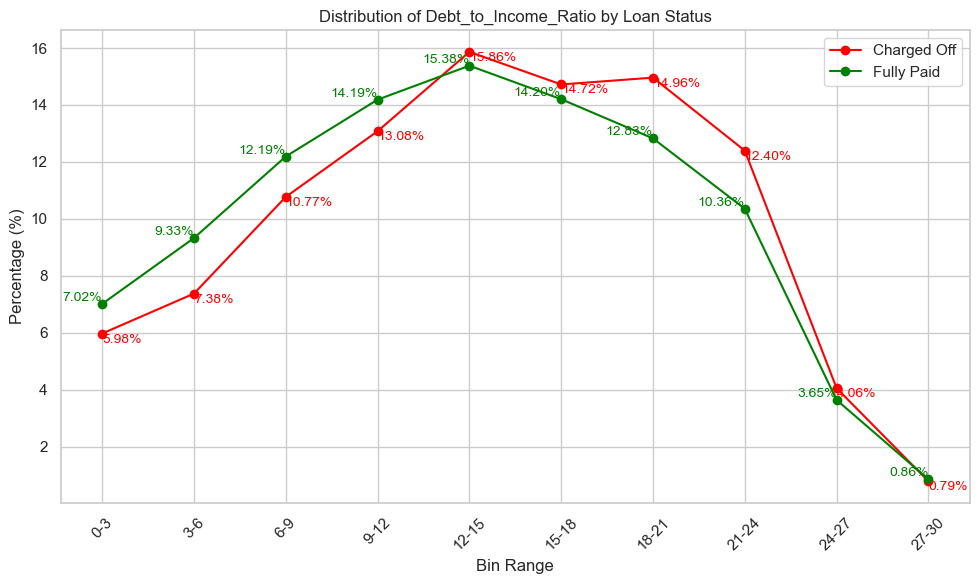

Summary Statistics (charged_off_loans) for  Debt_to_Income_Ratio
count   5421.00
mean      14.11
std        6.59
min        0.00
25%        9.18
50%       14.40
75%       19.40
max       29.85
Name: Debt_to_Income_Ratio, dtype: float64
Summary Statistics (fully_paid_loans) for Debt_to_Income_Ratio
count   31268.00
mean       13.33
std         6.67
min         0.00
25%         8.19
50%        13.43
75%        18.59
max        29.99
Name: Debt_to_Income_Ratio, dtype: float64


Bin Range  Charged-Off Percentage (%)  Fully Paid Percentage (%)
0       0-3                        5.98                       7.02
1       3-6                        7.38                       9.33
2       6-9                       10.77                      12.19
3      9-12                       13.08                      14.19
4     12-15                       15.86                      15.38
5     15-18                       14.72                      14.20
6     18-21                       14.96                      12.83
7     21-24                       12.40                      10.36
8     24-27                        4.06                       3.65
9     27-30                        0.79                       0.86

In [214]:
barplot_charged_off_fully_paid_distribution(df, 'Debt_to_Income_Ratio')

<font color='red'> **Insight :**</font>
1. As DTI bin ranges expand, charged-off percentages typically rise.
2. The DTI range of 12–21% shows higher default rates.

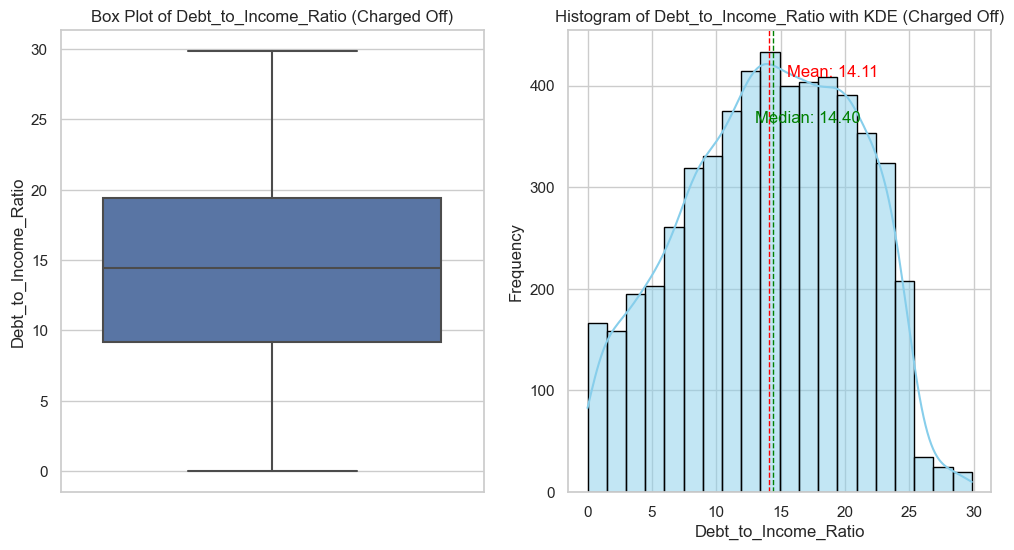

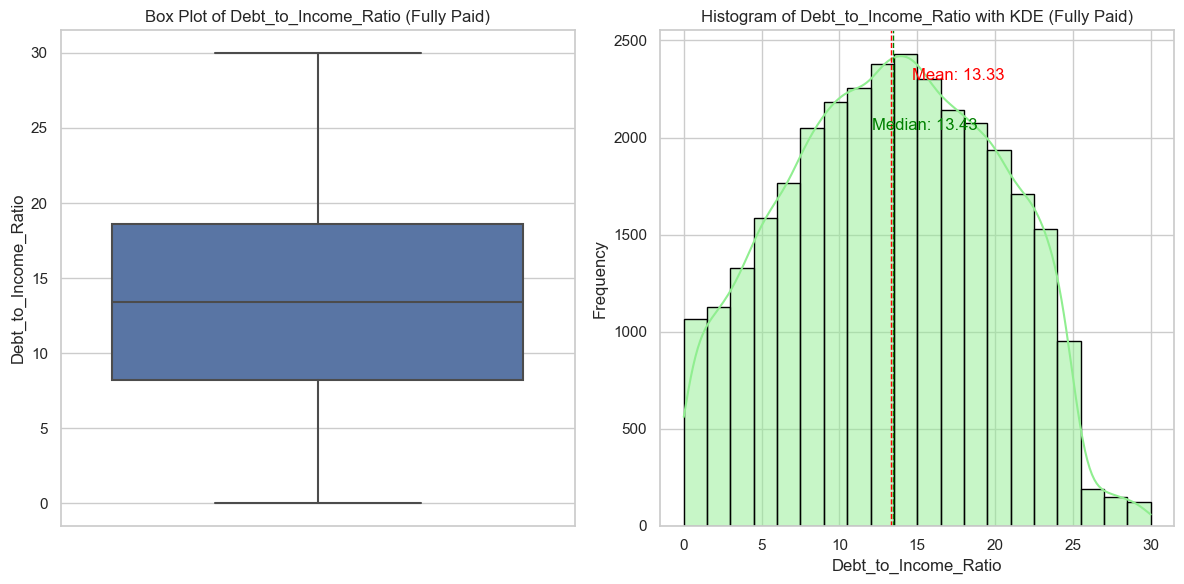

In [215]:
hist_box_charged_off_fully_paid_distribution(df, 'Debt_to_Income_Ratio')

<font color='red'> **Insight :**</font> 
1. Compared to completely paid loans, the mean debt-to-income ratio for charged-off loans is marginally greater.
2. The right-skewed nature of both distributions suggests that the majority of borrowers have lower debt-to-income ratios.
3. Since greater DTI levels may suggest a larger likelihood of default, DTI may be regarded as a strong overall indication of loan default. <br><br>

#### 5. Number of Delinquencies

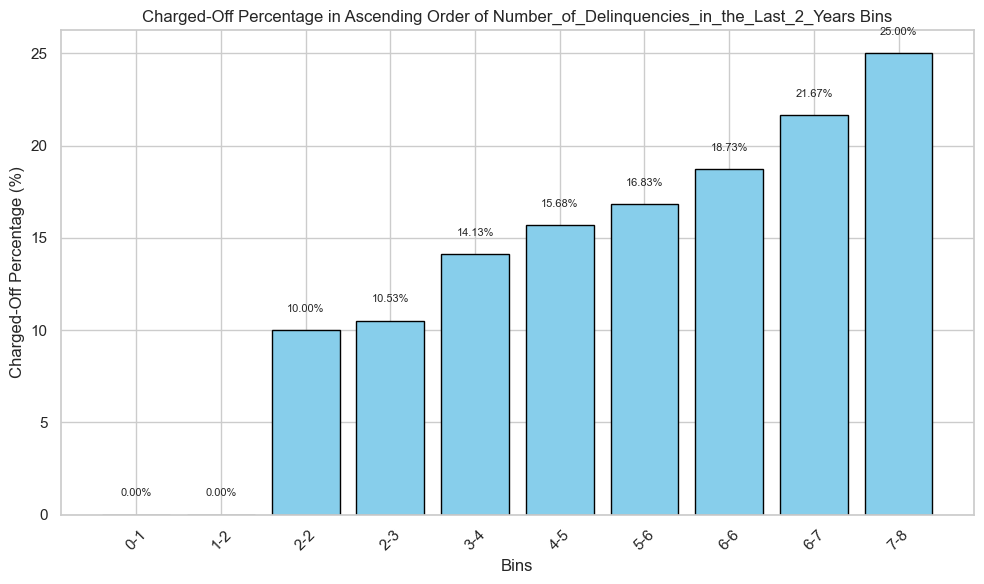

Summary Statistics for Number_of_Delinquencies_in_the_Last_2_Years
count   5421.00
mean       0.17
std        0.53
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        8.00
Name: Number_of_Delinquencies_in_the_Last_2_Years, dtype: float64


Bin Range  Charged-Off Percentage (%)
0       0-1                        0.00
1       1-2                        0.00
2       2-2                       10.00
3       2-3                       10.53
4       3-4                       14.13
5       4-5                       15.68
6       5-6                       16.83
7       6-6                       18.73
8       6-7                       21.67
9       7-8                       25.00

In [216]:
barplot_charged_off_distribution(df, 'Number_of_Delinquencies_in_the_Last_2_Years')

<font color='red'> **Insight :**</font> 
1. Defaults occur more frequently among borrowers with a higher number of delinquencies. The rising trend in charged-off percentages with the rise in delinquencies over the past two years is indicative of this.
2. The chance of default is higher for borrowers with six or more delinquencies; charged-off percentages range from 18.73% to 25.00%.

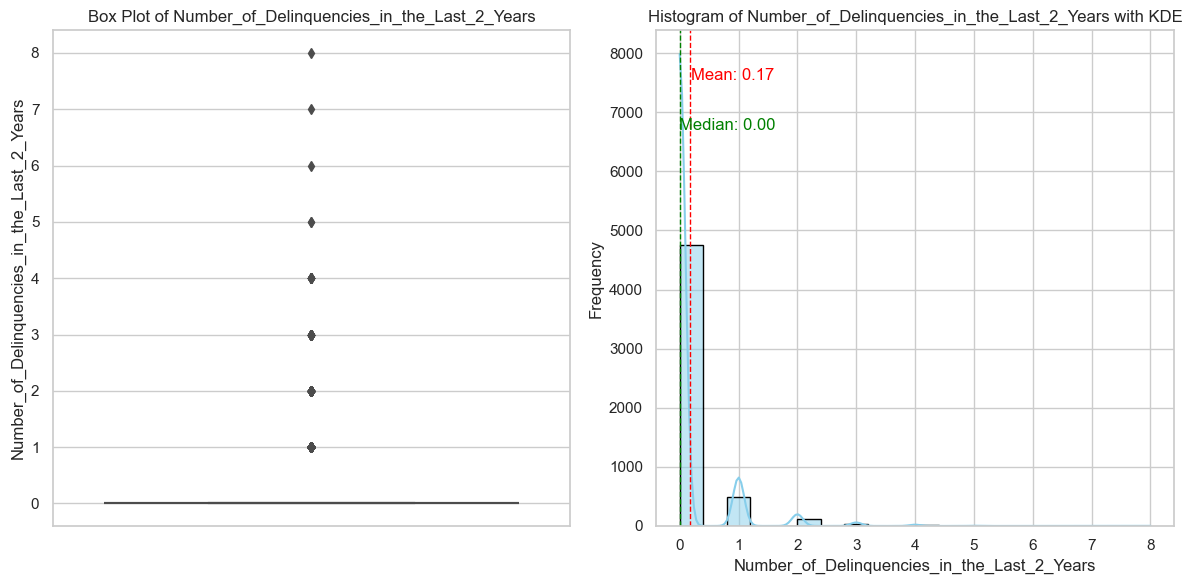

In [217]:
hist_box_charged_off_distribution(df, 'Number_of_Delinquencies_in_the_Last_2_Years')

<font color='red'> **Insight :**</font> 
1. The median and quartile values are all zero, indicating that the majority of borrowers have not experienced any delinquencies in the previous two years.2. Nonetheless, there is a discernible rise in charged-off rates among delinquent borrowers when the quantity of delinquencies rises
3. Particularly for borrowers with a larger number of delinquencies, the number of delinquencies within the last two years might be regarded as a strong predictor of loan default.<br><br>

#### 6. Employment Length

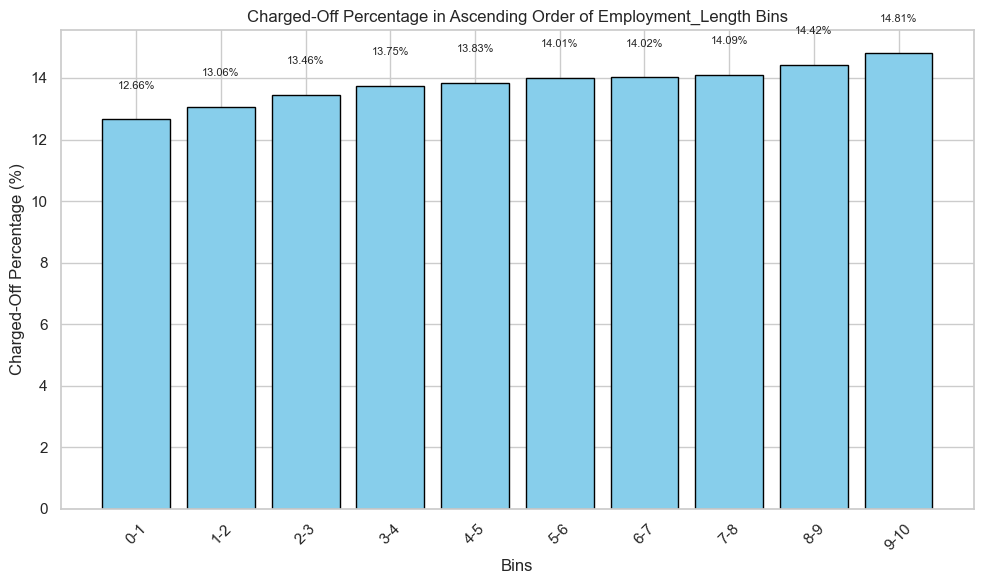

Summary Statistics for Employment_Length
count   5421.00
mean       5.26
std        3.66
min        0.00
25%        2.00
50%        5.00
75%       10.00
max       10.00
Name: Employment_Length, dtype: float64


Bin Range  Charged-Off Percentage (%)
0       0-1                       12.66
1       1-2                       13.06
2       2-3                       13.46
3       3-4                       13.75
4       4-5                       13.83
5       5-6                       14.01
6       6-7                       14.02
7       7-8                       14.09
8       8-9                       14.42
9      9-10                       14.81

In [218]:
# Mapping is as follows : < 1 year = 0 , 1 year = 1 , 2 years = 2, 3 years =3, 4 years = 4 , 5 years =5, 6 years = 6, 7 years = 7, 8 years =8,
# 9 years = 9 , 10+ years = 10
barplot_charged_off_distribution(df, 'Employment_Length')

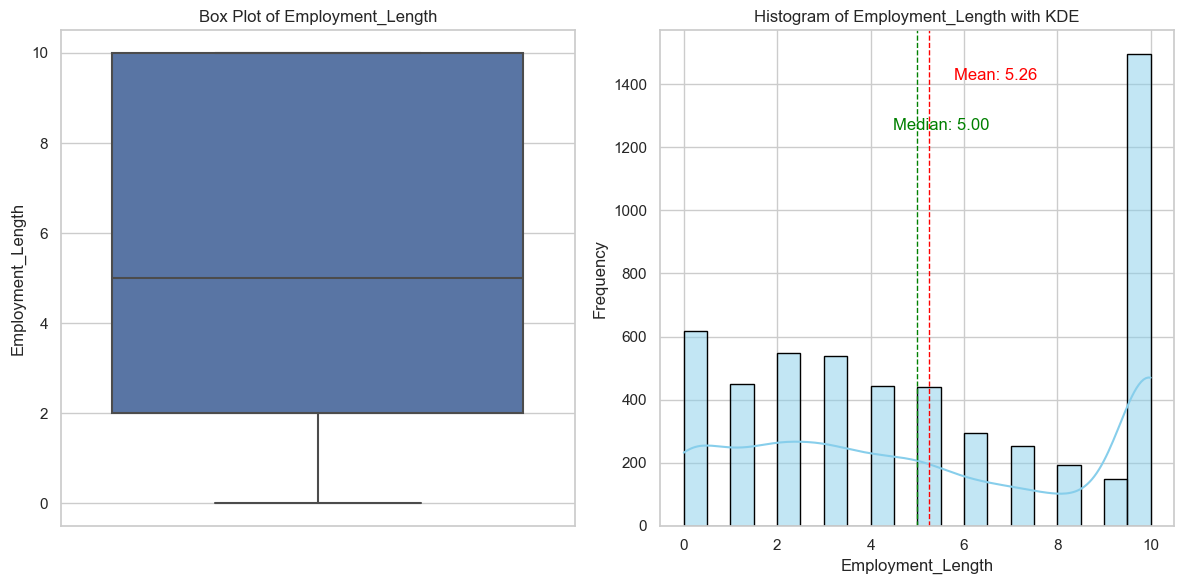

In [219]:
hist_box_charged_off_distribution(df, 'Employment_Length')

<font color='red'> **Insight :**</font> 
1. According to the plot, borrowers who have worked for longer periods of time typically have somewhat higher default rates.
2. There is a noticeable pattern where borrowers with longer employment lengths (especially 5–10+ years) display modestly higher default rates, despite the fact that the differences in default rates depending on job length are not very big.
3. The length of employment by itself might not be a reliable indicator of loan default.

#### 7. Home Ownership Status

In [220]:
df['Home_Ownership_Status'].value_counts()

Home_Ownership_Status
RENT        18440
MORTGAGE    16272
OWN          2935
OTHER          93
NONE            3
Name: count, dtype: int64

In [221]:
# As Home_Ownership_Status = NONE has only 3 values, lets replace it with 'OTHER'
df['Home_Ownership_Status'] = df['Home_Ownership_Status'].replace('NONE', 'OTHER')
df['Home_Ownership_Status'].value_counts()

Home_Ownership_Status
RENT        18440
MORTGAGE    16272
OWN          2935
OTHER          96
Name: count, dtype: int64

In [222]:
# Calculate the number of loans for each home ownership status
home_ownership_counts = df['Home_Ownership_Status'].value_counts()
home_ownership_counts

Home_Ownership_Status
RENT        18440
MORTGAGE    16272
OWN          2935
OTHER          96
Name: count, dtype: int64

In [223]:
#  Calculate the number of charged-off loans for each home ownership status
charged_off_counts = df[df['Loan_Status'] == 'Charged Off']['Home_Ownership_Status'].value_counts()
charged_off_counts

Home_Ownership_Status
RENT        2773
MORTGAGE    2197
OWN          434
OTHER         17
Name: count, dtype: int64

In [224]:
# Calculate the default rates for each home ownership status
default_rates = (charged_off_counts / home_ownership_counts) * 100

# Sort the default rates by percentage
default_rates_sorted = default_rates.sort_values(ascending=False)
default_rates_sorted

Home_Ownership_Status
OTHER      17.71
RENT       15.04
OWN        14.79
MORTGAGE   13.50
Name: count, dtype: float64

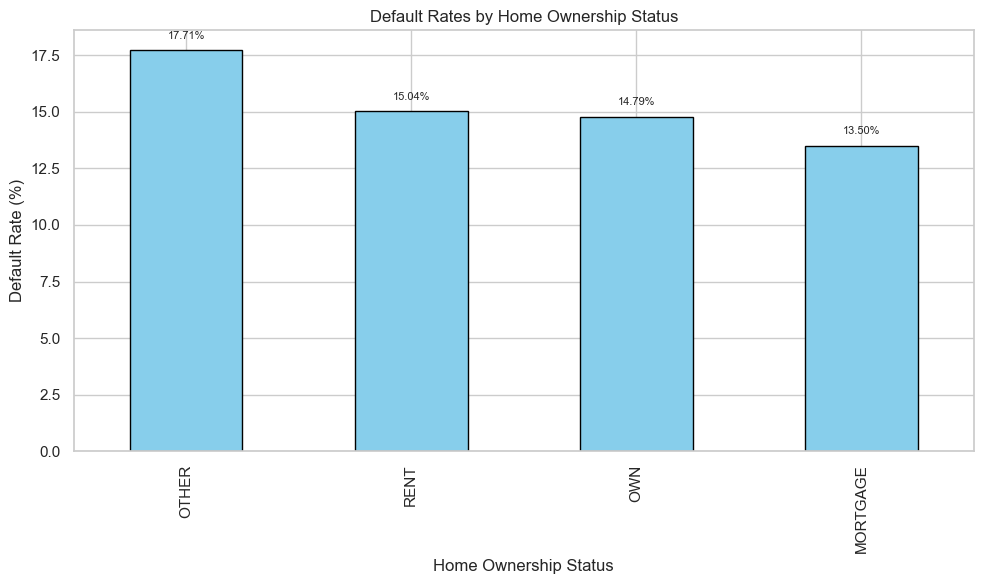

In [225]:
# Create a bar chart to visualize the sorted default rates
plt.figure(figsize=(10, 6))
default_rates_sorted.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Default Rates by Home Ownership Status')
plt.xlabel('Home Ownership Status')
plt.ylabel('Default Rate (%)')

# Display default rates on top of the bars
for index, value in enumerate(default_rates_sorted):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center', fontsize=8)

plt.grid(True)
plt.tight_layout()
plt.show()

<font color='red'> **Insight :**</font> 
1. Borrowers in the 'OTHER' and 'RENT' categories exhibit higher default rates compared to those who own homes or have mortgages.
2. The findings imply that lending institution should be more cautious when lending to individuals with unconventional home ownership statuses or those who rent, as these groups are more likely to default on their loans.
3. Home ownership status can be considered a relevant factor in assessing loan default risk

#### 8. Income Verification Status

In [226]:
# Create a DataFrame for charged-off loans
charged_off_loans = df[df['Loan_Status'] == 'Charged Off']

# Calculate the proportion of charged-off loans for each income verification status
verification_status_counts = charged_off_loans['Income_Verification_Status'].value_counts(normalize=True) * 100
verification_status_counts

Income_Verification_Status
Not Verified      38.68
Verified          35.99
Source Verified   25.33
Name: proportion, dtype: float64

In [227]:
# Calculate the default rates for each income verification status
default_rate_counts = df.groupby('Income_Verification_Status')['Loan_Status'].apply(lambda x: (x == 'Charged Off').mean() * 100)
default_rate_counts

Income_Verification_Status
Not Verified      12.70
Source Verified   14.54
Verified          16.55
Name: Loan_Status, dtype: float64

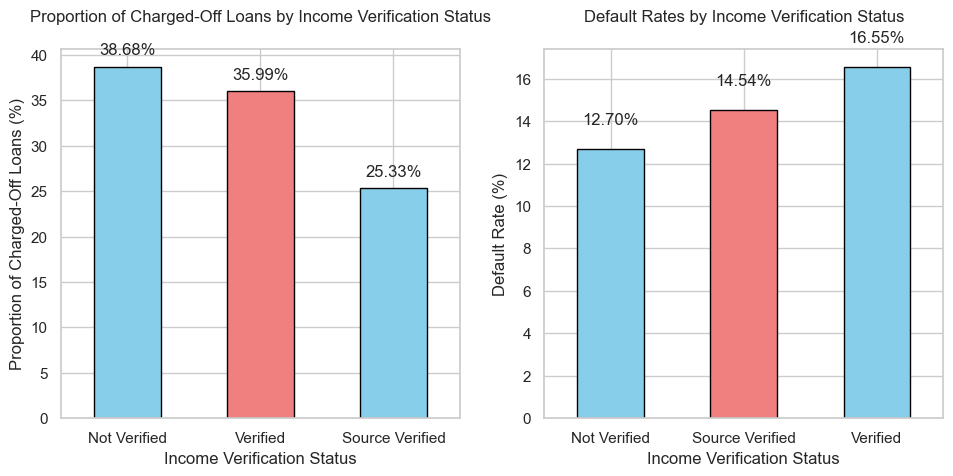

In [228]:
# Create a bar plot for the proportion of charged-off loans by income verification status
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
verification_status_counts.plot(kind='bar', color=['skyblue', 'lightcoral'], edgecolor='black')
plt.title('Proportion of Charged-Off Loans by Income Verification Status', pad=20)
plt.xlabel('Income Verification Status')
plt.ylabel('Proportion of Charged-Off Loans (%)')
plt.xticks(rotation=0)

# Add percentage labels on the bars
for index, value in enumerate(verification_status_counts):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', va='bottom')

# Create a bar plot for the default rates by income verification status
plt.subplot(1, 2, 2)
default_rate_counts.plot(kind='bar', color=['skyblue', 'lightcoral'], edgecolor='black')
plt.title('Default Rates by Income Verification Status', pad=20)
plt.xlabel('Income Verification Status')
plt.ylabel('Default Rate (%)')
plt.xticks(rotation=0)

# Add percentage labels on the bars
for index, value in enumerate(default_rate_counts):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center', va='bottom')

# Adjust the layout to prevent overlap
plt.tight_layout(pad=2.0)
plt.subplots_adjust(top=0.9)
plt.show()

<font color='red'> **Insight :**</font> 
1. The default rate among borrowers with "Not Verified" income is 12.70%, which is slightly lower than the default rate among "Source Verified" borrowers at 14.54%.2. Borrowers whose income verification status is "Verified" have the highest default rate among the three categories, with 16.55%
3. Income verification status is a moderately strong indicator of loan default.

#### 9. Loan Purpose

In [229]:
# Calculate the default rates for each loan purpose
default_rate_counts = df.groupby('Loan_Purpose')['Loan_Status'].apply(lambda x: (x == 'Charged Off').mean() * 100)
default_rate_counts 

Loan_Purpose
car                  10.60
credit_card          10.63
debt_consolidation   15.00
educational          17.31
home_improvement     12.17
house                15.71
major_purchase       10.41
medical              16.00
moving               16.16
other                15.85
renewable_energy     18.75
small_business       26.72
vacation             14.02
wedding              10.18
Name: Loan_Status, dtype: float64

In [230]:
# Sort loan purposes by default rate in descending order
default_rate_counts = default_rate_counts.sort_values(ascending=False)
default_rate_counts

Loan_Purpose
small_business       26.72
renewable_energy     18.75
educational          17.31
moving               16.16
medical              16.00
other                15.85
house                15.71
debt_consolidation   15.00
vacation             14.02
home_improvement     12.17
credit_card          10.63
car                  10.60
major_purchase       10.41
wedding              10.18
Name: Loan_Status, dtype: float64

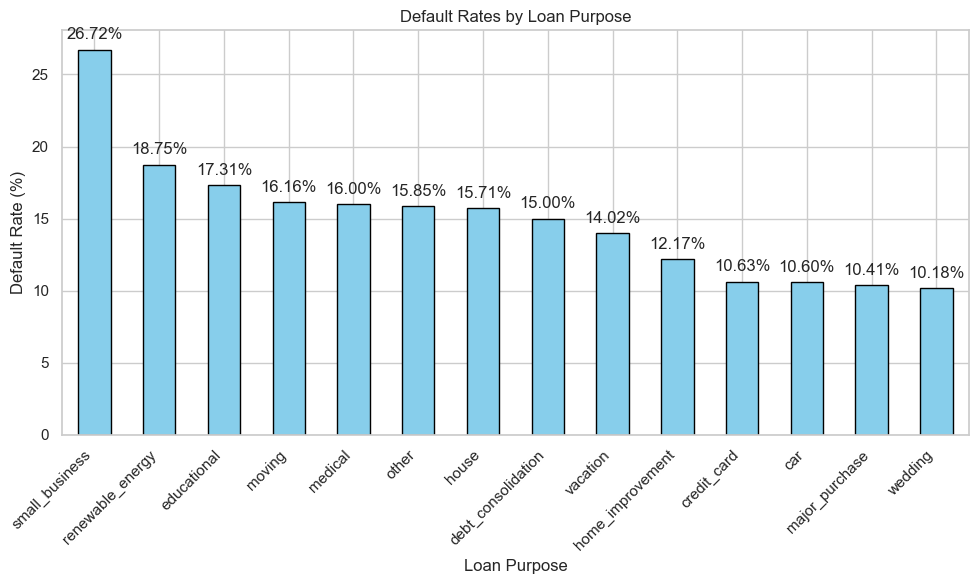

In [231]:
# Plot the default rates by loan purpose
plt.figure(figsize=(10, 6))
default_rate_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Default Rates by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Default Rate (%)')
plt.xticks(rotation=45, ha='right')

# Add percentage labels on the bars
for index, value in enumerate(default_rate_counts):
    plt.text(index, value + 0.5, f'{value:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

<font color='red'> **Insight :**</font> 
1. Loan purposes such as "small_business", "renewable_energy", and "educational" are most commonly associated with defaults, as they have the highest default rates among all loan purposes.
2. Loan purpose can be considered a strong indicator of loan default

#### 10. Revolving Balance

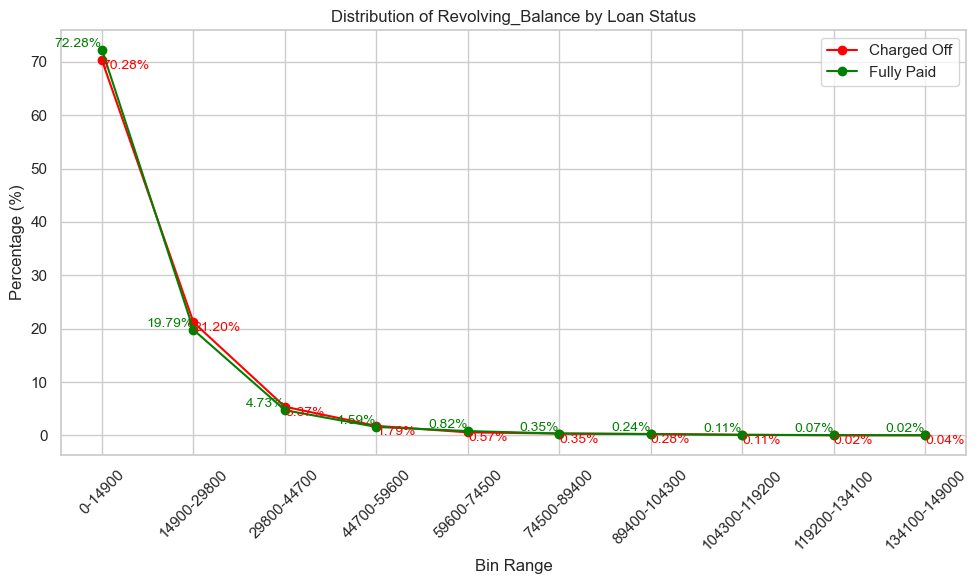

Summary Statistics (charged_off_loans) for  Revolving_Balance
count     5421.00
mean     12722.76
std      13672.95
min          0.00
25%       3898.00
50%       8926.00
75%      16798.00
max     137112.00
Name: Revolving_Balance, dtype: float64
Summary Statistics (fully_paid_loans) for Revolving_Balance
count    31268.00
mean     12259.20
std      13819.65
min          0.00
25%       3495.00
50%       8418.00
75%      16050.75
max     149000.00
Name: Revolving_Balance, dtype: float64


Bin Range  Charged-Off Percentage (%)  Fully Paid Percentage (%)
0        0-14900                       70.28                      72.28
1    14900-29800                       21.20                      19.79
2    29800-44700                        5.37                       4.73
3    44700-59600                        1.79                       1.59
4    59600-74500                        0.57                       0.82
5    74500-89400                        0.35                       0.35
6   89400-104300                        0.28                       0.24
7  104300-119200                        0.11                       0.11
8  119200-134100                        0.02                       0.07
9  134100-149000                        0.04                       0.02

In [232]:
barplot_charged_off_fully_paid_distribution(df, 'Revolving_Balance')

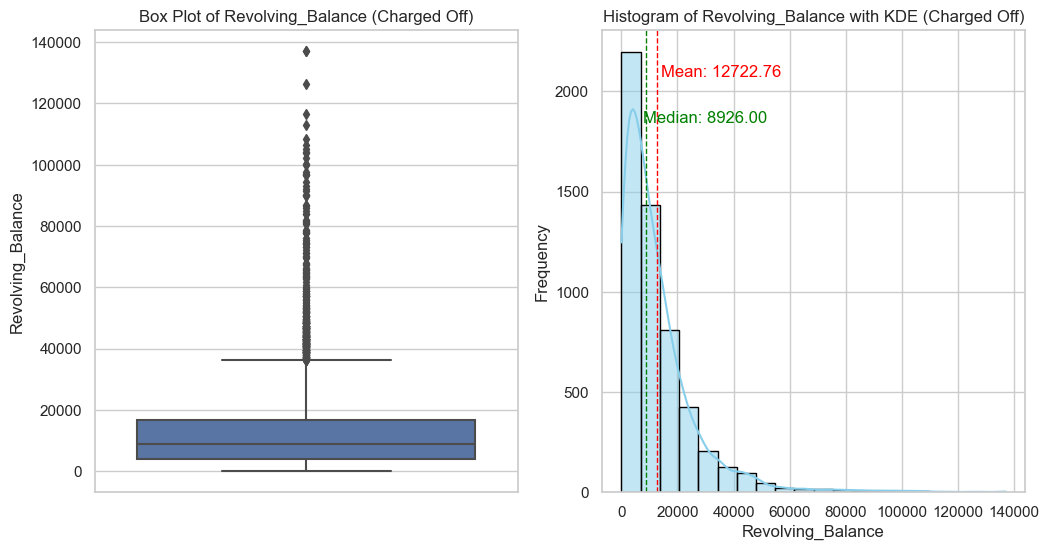

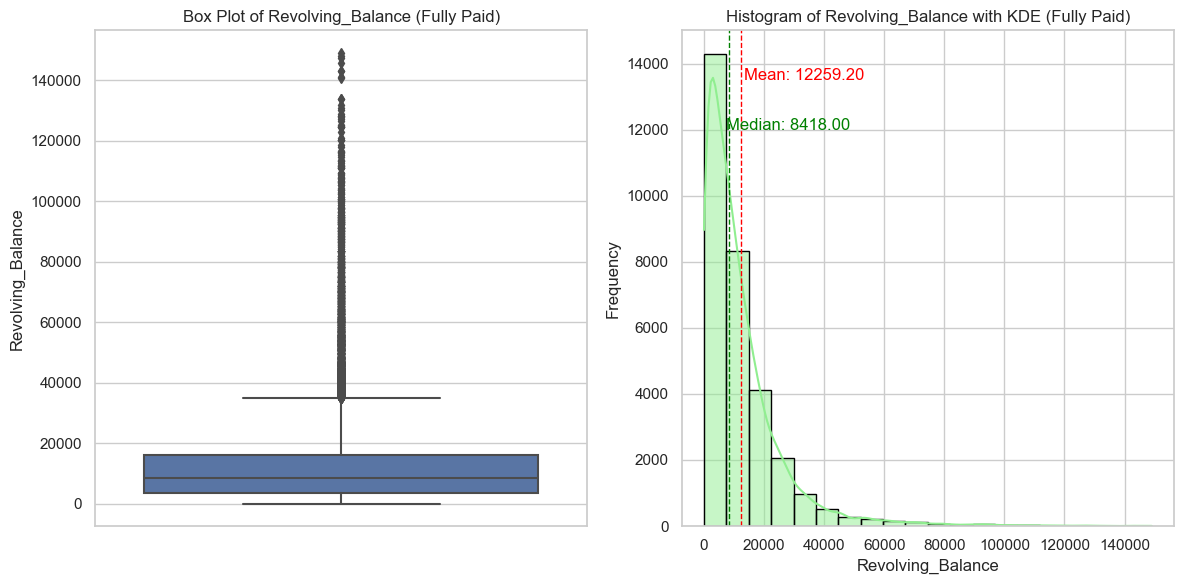

In [233]:
hist_box_charged_off_fully_paid_distribution(df, 'Revolving_Balance')

<font color='red'> **Insight :**</font> 
1. The distribution of revolving balances among charged-off loans is similar to that of fully paid loans, with a significant portion of loans having lower revolving balances.
2. The default rates decrease as revolving balances increase, suggesting that borrowers with higher revolving balances are less likely to default on their loans.
3. Revolving balance appears to be a moderately strong indicator of loan default. 

#### 11. Total Number of Credit Accounts

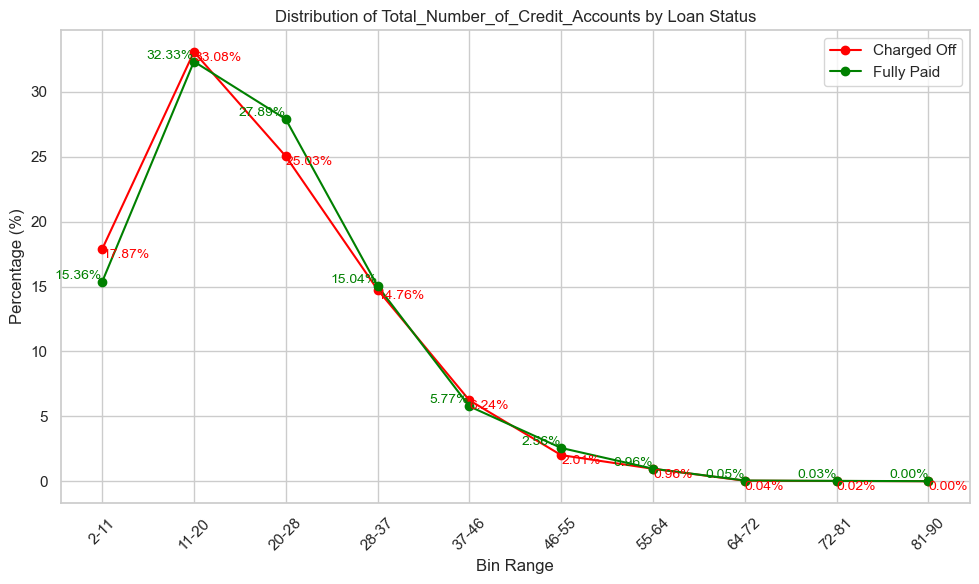

Summary Statistics (charged_off_loans) for  Total_Number_of_Credit_Accounts
count   5421.00
mean      21.13
std       11.31
min        2.00
25%       12.00
50%       19.00
75%       28.00
max       74.00
Name: Total_Number_of_Credit_Accounts, dtype: float64
Summary Statistics (fully_paid_loans) for Total_Number_of_Credit_Accounts
count   31268.00
mean       21.74
std        11.22
min         2.00
25%        13.00
50%        20.00
75%        28.00
max        90.00
Name: Total_Number_of_Credit_Accounts, dtype: float64


Bin Range  Charged-Off Percentage (%)  Fully Paid Percentage (%)
0      2-11                       17.87                      15.36
1     11-20                       33.08                      32.33
2     20-28                       25.03                      27.89
3     28-37                       14.76                      15.04
4     37-46                        6.24                       5.77
5     46-55                        2.01                       2.56
6     55-64                        0.96                       0.96
7     64-72                        0.04                       0.05
8     72-81                        0.02                       0.03
9     81-90                        0.00                       0.00

In [234]:
barplot_charged_off_fully_paid_distribution(df, 'Total_Number_of_Credit_Accounts')

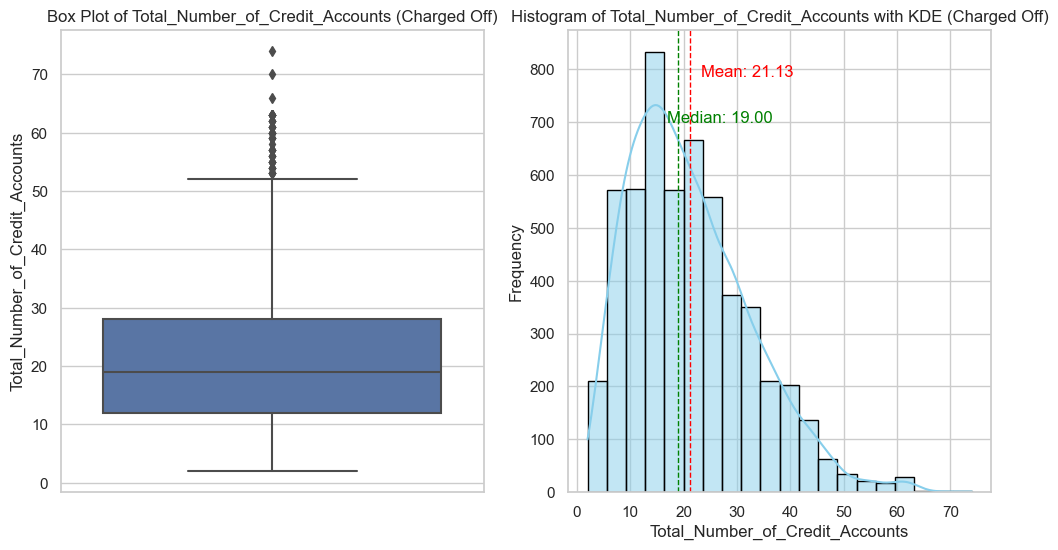

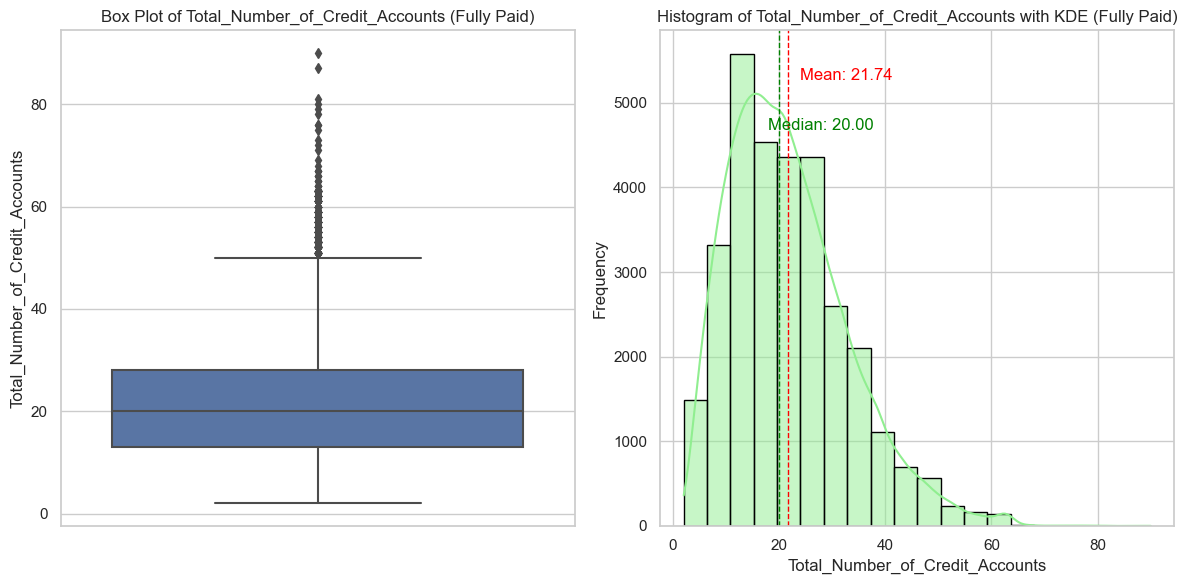

In [235]:
hist_box_charged_off_fully_paid_distribution(df, 'Total_Number_of_Credit_Accounts')

<font color='red'> **Insight :**</font> 
1. Loans with 11-20 credit accounts have the highest default rate for both charged-off (33.08%) and fully paid loans (32.33%).
2. The distribution of total number of credit accounts among charged-off loans is similar to that of fully paid loans, with a peak around the 11-20 credit accounts range.
3. Total number of credit accounts appears to be a moderately strong indicator of loan default

<a id="segmented-univariate-analysis"></a>
### Segmented Univariate Analysis -  To find summary of a single data variable in form of segments.

In [236]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def segmented_univariate_analysis(df, segment_column, value_column, status_column='Loan_Status', status_value='Charged Off'):
    
    # Filter charged-off loans
    charged_off_loans = df[df[status_column] == status_value]

    # Define unique values in the segment column
    segment_values = sorted(df[segment_column].unique())

    # Create subplots for visualizations
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

    # Visualization 1: Boxplot of the value column segmented by the segment column
    sns.boxplot(x=segment_column, y=value_column, data=charged_off_loans, order=segment_values, ax=axes[0])
    axes[0].set_title(f'Distribution of {value_column} by {segment_column}')
    axes[0].set_xlabel(segment_column)
    axes[0].set_ylabel(value_column)
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

    # Display the describe() function output
    describe_output = charged_off_loans.groupby(segment_column)[value_column].describe()
    print(f"Describe function output for Boxplot ({segment_column}):")
    print(describe_output)

    # Visualization 2: Bar plot of median values by segment column
    median_values = charged_off_loans.groupby(segment_column)[value_column].median()
    median_values_sorted = median_values.reindex(segment_values)
    bar_plot = median_values_sorted.plot(kind='bar', ax=axes[1], color='skyblue')
    axes[1].set_title(f'Median {value_column} by {segment_column}', pad=20)
    axes[1].set_xlabel(segment_column)
    axes[1].set_ylabel(f'Median {value_column}')

    # Calculate and display the default percentage on top of each bar
    visual_data_table = pd.DataFrame({'Median Value': median_values_sorted})
    visual_data_table.index.name = segment_column
    visual_data_table['Default Rate'] = visual_data_table.index.map(
        lambda x: (charged_off_loans[charged_off_loans[segment_column] == x].shape[0] / len(charged_off_loans)) * 100
    )
    for i, v in enumerate(median_values_sorted):
        axes[1].text(i, v + (0.05 * v), f'{v:.2f}\n( {visual_data_table.iloc[i]["Default Rate"]:.2f}%)', 
                     ha='center', va='bottom', fontsize=9)

    # Display the table for visual data
    print(f"\nTable for Visual Data ({segment_column} - Bar Plot):")
    print(visual_data_table)

    plt.tight_layout()
    plt.show()

#### 1. Loan Amount segmented by Credit Grade

Describe function output for Boxplot (Credit_Grade):
               count     mean     std     min      25%      50%      75%  \
Credit_Grade                                                               
A             593.00  7729.43 4820.22 1000.00  4200.00  7000.00 10000.00   
B            1378.00 10677.14 7062.19 1000.00  5000.00  9475.00 15000.00   
C            1325.00 10947.89 7377.05  900.00  5000.00  9600.00 15000.00   
D            1081.00 12039.96 7633.15 1000.00  6000.00 10000.00 16000.00   
E             660.00 15365.64 8857.00 1000.00  8000.00 14450.00 21000.00   
F             289.00 18469.03 8847.98 1400.00 11200.00 18825.00 25000.00   
G              95.00 18199.47 8908.23 2500.00 12000.00 19000.00 24000.00   

                  max  
Credit_Grade           
A            30000.00  
B            35000.00  
C            35000.00  
D            35000.00  
E            35000.00  
F            35000.00  
G            35000.00  

Table for Visual Data (Credit_Grade - Bar Plo

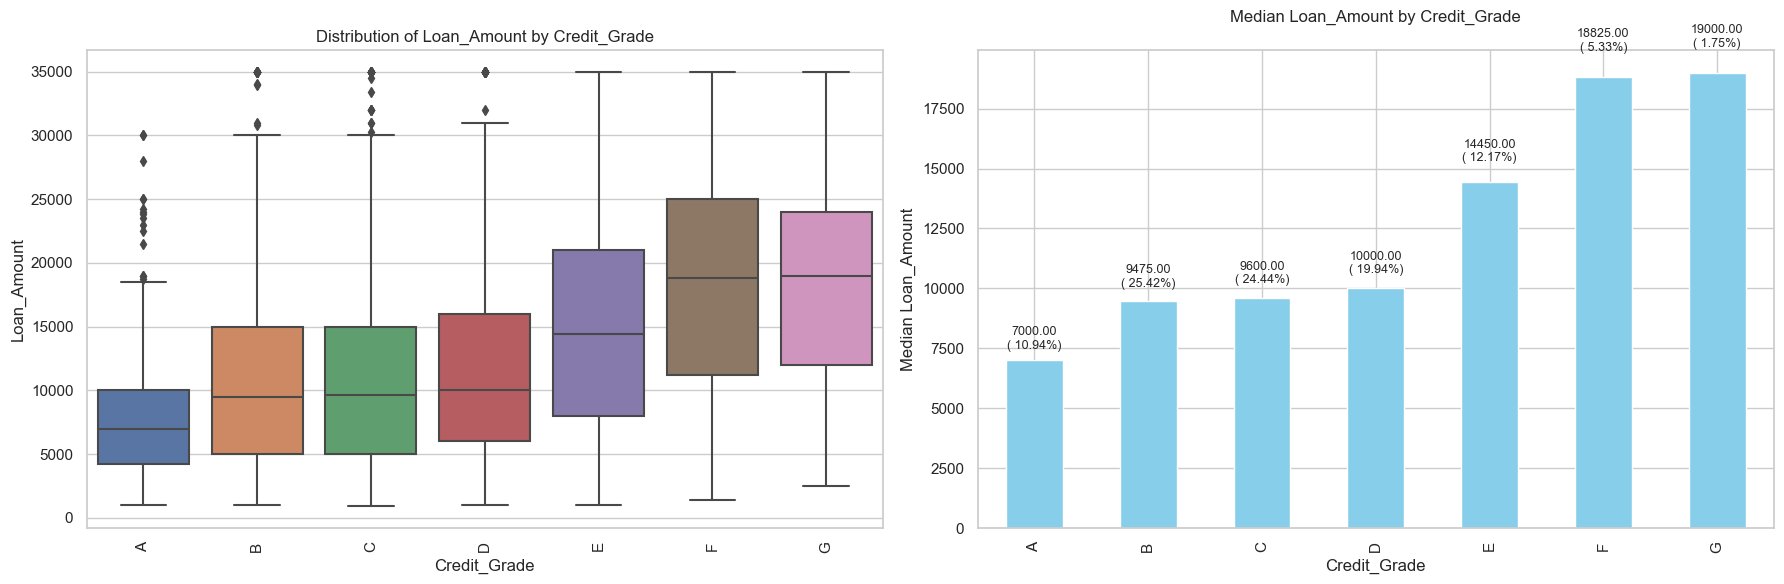

In [237]:
segmented_univariate_analysis(df, 'Credit_Grade', 'Loan_Amount')

<br><font color='red'> **Insight :**</font> 
1. As the credit grade decreases from 'A' to 'G', there is a general trend of increasing median loan amounts, indicating that lower credit grades are associated with higher loan amounts on average.
2. While there are borrowers with higher loan amounts across all credit grades, the dispersion of loan amounts tends to be more pronounced among lower credit grades(E,F,G), potentially indicating higher risk or more diverse financial circumstances among these borrowers.
3. Driving Factors for Loan Defaults:
 * While higher loan amounts may be a contributing factor to defaults, the data suggests that credit grade plays a more significant role in default rates.
 * Grades B,C and D are associated with higher default rates<br><br>

#### 2.Loan Term segmented by Loan Purpose

Describe function output for Boxplot (Loan_Purpose):
                     count  mean   std   min   25%   50%   75%   max
Loan_Purpose                                                        
car                 159.00 47.62 12.03 36.00 36.00 36.00 60.00 60.00
credit_card         519.00 45.94 11.83 36.00 36.00 36.00 60.00 60.00
debt_consolidation 2679.00 47.25 11.98 36.00 36.00 36.00 60.00 60.00
educational          54.00 39.11  8.14 36.00 36.00 36.00 36.00 60.00
home_improvement    322.00 45.69 11.79 36.00 36.00 36.00 60.00 60.00
house                55.00 48.22 12.11 36.00 36.00 60.00 60.00 60.00
major_purchase      217.00 45.18 11.69 36.00 36.00 36.00 60.00 60.00
medical             104.00 44.08 11.40 36.00 36.00 36.00 60.00 60.00
moving               90.00 40.80  9.65 36.00 36.00 36.00 36.00 60.00
other               605.00 44.05 11.34 36.00 36.00 36.00 60.00 60.00
renewable_energy     18.00 44.00 11.64 36.00 36.00 36.00 60.00 60.00
small_business      454.00 46.41 11.91 36.00 36.00

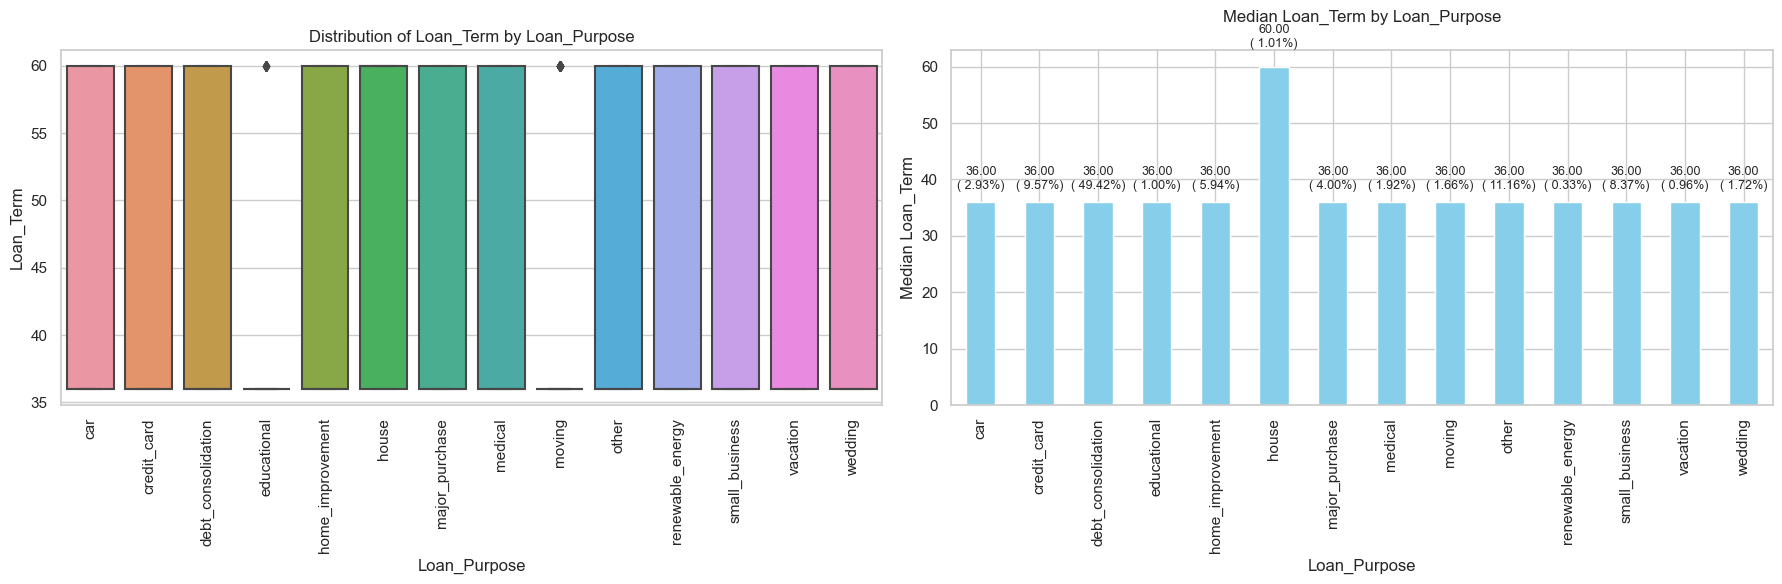

In [238]:
# Loan Term is in months
segmented_univariate_analysis(df, 'Loan_Purpose', 'Loan_Term')

<br><font color='red'> **Insight :**</font> 
1. The median loan length for the majority of lending purposes is 36 months. This suggests a standard policy or preference for lending terms for different reasons.
2. With a median loan length of 60 months, the "house" loan purpose stands out and suggests that loans intended for home renovation or purchase are usually longer-term loans with longer payback terms.
3. Default rates differ greatly throughout loan reasons, even though the median loan lengths are consistent.
   * Debt_consolidation loans have the greatest default rate (49.42%), with a median duration of 36 months.
   * House loans have a low default rate of 1.01% due to their longer median duration of 60 months.   
   * With a typical period of 36 months, "renewable_energy" loans have the lowest default rate, at 0.33.
4. The data suggests that while loan terms are consistent for many purposes, the risk is more strongly influenced by the loan purpose rather than the loan term itself.
5. Therefore, the loan purpose appears to be a significant predictor of loan default.


#### 3. Interest Rate segmented by Loan Purpose

Describe function output for Boxplot (Loan_Purpose):
                     count  mean  std  min   25%   50%   75%   max
Loan_Purpose                                                      
car                 159.00 12.35 3.35 5.99 10.18 11.71 15.22 22.85
credit_card         519.00 13.34 3.54 5.42 11.14 13.23 15.82 23.13
debt_consolidation 2679.00 14.22 3.66 5.42 11.71 14.11 16.77 24.11
educational          54.00 12.77 2.36 8.00 11.28 12.53 14.45 17.56
home_improvement    322.00 13.18 3.36 5.42 10.99 13.06 15.50 21.74
house                55.00 15.16 3.50 7.29 12.95 15.23 17.56 23.13
major_purchase      217.00 12.81 3.36 5.42 10.99 13.11 15.21 20.25
medical             104.00 13.35 3.45 5.42 11.08 13.49 15.76 21.67
moving               90.00 12.29 3.61 5.42  9.91 11.49 14.45 22.11
other               605.00 13.31 3.50 5.42 10.74 13.48 15.70 23.13
renewable_energy     18.00 11.70 4.45 6.54  8.14 11.05 13.19 24.40
small_business      454.00 14.17 3.74 5.79 11.50 13.99 16.70 22.74
vacation 

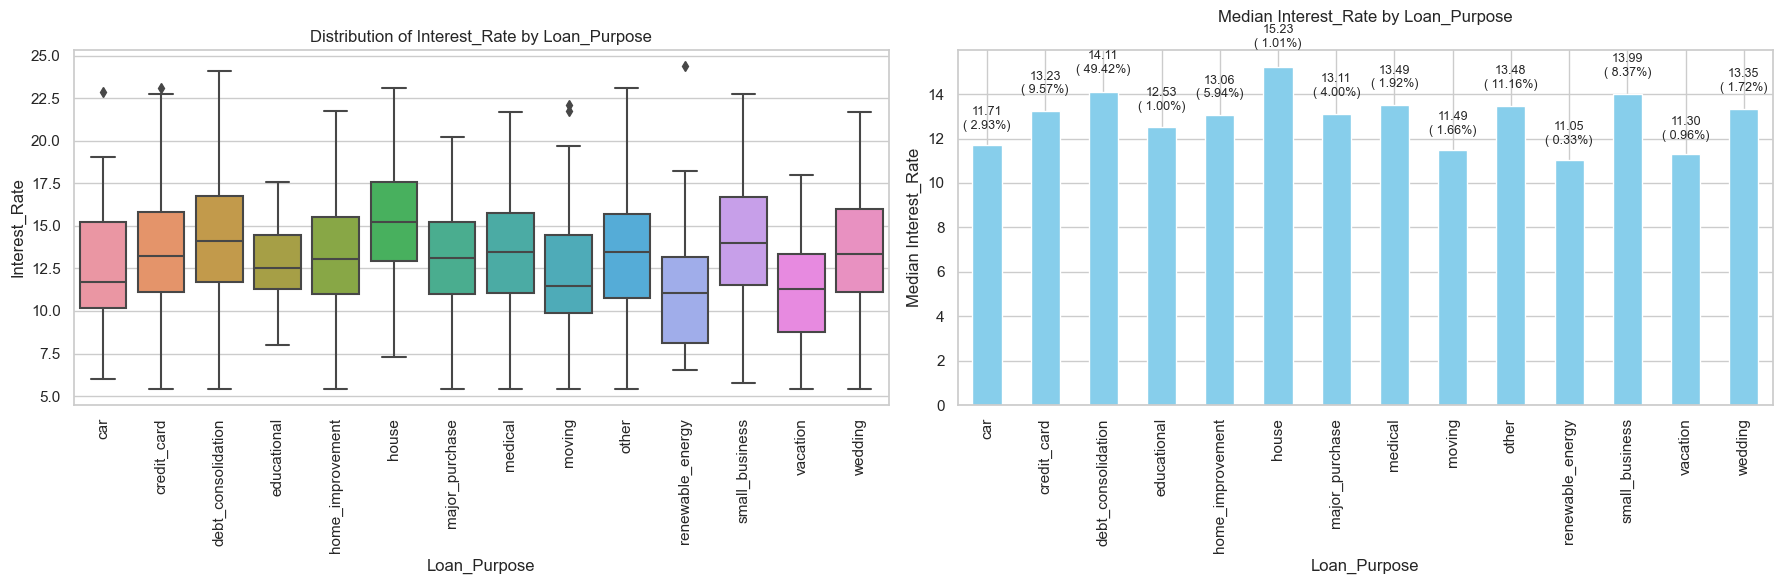

In [239]:
segmented_univariate_analysis(df, 'Loan_Purpose', 'Interest_Rate')

<br><font color='red'> **Insight :**</font> 
1. Debt Consolidation, Other, and Credit Card loans have both high median interest rates(14.11,13.48 and 13.23) and high default rates (49.42, 11.16 and 9.57) .Lenders should exercise caution and possibly implement stricter approval criteria or higher interest rates for these loan purposes.
2. Renewable Energy, Vacation, and Educational loans have low median interest rates(11.05, 11.30 and 12.53)) and low default rates (0.33, 0.96 and 1.00), indicating they are safer loan purposes.

#### 4. Monthly Installment segmented by Employment Length

Describe function output for Boxplot (Employment_Length):
                    count   mean    std   min    25%    50%    75%     max
Employment_Length                                                         
0                  617.00 283.17 196.71 31.62 140.31 238.15 366.98 1203.66
1                  449.00 299.50 196.31 22.79 151.37 257.87 399.92 1090.46
2                  548.00 298.96 201.39 29.44 160.65 250.03 399.11 1252.56
3                  537.00 310.99 196.98 29.16 160.87 277.80 409.47 1145.69
4                  443.00 320.71 211.89 30.71 163.06 277.10 411.55 1073.62
5                  441.00 330.81 203.48 31.57 184.23 284.41 426.99  944.71
6                  295.00 339.94 204.26 32.39 178.63 301.41 454.31 1139.08
7                  252.00 338.49 196.40 24.16 196.25 323.21 441.69 1305.19
8                  194.00 352.58 218.05 40.26 171.74 315.21 499.05 1288.10
9                  150.00 349.11 190.75 28.92 215.80 319.65 444.15  882.89
10                1495.00 363.45 227.28 23

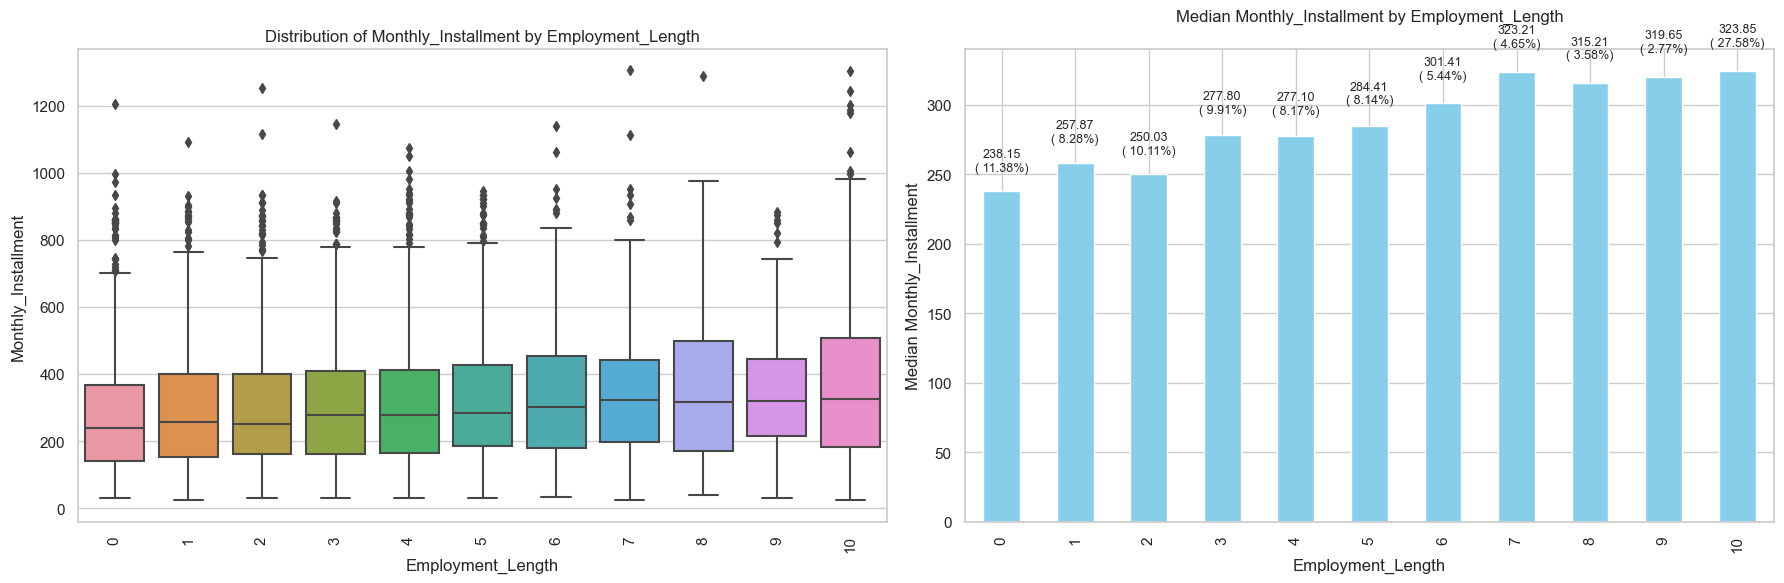

In [240]:
segmented_univariate_analysis(df, 'Employment_Length', 'Monthly_Installment')

<br><font color='red'> **Insight :**</font> 
1. Borrowers with shorter employment lengths (0-2 years) tend to have higher default rates, despite lower monthly installments.
2. As employment length increases, borrowers tend to have higher monthly installments but significantly lower default rates, particularly noticeable from 6 to 9 years of employment.
3. Borrowers with 10+ years of employment present an anomaly with both high monthly installments and the highest default rate at 27.58%.This is unusual because we would typically expect borrowers with longer employment lengths to have lower default rates, as seen with borrowers having 6 to 9 years of employment. Therefore, this exception suggests that there may be other factors influencing the default risk for borrowers with 10+ years of employment.
4. Overall, the analysis suggests that while employment length plays a role in determining monthly installments, it's not the sole factor influencing default rates

#### 5. Employment Length segmented by Home Ownership Status

Describe function output for Boxplot (Home_Ownership_Status):
                        count  mean  std  min  25%  50%   75%   max
Home_Ownership_Status                                              
MORTGAGE              2197.00  6.12 3.59 0.00 3.00 6.00 10.00 10.00
OTHER                   17.00  4.06 3.82 0.00 1.00 3.00  7.00 10.00
OWN                    434.00  5.59 3.72 0.00 2.00 5.00 10.00 10.00
RENT                  2773.00  4.53 3.55 0.00 2.00 4.00  8.00 10.00

Table for Visual Data (Home_Ownership_Status - Bar Plot):
                       Median Value  Default Rate
Home_Ownership_Status                            
MORTGAGE                       6.00         40.53
OTHER                          3.00          0.31
OWN                            5.00          8.01
RENT                           4.00         51.15


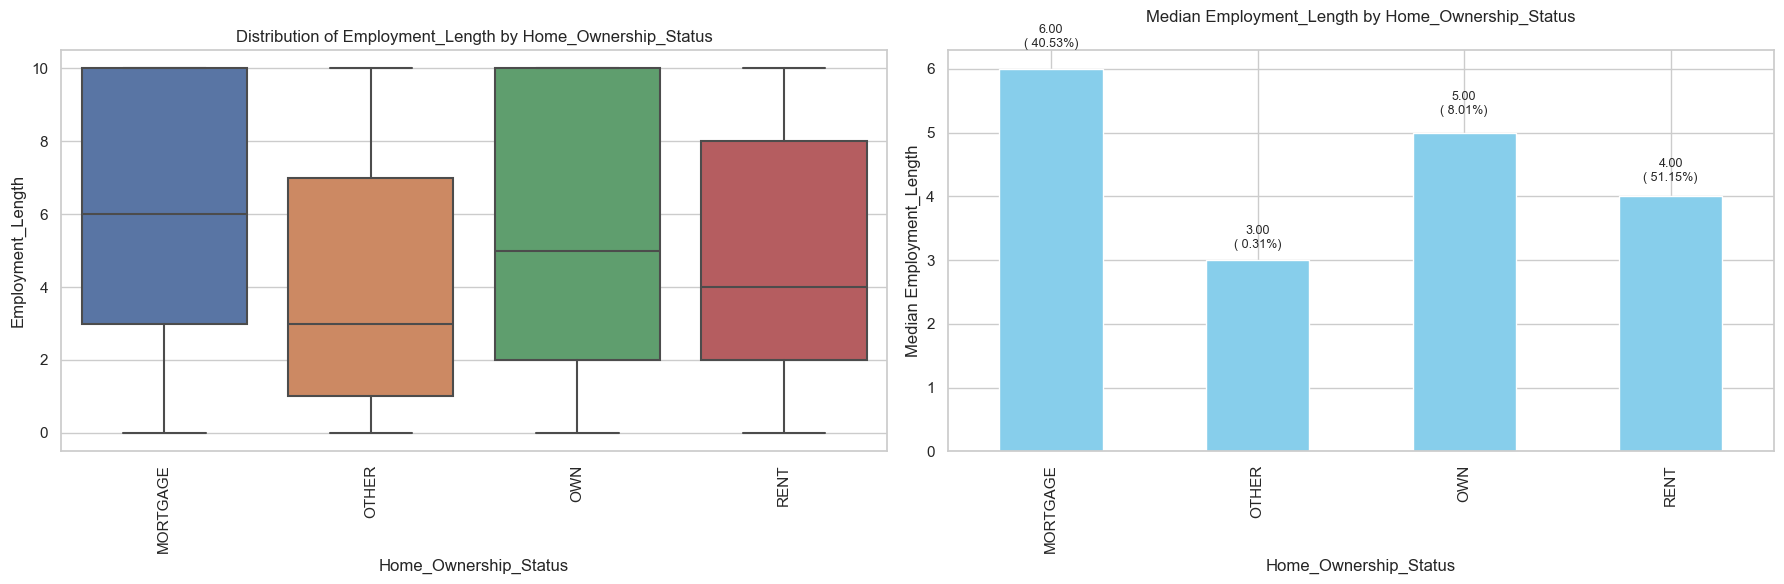

In [241]:
segmented_univariate_analysis(df, 'Home_Ownership_Status', 'Employment_Length')

<br><font color='red'> **Insight :**</font> 
1. Overall, the analysis suggests a correlation between home ownership status, employment length, and default rates.
2. Borrowers who own their owned homes or have mortgages tend to have longer employment lengths(5 and 6 years) and lower default rates(8.01% and 40.53%) compared to renters (51.15%). This indicates that stability in home ownership may be associated with greater financial stability and lower default risk.
<br><br>

#### 6. Annual Income segmented by Home Ownership Status

Describe function output for Boxplot (Home_Ownership_Status):
                        count     mean      std      min      25%      50%  \
Home_Ownership_Status                                                        
MORTGAGE              2197.00 66733.50 26780.28 11029.00 47000.00 62000.00   
OTHER                   17.00 55870.29 20863.28 25000.00 37800.00 57500.00   
OWN                    434.00 49715.97 26142.61  8412.00 32004.00 44750.00   
RENT                  2773.00 49436.14 23898.57  4080.00 32004.00 45000.00   

                           75%       max  
Home_Ownership_Status                     
MORTGAGE              83000.00 142000.00  
OTHER                 70000.00  95000.00  
OWN                   61000.00 140000.00  
RENT                  60580.00 140000.00  

Table for Visual Data (Home_Ownership_Status - Bar Plot):
                       Median Value  Default Rate
Home_Ownership_Status                            
MORTGAGE                   62000.00         40.53
OT

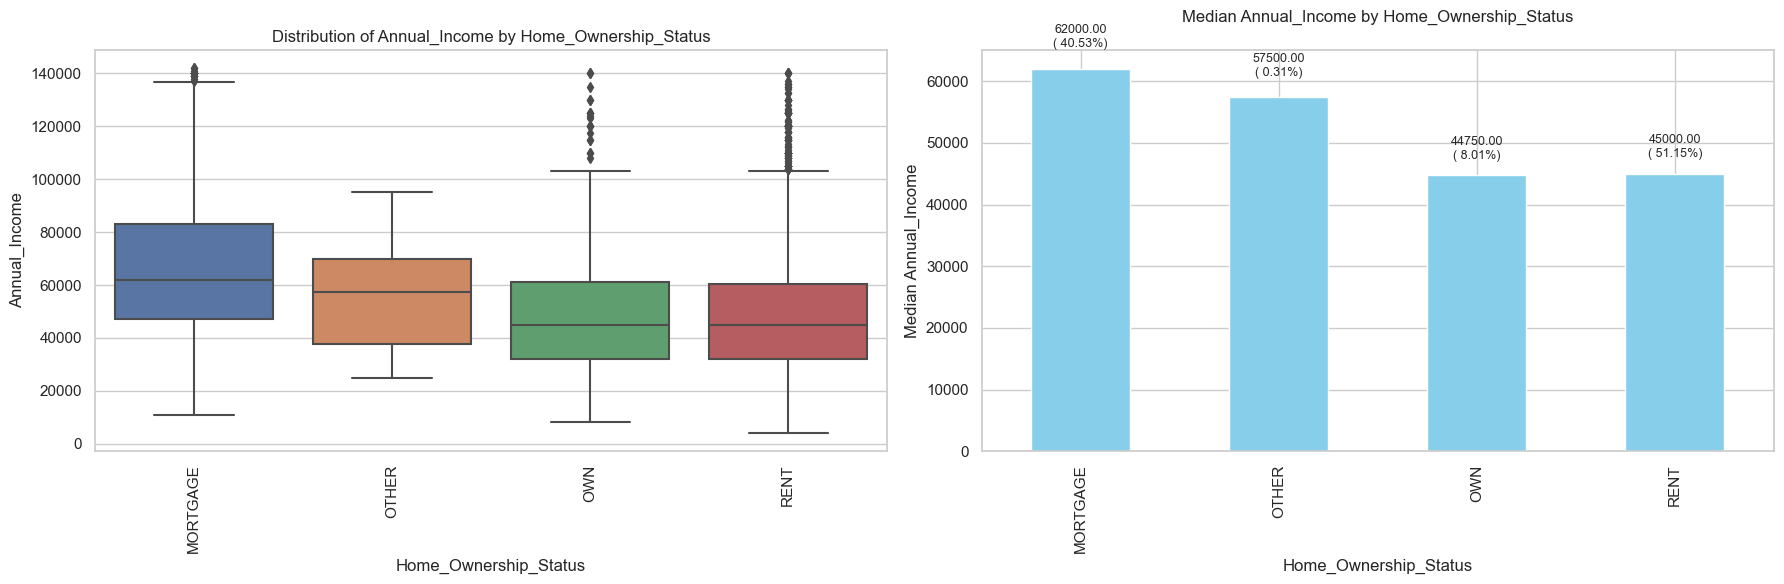

In [242]:
segmented_univariate_analysis(df, 'Home_Ownership_Status', 'Annual_Income')

<br><font color='red'> **Insight :**</font> 
1.  Borrowers with higher median incomes, such as those with mortgages (62,000.00)tend to have lower default rates compared to renters.
2.  The "Other" category shows the lowest default rate at 0.31%, but the small sample size (17 borrowers) might not provide a comprehensive picture.
3.  Despite having lower incomes, renters exhibit the highest default rate at 51.15%. This suggests that factors beyond income, such as financial stability or expenses associated with renting, might contribute to their higher default rates.
4.  Borrowers who own their homes have lower incomes compared to mortgage holders but demonstrate significantly lower default rates (8.01%), indicating stronger financial stability or better financial management.

#### 7. Debt-to-Income Ratio segmented by Employment Length

Describe function output for Boxplot (Employment_Length):
                    count  mean  std  min   25%   50%   75%   max
Employment_Length                                                
0                  617.00 13.14 6.59 0.00  8.24 13.28 18.35 29.00
1                  449.00 13.95 6.73 0.00  8.86 14.32 19.53 28.98
2                  548.00 13.67 6.68 0.00  8.50 14.04 19.07 29.18
3                  537.00 13.91 6.51 0.00  9.21 14.23 18.89 29.62
4                  443.00 13.56 6.77 0.00  8.90 13.81 18.70 29.04
5                  441.00 14.39 6.63 0.01  9.48 14.65 19.92 29.29
6                  295.00 14.43 6.69 0.00  9.45 14.80 19.88 28.76
7                  252.00 14.94 5.91 0.00 11.07 15.70 19.11 28.48
8                  194.00 14.99 6.13 0.56 10.43 15.43 19.80 27.43
9                  150.00 14.20 6.69 0.00  9.27 14.74 19.22 29.60
10                1495.00 14.53 6.54 0.00  9.57 14.70 19.91 29.85

Table for Visual Data (Employment_Length - Bar Plot):
                   Median Val

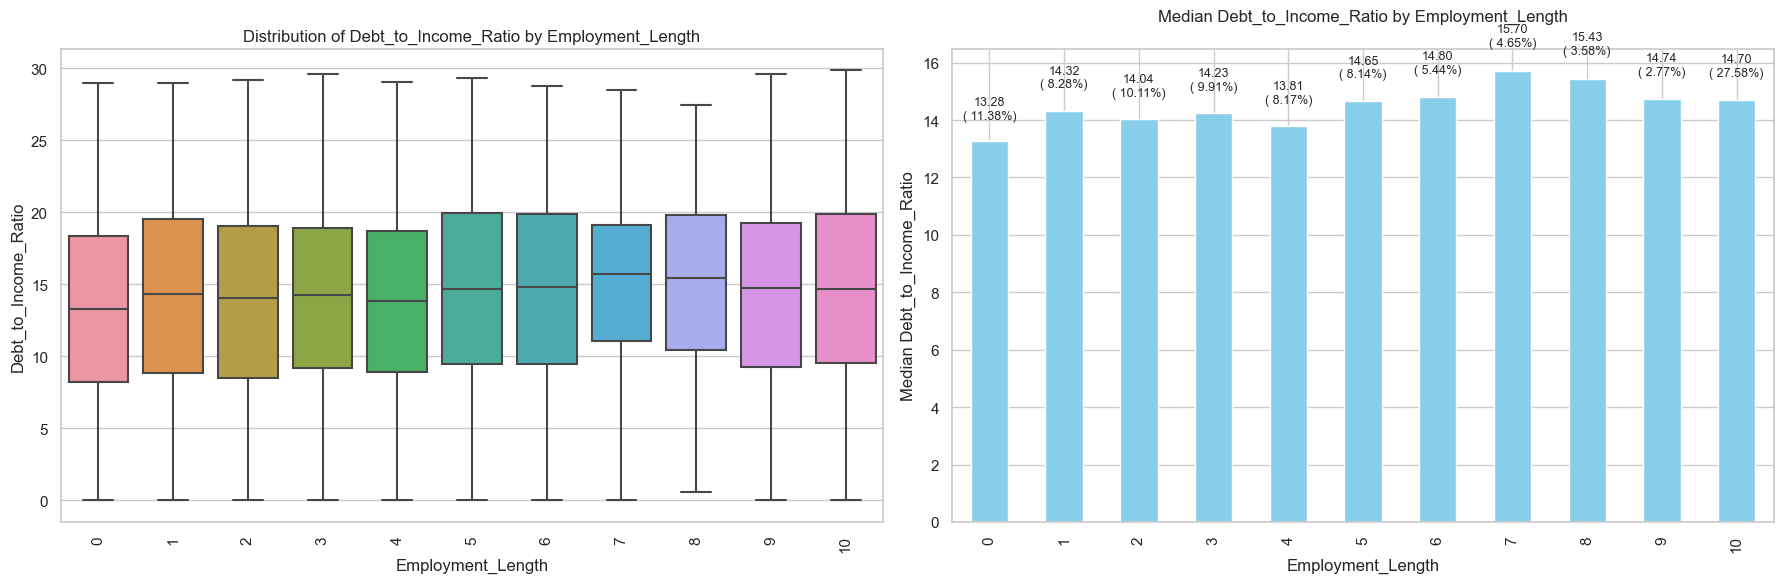

In [243]:
segmented_univariate_analysis(df, 'Employment_Length', 'Debt_to_Income_Ratio')

<br><font color='red'> **Insight :**</font> 
1. Short Employment Length Risk: Borrowers with less than 1 year of employment exhibit higher default rates, suggesting that short employment length is a risk factor for loan defaults.
2. Stable Employment: As employment length increases, default rates generally decrease, indicating that stable and longer employment histories are associated with lower default risk.
3. Anomalous High Default Rate: The exceptionally high default rate for borrowers with exactly 10 years of employment warrants further investigation to understand underlying causes.<br><br>

#### 8. Number of Delinquencies segmented by Home Ownership Status

Describe function output for Boxplot (Home_Ownership_Status):
                        count  mean  std  min  25%  50%  75%  max
Home_Ownership_Status                                            
MORTGAGE              2197.00  0.17 0.52 0.00 0.00 0.00 0.00 6.00
OTHER                   17.00  0.41 0.71 0.00 0.00 0.00 1.00 2.00
OWN                    434.00  0.21 0.58 0.00 0.00 0.00 0.00 3.00
RENT                  2773.00  0.16 0.53 0.00 0.00 0.00 0.00 8.00

Table for Visual Data (Home_Ownership_Status - Bar Plot):
                       Median Value  Default Rate
Home_Ownership_Status                            
MORTGAGE                       0.00         40.53
OTHER                          0.00          0.31
OWN                            0.00          8.01
RENT                           0.00         51.15


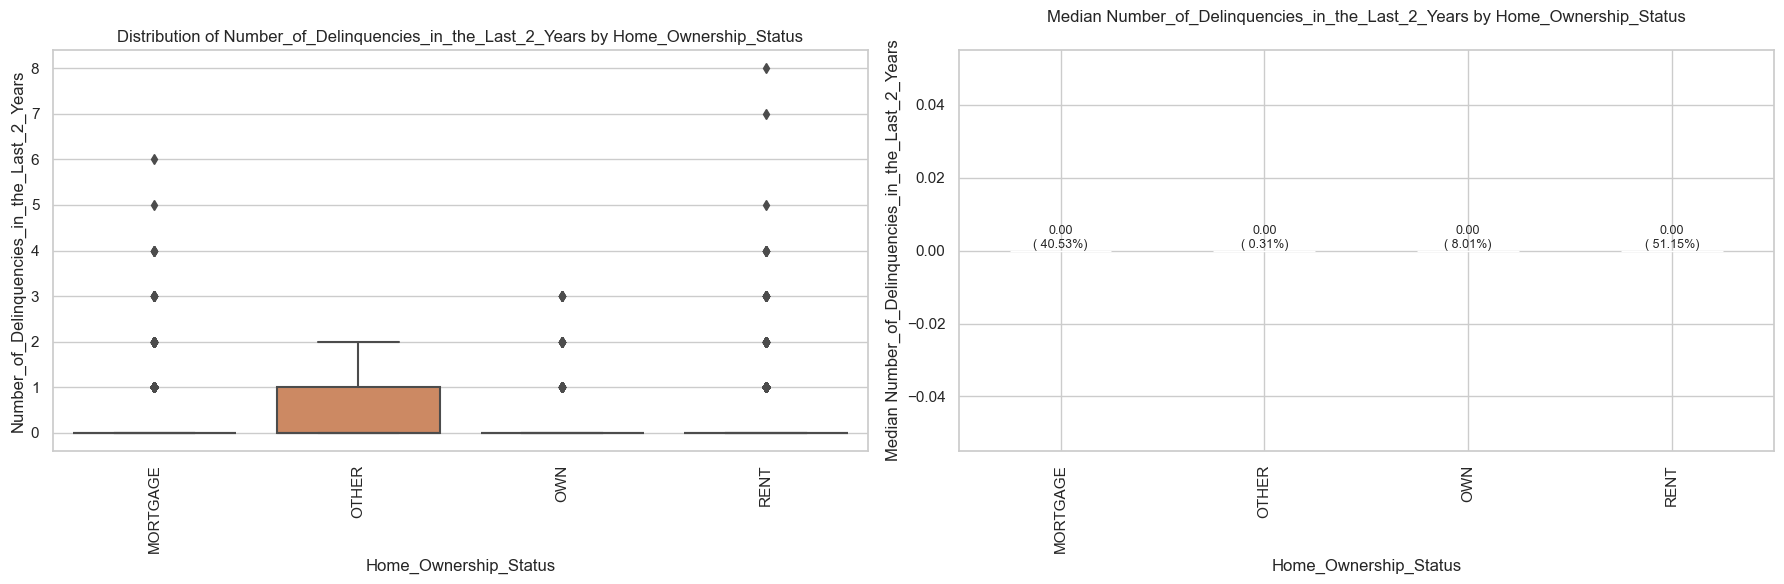

In [244]:
segmented_univariate_analysis(df, 'Home_Ownership_Status', 'Number_of_Delinquencies_in_the_Last_2_Years')

<br><font color='red'> **Insight :**</font> 
1. The analysis reveals that the median number of delinquencies is relatively low across different home ownership statuses. However, there's a noticeable variation in default rates among these groups.
2. Renters exhibit the highest default rate, followed by mortgage holders, while individuals categorized under 'other' and 'own' have significantly lower default rates. This suggests that while the number of delinquencies may not differ significantly across home ownership statuses, there are disparities in default rates, with renters being at a higher risk of default compared to other groups.

#### 9. Number of Inquiries in the Last 6 Months segmented by Credit Grade

Describe function output for Boxplot (Credit_Grade):
               count  mean  std  min  25%  50%  75%  max
Credit_Grade                                            
A             593.00  0.86 1.11 0.00 0.00 0.00 1.00 6.00
B            1378.00  0.93 1.19 0.00 0.00 1.00 2.00 8.00
C            1325.00  1.23 1.19 0.00 0.00 1.00 2.00 8.00
D            1081.00  1.14 1.15 0.00 0.00 1.00 2.00 7.00
E             660.00  1.00 1.03 0.00 0.00 1.00 2.00 6.00
F             289.00  1.08 1.09 0.00 0.00 1.00 2.00 8.00
G              95.00  1.04 1.08 0.00 0.00 1.00 2.00 3.00

Table for Visual Data (Credit_Grade - Bar Plot):
              Median Value  Default Rate
Credit_Grade                            
A                     0.00         10.94
B                     1.00         25.42
C                     1.00         24.44
D                     1.00         19.94
E                     1.00         12.17
F                     1.00          5.33
G                     1.00          1.75


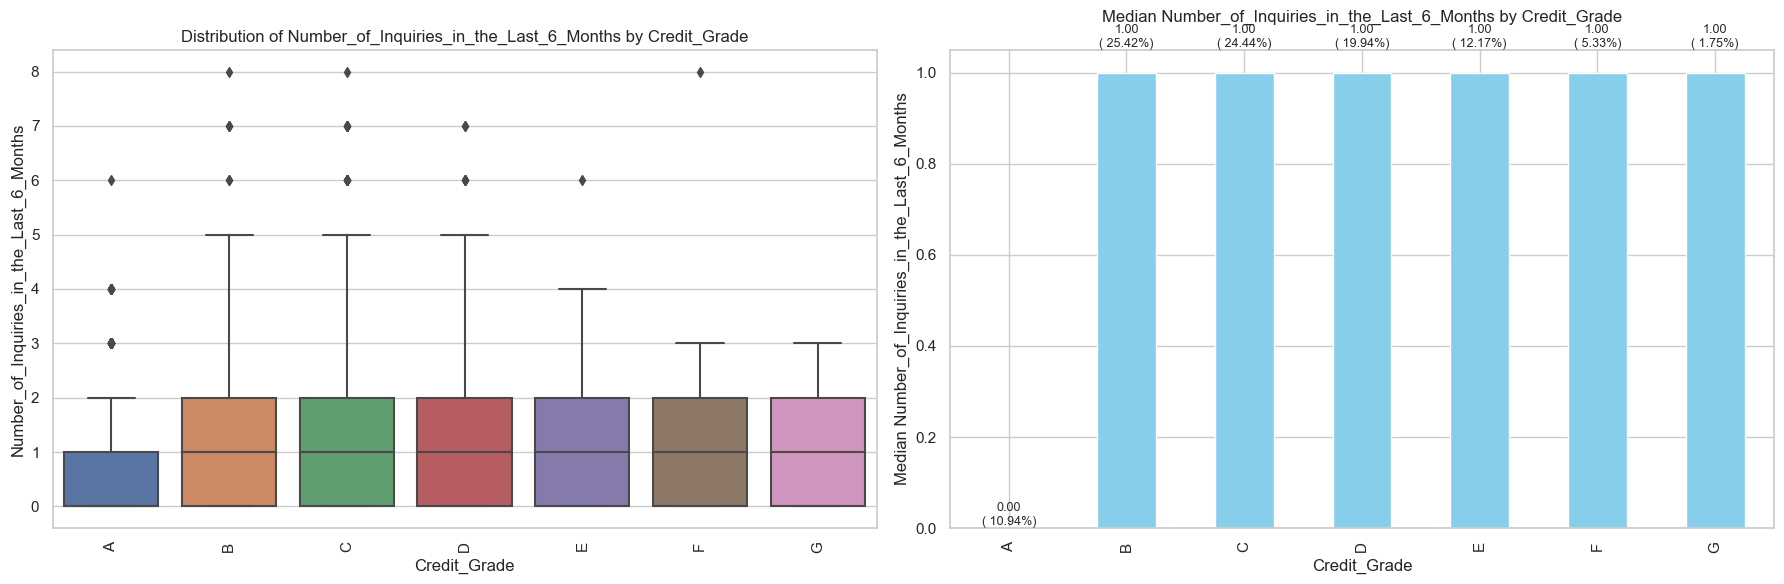

In [245]:
segmented_univariate_analysis(df, 'Credit_Grade','Number_of_Inquiries_in_the_Last_6_Months')

<br><font color='red'> **Insight :**</font> 
1. Borrowers with higher credit grades (A: 10.94%) have significantly lower default rates indicating more stable and less frequent credit activity.
2. Borrowers in Grades B (25.42%), C (24.44%), and D (19.94%) have moderate default rates, correlating with a higher number of inquiries.
3.  Grades E, F, and G have lower default rates of 12.17%, 5.33%, and 1.75%, respectively, despite having similar numbers of inquiries as Grades B, C, and D.This suggests other underlying factors influencing their risk.
4. This suggest that credit grade is a more significant predictor of default compared to the number of inquiries.

#### 10. Number of Open Credit Accounts segmented by Income Verification Status

Describe function output for Boxplot (Income_Verification_Status):
                             count  mean  std  min  25%  50%   75%   max
Income_Verification_Status                                              
Not Verified               2097.00  8.98 4.54 2.00 6.00 8.00 11.00 38.00
Source Verified            1373.00  8.61 4.32 2.00 6.00 8.00 11.00 33.00
Verified                   1951.00  9.56 4.45 2.00 6.00 9.00 12.00 34.00

Table for Visual Data (Income_Verification_Status - Bar Plot):
                            Median Value  Default Rate
Income_Verification_Status                            
Not Verified                        8.00         38.68
Source Verified                     8.00         25.33
Verified                            9.00         35.99


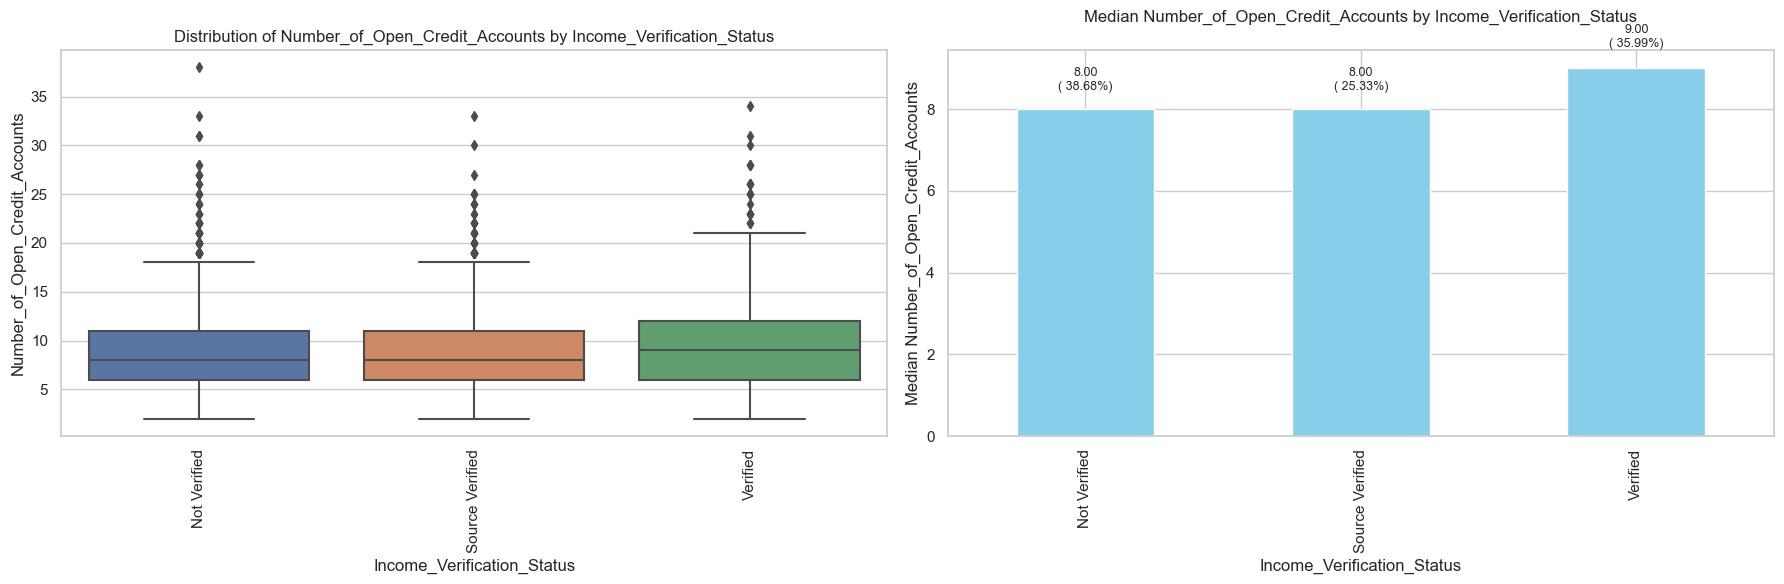

In [246]:
segmented_univariate_analysis(df, 'Income_Verification_Status','Number_of_Open_Credit_Accounts')

<br><font color='red'> **Insight :**</font> 
1. Not Verified: These borrowers have the highest default rate at 38.68%, despite having a similar number of open credit accounts as Source Verified .
2. Source Verified: These borrowers have the lowest default rate at 25.33%, indicating that source verification is an effective measure in reducing default risk.
3. Verified: Borrowers with fully verified income have a default rate of 35.99%, slightly lower than those with unverified income but still relatively high.
4. This suggests that income verification status is a more significant predictor of default than the number of open credit accounts.

#### 11. Number of Public Records segmented by Credit Grade

Describe function output for Boxplot (Credit_Grade):
               count  mean  std  min  25%  50%  75%  max
Credit_Grade                                            
A             593.00  0.02 0.14 0.00 0.00 0.00 0.00 1.00
B            1378.00  0.07 0.26 0.00 0.00 0.00 0.00 2.00
C            1325.00  0.10 0.31 0.00 0.00 0.00 0.00 2.00
D            1081.00  0.10 0.32 0.00 0.00 0.00 0.00 2.00
E             660.00  0.10 0.31 0.00 0.00 0.00 0.00 2.00
F             289.00  0.12 0.33 0.00 0.00 0.00 0.00 1.00
G              95.00  0.17 0.38 0.00 0.00 0.00 0.00 1.00

Table for Visual Data (Credit_Grade - Bar Plot):
              Median Value  Default Rate
Credit_Grade                            
A                     0.00         10.94
B                     0.00         25.42
C                     0.00         24.44
D                     0.00         19.94
E                     0.00         12.17
F                     0.00          5.33
G                     0.00          1.75


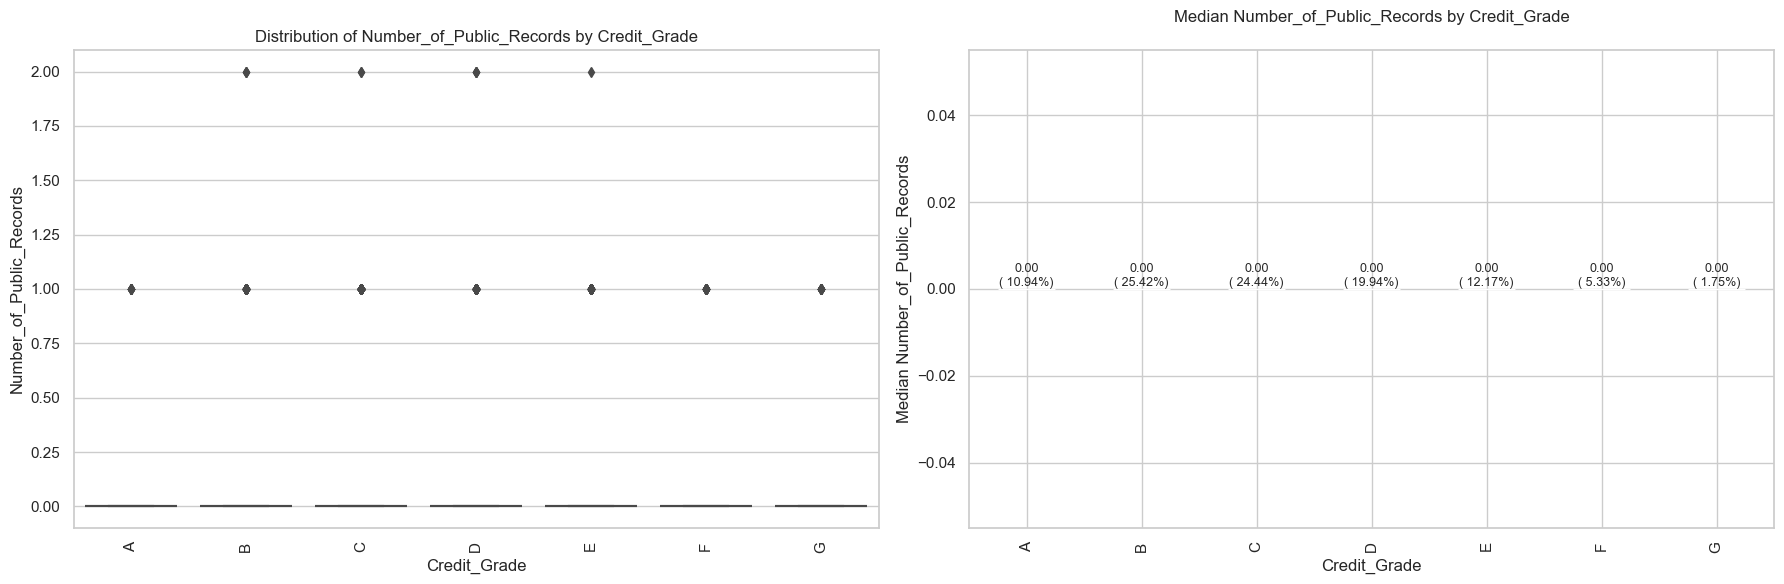

In [247]:
segmented_univariate_analysis(df, 'Credit_Grade','Number_of_Public_Records')

<br><font color='red'> **Insight :**</font> 
1. The analysis indicates that as the credit grade decreases from A to G, there's a gradual increase in the mean number of public records.
2. When looking at the median values, they all stand at 0.00 across all credit grades. This indicates that the majority of borrowers across all credit grades have no public records.
3. While default rates tend to increase as credit grades decline, the number of public records alone may not be a decisive factor in predicting default risk. 

#### 12. Revolving Balance segmented by Loan Purpose:

Describe function output for Boxplot (Loan_Purpose):
                     count     mean      std  min     25%      50%      75%  \
Loan_Purpose                                                                  
car                 159.00  9702.78 11428.12 0.00 1955.50  5150.00 13314.50   
credit_card         519.00 17203.52 15634.72 0.00 7869.50 13438.00 20967.50   
debt_consolidation 2679.00 13831.10 13036.72 0.00 5421.50 10498.00 17935.00   
educational          54.00  9294.63 13554.52 0.00 1633.75  3995.50 10457.00   
home_improvement    322.00 11068.01 13319.80 0.00 2144.75  6815.00 15259.25   
house                55.00  9881.09 11904.03 0.00 2657.00  5737.00 10048.50   
major_purchase      217.00  6921.60  8168.85 0.00 1066.00  3971.00  9410.00   
medical             104.00 10989.52 13491.67 0.00 2072.00  6596.50 16150.75   
moving               90.00  6680.86  7977.38 0.00 1040.75  4096.50  9159.50   
other               605.00 10336.27 13917.71 0.00 1902.00  5386.00 12909.00   

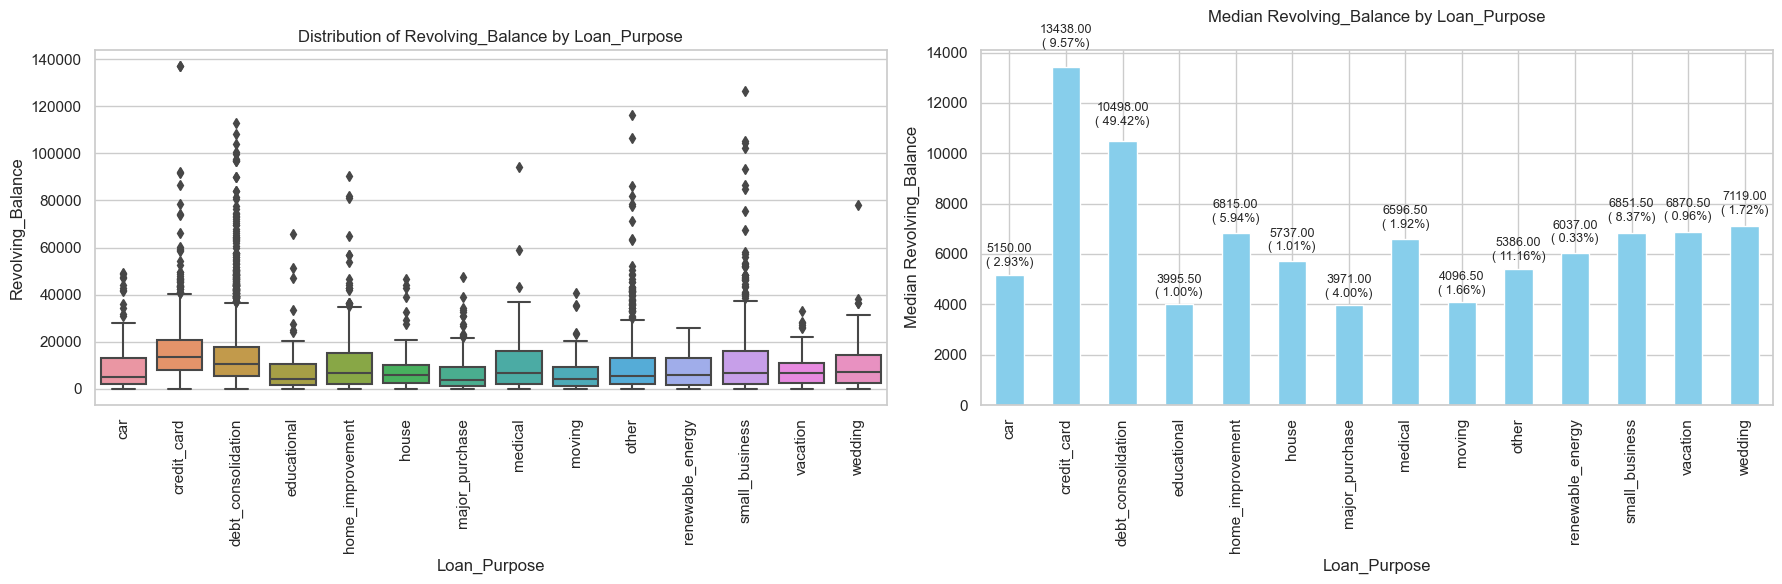

In [248]:
segmented_univariate_analysis(df, 'Loan_Purpose','Revolving_Balance')

<br><font color='red'> **Insight :**</font> 
1. Overall, the data suggests that higher median revolving balances are associated with higher default rates, indicating that borrowers with larger debt burdens are more likely to default on their loans but we need to look at the bigger picture of a person's financial situation

#### 13. Revolving Utilization Rate segmented by Employment Length

Describe function output for Boxplot (Employment_Length):
                    count  mean   std  min   25%   50%   75%   max
Employment_Length                                                 
0                  617.00 54.94 28.50 0.00 32.80 56.50 79.60 99.90
1                  449.00 52.31 29.58 0.00 28.60 53.90 76.90 99.80
2                  548.00 54.02 27.85 0.00 33.45 57.45 77.03 99.50
3                  537.00 53.70 27.58 0.00 32.90 54.70 76.40 99.30
4                  443.00 57.00 27.97 0.00 38.10 58.60 81.60 99.90
5                  441.00 56.14 28.15 0.00 34.80 60.50 79.00 99.90
6                  295.00 58.29 26.51 0.00 40.70 62.40 80.50 99.90
7                  252.00 56.51 27.10 0.00 37.85 59.90 77.80 99.80
8                  194.00 56.70 24.64 0.00 36.80 57.90 77.38 98.70
9                  150.00 55.40 27.90 0.00 35.23 57.15 77.95 98.40
10                1495.00 55.78 27.69 0.00 34.05 58.60 79.40 99.90

Table for Visual Data (Employment_Length - Bar Plot):
                

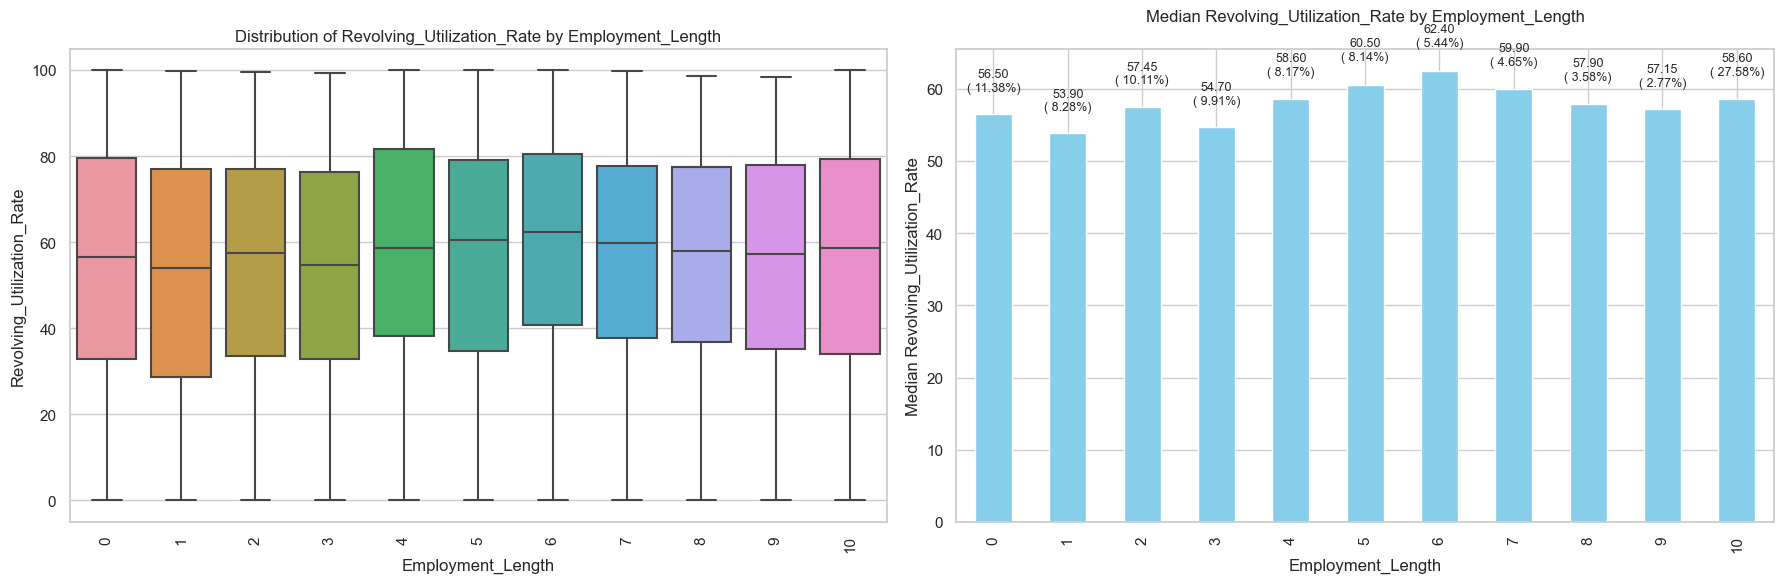

In [249]:
segmented_univariate_analysis(df, 'Employment_Length','Revolving_Utilization_Rate')

<br><font color='red'> **Insight :**</font> 
1. The data indicates that the median revolving utilization rates remain relatively consistent across different lengths of employment, ranging from approximately 53.9% to 62.4%.
2. Despite slight fluctuations, there isn't a significant trend suggesting that employment length strongly influences revolving utilization rates.
3. Additionally, the default rates don't exhibit substantial variations across different employment lengths, suggesting that revolving utilization rates may not be a major driving factor behind loan defaults in this scenario.

#### 14. Total Number of Credit Accounts segmented by Income Verification Status

Describe function output for Boxplot (Income_Verification_Status):
                             count  mean   std  min   25%   50%   75%   max
Income_Verification_Status                                                 
Not Verified               2097.00 20.23 11.05 3.00 12.00 18.00 27.00 70.00
Source Verified            1373.00 19.37 10.73 3.00 11.00 17.00 25.00 63.00
Verified                   1951.00 23.34 11.64 2.00 14.00 22.00 31.00 74.00

Table for Visual Data (Income_Verification_Status - Bar Plot):
                            Median Value  Default Rate
Income_Verification_Status                            
Not Verified                       18.00         38.68
Source Verified                    17.00         25.33
Verified                           22.00         35.99


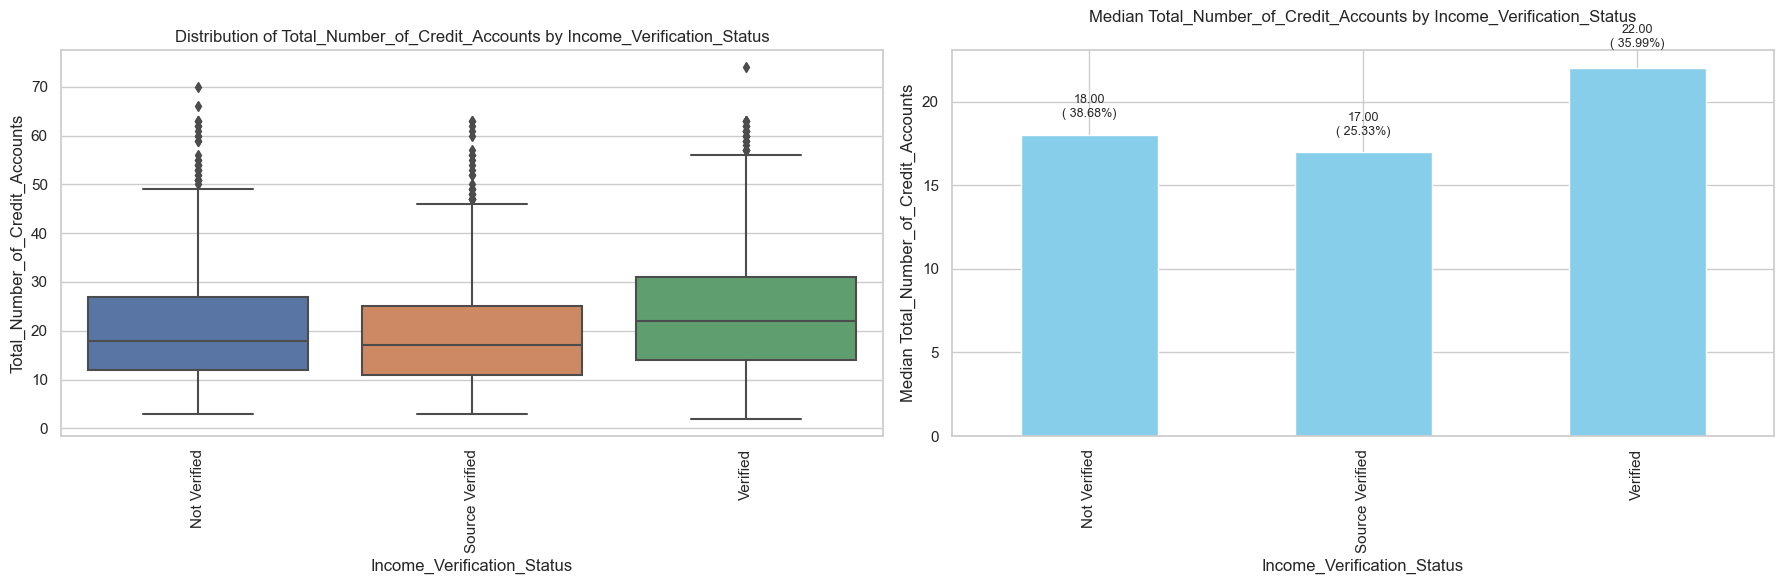

In [250]:
segmented_univariate_analysis(df, 'Income_Verification_Status','Total_Number_of_Credit_Accounts')

<br><font color='red'> **Insight :**</font> 
1. The data suggests that borrowers with verified income tend to have a higher median total number of credit accounts compared to those with unverified or source-verified income.
2. Verified borrowers have a median of 22 credit accounts, while those with source-verified or unverified income have median values of 17 and 18 credit accounts, respectively.
3. Despite these differences, default rates show a similar pattern across income verification statuses, indicating that while the number of credit accounts may vary, it may not be a significant driver of loan defaults in this context.

#### 15. Number of Public Record Bankruptcies segmented by Home Ownership Status

Describe function output for Boxplot (Home_Ownership_Status):
                        count  mean  std  min  25%  50%  75%  max
Home_Ownership_Status                                            
MORTGAGE              2197.00  0.08 0.27 0.00 0.00 0.00 0.00 2.00
OTHER                   17.00  0.12 0.33 0.00 0.00 0.00 0.00 1.00
OWN                    434.00  0.07 0.25 0.00 0.00 0.00 0.00 1.00
RENT                  2773.00  0.06 0.23 0.00 0.00 0.00 0.00 2.00

Table for Visual Data (Home_Ownership_Status - Bar Plot):
                       Median Value  Default Rate
Home_Ownership_Status                            
MORTGAGE                       0.00         40.53
OTHER                          0.00          0.31
OWN                            0.00          8.01
RENT                           0.00         51.15


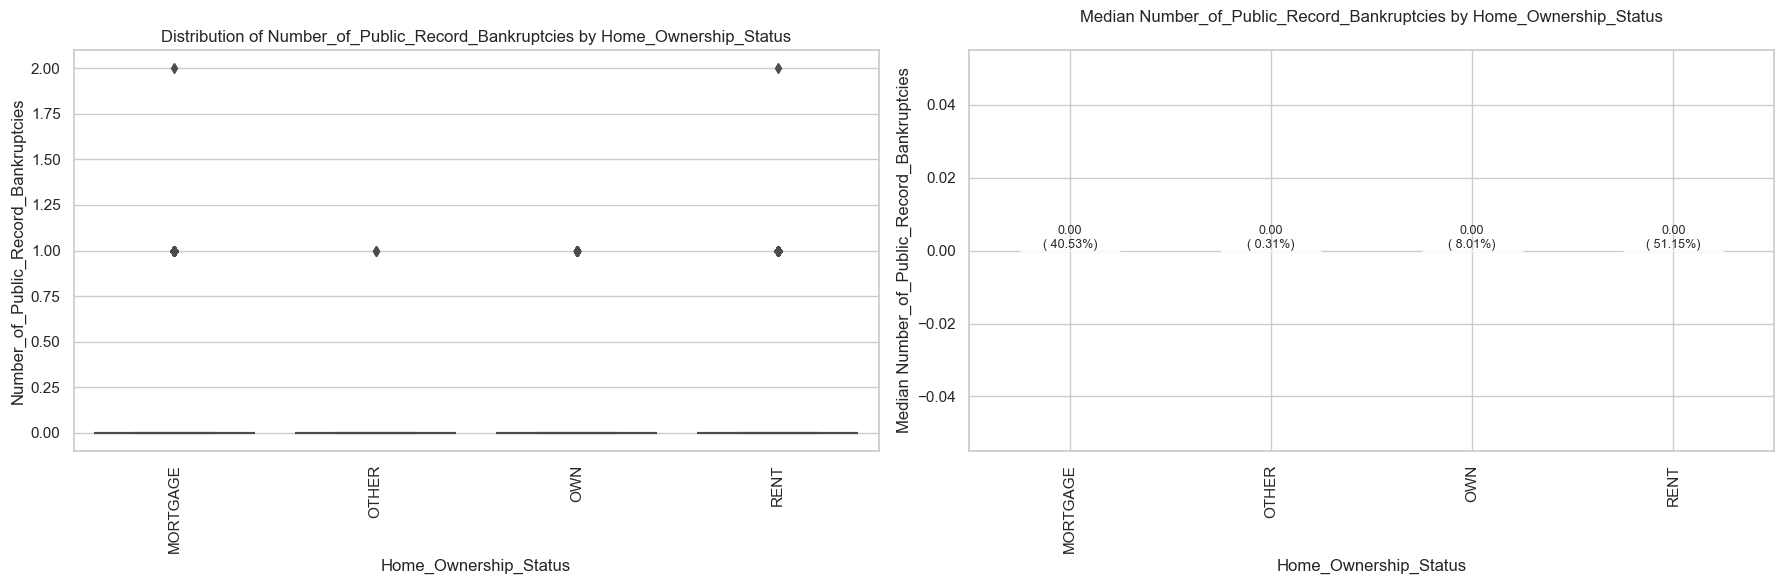

In [251]:
segmented_univariate_analysis(df, 'Home_Ownership_Status','Number_of_Public_Record_Bankruptcies')

<br><font color='red'> **Insight :**</font> 
1. Despite the differences in means, the medians for the number of public record bankruptcies are the same across all home ownership statuses, indicating that for most individuals within each group, the number of bankruptcies is zero.
2. It's not the main reason why people default on their loans. Other factors likely play a bigger role.

#### 16. Earliest Credit Line (Month) segmented by Credit Grade

Describe function output for Boxplot (Credit_Grade):
               count  mean  std  min  25%  50%   75%   max
Credit_Grade                                              
A             593.00  6.54 3.53 1.00 4.00 7.00 10.00 12.00
B            1378.00  6.79 3.50 1.00 4.00 7.00 10.00 12.00
C            1325.00  6.84 3.63 1.00 4.00 7.00 10.00 12.00
D            1081.00  6.59 3.62 1.00 3.00 7.00 10.00 12.00
E             660.00  6.83 3.57 1.00 4.00 7.00 10.00 12.00
F             289.00  6.50 3.53 1.00 3.00 7.00 10.00 12.00
G              95.00  7.19 3.76 1.00 4.00 8.00 11.00 12.00

Table for Visual Data (Credit_Grade - Bar Plot):
              Median Value  Default Rate
Credit_Grade                            
A                     7.00         10.94
B                     7.00         25.42
C                     7.00         24.44
D                     7.00         19.94
E                     7.00         12.17
F                     7.00          5.33
G                     8.00          1.

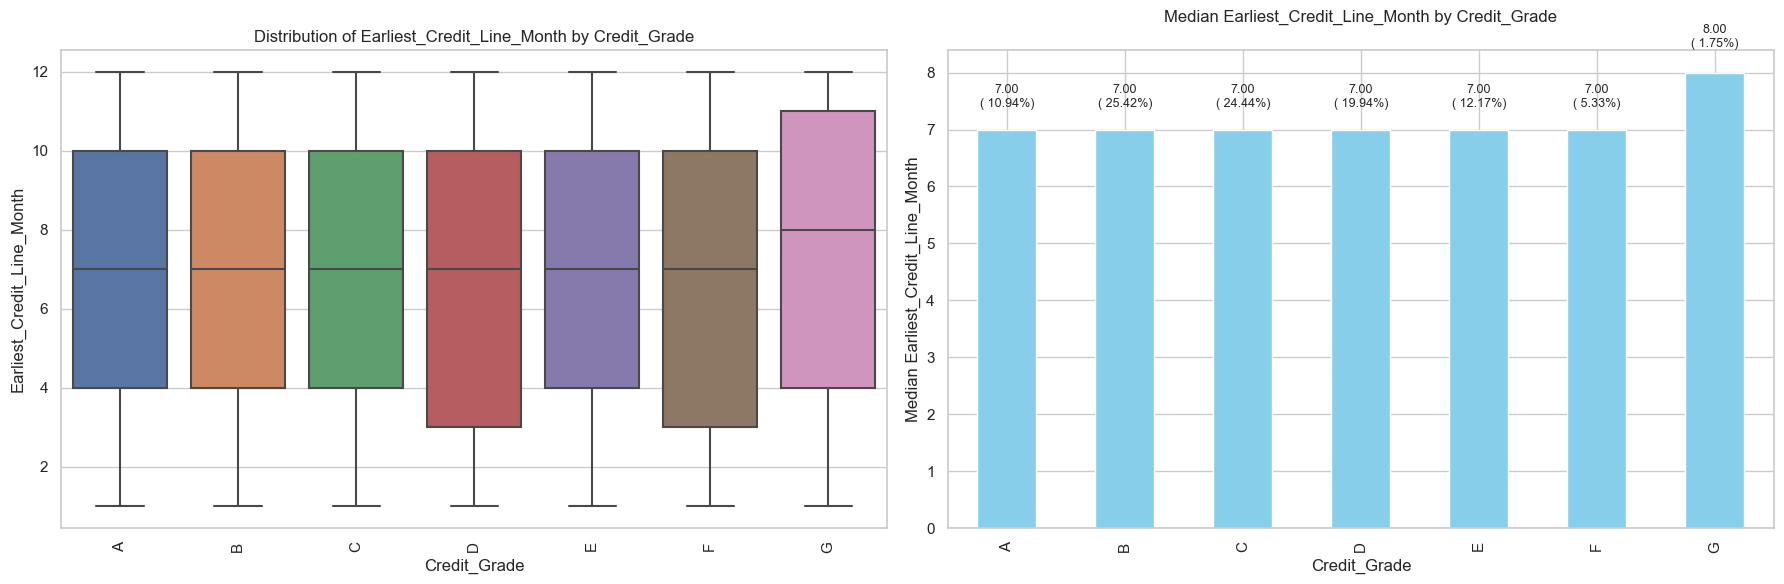

In [252]:
segmented_univariate_analysis(df, 'Credit_Grade','Earliest_Credit_Line_Month')

<br><font color='red'> **Insight :**</font> 
1. The data shows that there's some variation in the mean earliest credit line month across different credit grades.
2. However, the median value for the earliest credit line month is consistent across all credit grades, indicating that for the majority of borrowers within each grade, the earliest credit line month falls around the same time.
3. This suggests that it may not be a significant driver of loan defaults

#### 17. Earliest Credit Line (Year) segmented by Loan Purpose:

Describe function output for Boxplot (Loan_Purpose):
                     count    mean   std     min     25%     50%     75%  \
Loan_Purpose                                                               
car                 159.00 1998.79 10.13 1975.00 1995.00 1999.00 2003.00   
credit_card         519.00 1996.65  7.47 1970.00 1993.00 1998.00 2001.00   
debt_consolidation 2679.00 1997.03  6.87 1970.00 1994.00 1998.00 2001.00   
educational          54.00 1996.48  8.06 1970.00 1992.25 1998.00 2002.75   
home_improvement    322.00 1996.28  9.90 1969.00 1992.00 1997.00 2000.00   
house                55.00 1998.64  4.84 1986.00 1996.00 1998.00 2001.00   
major_purchase      217.00 1998.73  6.13 1973.00 1995.00 1999.00 2004.00   
medical             104.00 1998.27  6.01 1978.00 1995.00 1998.00 2003.00   
moving               90.00 1999.50  6.15 1973.00 1997.00 2000.50 2004.00   
other               605.00 1998.13  7.04 1971.00 1995.00 1999.00 2003.00   
renewable_energy     18.00 1996.33 

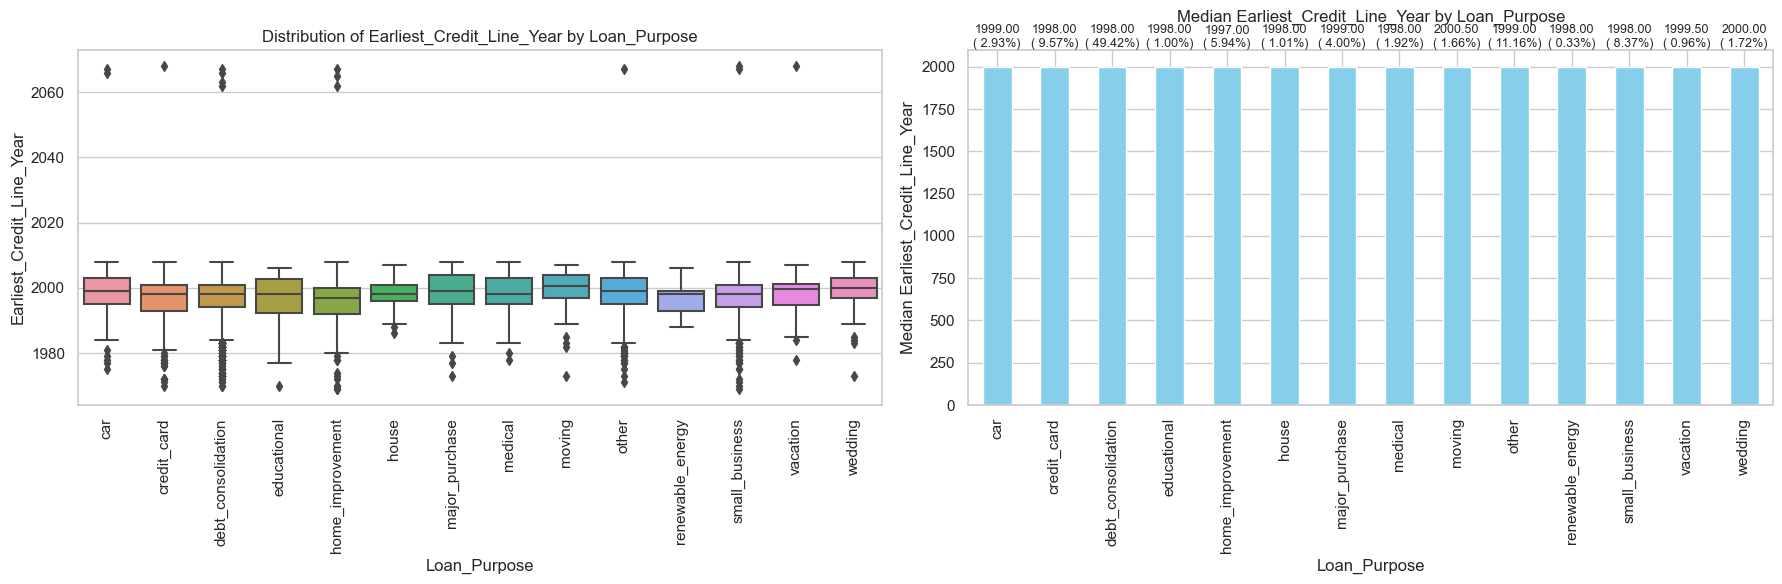

In [253]:
segmented_univariate_analysis(df, 'Loan_Purpose','Earliest_Credit_Line_Year')

<br><font color='red'> **Insight :**</font> 
1. the mean year of the earliest credit line varies slightly across different loan purposes, suggesting some variation in the average time borrowers established their first credit lines depending on the purpose of their loan.
2. However, the median year of the earliest credit line tends to cluster around the late 1990s for most loan purposes, indicating that for the majority of borrowers within each category, the earliest credit lines were established around the same time period.
3. This suggests that it may not be a significant driver of loan defaults


 #### <font color='red'>Based on the analysis above 5 important driver variables (i.e. variables which are strong indicators of default) are:</font>
 1. **Credit Grade:** 
 2. **Income Verification Status:**
 3. **Debt-to-Income Ratio:**  
 4. **Interest Rates:**
 5. **Home Ownership Status:** 

 <a id="derived-metrics"></a>
 ### Derived Metrics

In [254]:
#  Credit Utilization Ratio - It reflects the proportion of available credit being used, which can indicate financial strain and potential default risk.

# Calculate Credit Utilization Ratio
df['Credit_Utilization_Ratio'] = df['Revolving_Balance'] / df['Total_Number_of_Credit_Accounts']
df['Credit_Utilization_Ratio'].head()

0   1516.44
1    421.75
2    295.60
3    151.30
4    731.13
Name: Credit_Utilization_Ratio, dtype: float64

In [255]:
# Number of Inquiries per Credit Account - It reflects the borrower's recent credit-seeking behavior, which may indicate financial instability and 
# potential default risk.

# Calculate Number of Inquiries per Credit Account
df['Number_of_Inquiries_per_Account'] = df['Number_of_Inquiries_in_the_Last_6_Months'] / df['Number_of_Open_Credit_Accounts']
df['Number_of_Inquiries_per_Account'].head()

0   0.33
1   1.67
2   1.00
3   0.10
4   0.00
Name: Number_of_Inquiries_per_Account, dtype: float64

In [256]:
# Public Records per Credit Account - It provides insight into the borrower's financial history and any legal issues that may impact their 
# ability to repay loans.
# Calculate Public Records per Credit Account
df['Public_Records_per_Account'] = df['Number_of_Public_Records'] / df['Number_of_Open_Credit_Accounts']
df['Public_Records_per_Account'].head()

0   0.00
1   0.00
2   0.00
3   0.00
4   0.00
Name: Public_Records_per_Account, dtype: float64

In [257]:
# Number of Delinquencies per Credit Account -  It provides insight into the borrower's payment history and their likelihood of default based on
# past delinquencies.
df['Number_of_Delinquencies_per_Account'] = df['Number_of_Delinquencies_in_the_Last_2_Years'] / df['Number_of_Open_Credit_Accounts']
df['Number_of_Delinquencies_per_Account'].head()

0   0.00
1   0.00
2   0.00
3   0.00
4   0.00
Name: Number_of_Delinquencies_per_Account, dtype: float64

<a id="bivariate-analysis"></a>
### Bivariate Analysis - To examine the relationship between two variables to determine their association.


In [258]:
def bivariate_analysis(df, segment_column, value_column, status_column='Loan_Status', status_value='Charged Off'):

    # Filter the DataFrame for the specified loan status
    filtered_df = df[df[status_column] == status_value]

    # Define unique values in the segment column
    segment_values = sorted(df[segment_column].unique())

    # Create subplots for visualizations
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

    # Visualization 1: Boxplot of the value column segmented by the segment column
    sns.boxplot(x=segment_column, y=value_column, data=filtered_df, order=segment_values, ax=axes[0])
    axes[0].set_title(f'Distribution of {value_column} by {segment_column}')
    axes[0].set_xlabel(segment_column)
    axes[0].set_ylabel(value_column)
    axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)

    # Display the describe() function output
    describe_output = filtered_df.groupby(segment_column)[value_column].describe()
    print(f"Describe function output for Boxplot ({segment_column}):")
    print(describe_output)

    # Visualization 2: Bar plot of median values by segment column
    median_values = filtered_df.groupby(segment_column)[value_column].median()
    median_values_sorted = median_values.reindex(segment_values)
    bar_plot = median_values_sorted.plot(kind='bar', ax=axes[1], color='skyblue')
    axes[1].set_title(f'Median {value_column} by {segment_column}', pad=20)
    axes[1].set_xlabel(segment_column)
    axes[1].set_ylabel(f'Median {value_column}')

    # Calculate and display the default percentage on top of each bar
    visual_data_table = pd.DataFrame({'Median Value': median_values_sorted})
    visual_data_table.index.name = segment_column
    visual_data_table['Default Rate'] = visual_data_table.index.map(
        lambda x: (filtered_df[filtered_df[segment_column] == x].shape[0] / len(filtered_df)) * 100
    )
    for i, v in enumerate(median_values_sorted):
        axes[1].text(i, v + (0.05 * v), f'{v:.2f}\n( {visual_data_table.iloc[i]["Default Rate"]:.2f}%)', 
                     ha='center', va='bottom', fontsize=9)

    # Display the table for visual data
    print(f"\nTable for Visual Data ({segment_column} - Bar Plot):")
    print(visual_data_table)

    plt.tight_layout()
    plt.show()

#### 1. Credit Grade vs. Debt-to-Income Ratio

Describe function output for Boxplot (Credit_Grade):
               count  mean  std  min   25%   50%   75%   max
Credit_Grade                                                
A             593.00 13.42 7.09 0.00  8.17 13.30 18.91 29.85
B            1378.00 13.96 6.78 0.00  8.89 14.40 19.37 29.60
C            1325.00 14.47 6.53 0.00  9.57 14.72 19.77 29.36
D            1081.00 14.04 6.41 0.00  9.33 14.08 19.38 29.00
E             660.00 14.43 6.23 0.00 10.10 14.95 19.69 24.96
F             289.00 14.18 6.04 0.08 10.04 15.06 18.93 24.84
G              95.00 13.55 7.05 0.00  7.95 14.28 19.87 24.52

Table for Visual Data (Credit_Grade - Bar Plot):
              Median Value  Default Rate
Credit_Grade                            
A                    13.30         10.94
B                    14.40         25.42
C                    14.72         24.44
D                    14.08         19.94
E                    14.95         12.17
F                    15.06          5.33
G                   

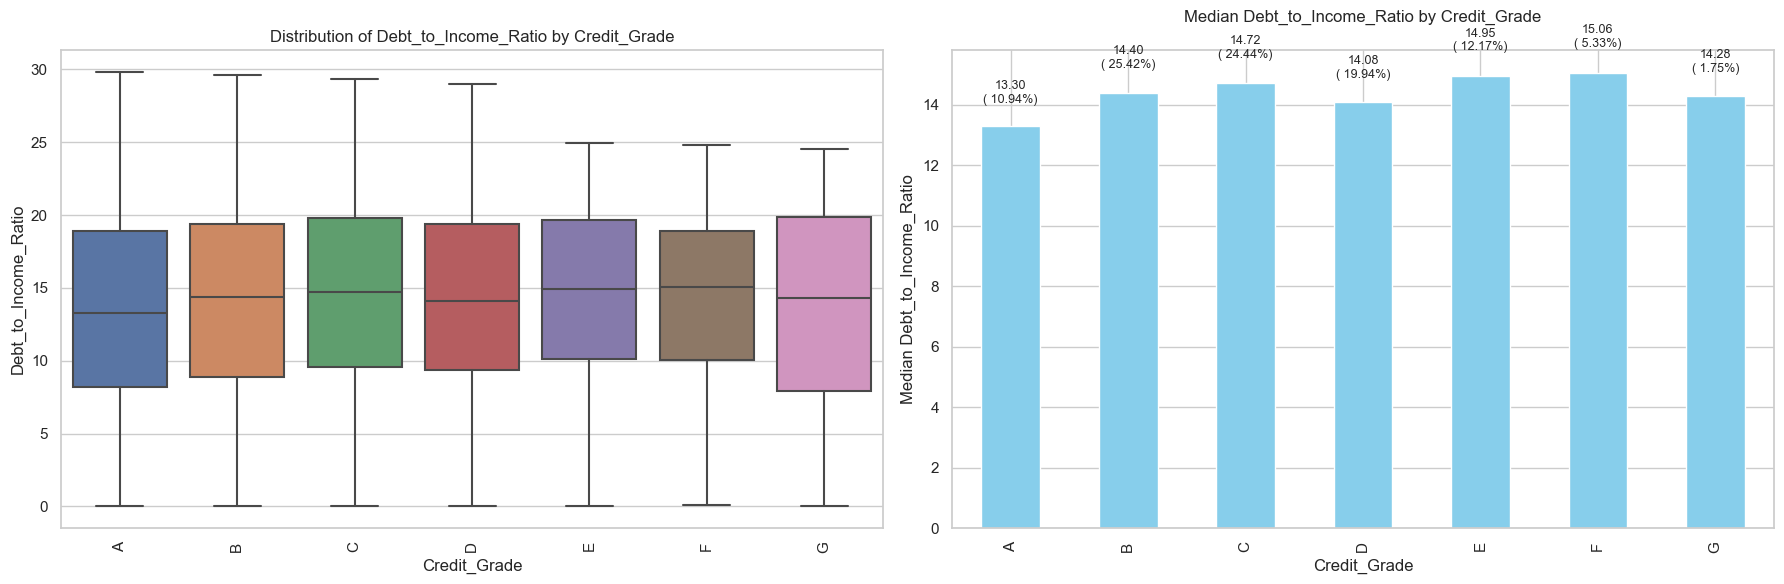

In [259]:
bivariate_analysis(df, 'Credit_Grade', 'Debt_to_Income_Ratio')

<br><font color='red'> **Insight :**</font> 
1. Credit grades B and C exhibit relatively high default rates, ranging from approximately 25% to 24% respectively.
2. These rates indicate a substantial proportion of borrowers within these credit grades defaulting on their loans. While default rates for grades A and D are relatively lower approximately 11% to 20% respectively, they still signify noteworthy default risks.
3. These grades show higher median DTI values(> 13) and higher default rates that reflects the higher default risk associated with these credit grades.

<font color='red'> **Recommendation :**</font>
1. To minimize losses from unpaid loans, the online loan marketplace should prioritize borrowers with credit grades B and C, known for higher default rates.
2. Improving loan assessment methods and providing tailored assistance to these borrowers is crucial. Additionally, ongoing monitoring of borrower behavior and market dynamics enables proactive risk management to safeguard finances effectively.

#### 2. Income Verification Status vs. Credit Utilization Ratio

Describe function output for Boxplot (Income_Verification_Status):
                             count   mean    std  min    25%    50%    75%  \
Income_Verification_Status                                                   
Not Verified               2097.00 606.78 595.16 0.00 224.74 461.79 802.88   
Source Verified            1373.00 608.96 762.12 0.00 211.08 445.78 783.06   
Verified                   1951.00 714.39 752.14 0.00 253.35 529.11 933.91   

                                max  
Income_Verification_Status           
Not Verified                5858.33  
Source Verified            16350.80  
Verified                   11842.78  

Table for Visual Data (Income_Verification_Status - Bar Plot):
                            Median Value  Default Rate
Income_Verification_Status                            
Not Verified                      461.79         38.68
Source Verified                   445.78         25.33
Verified                          529.11         35.99


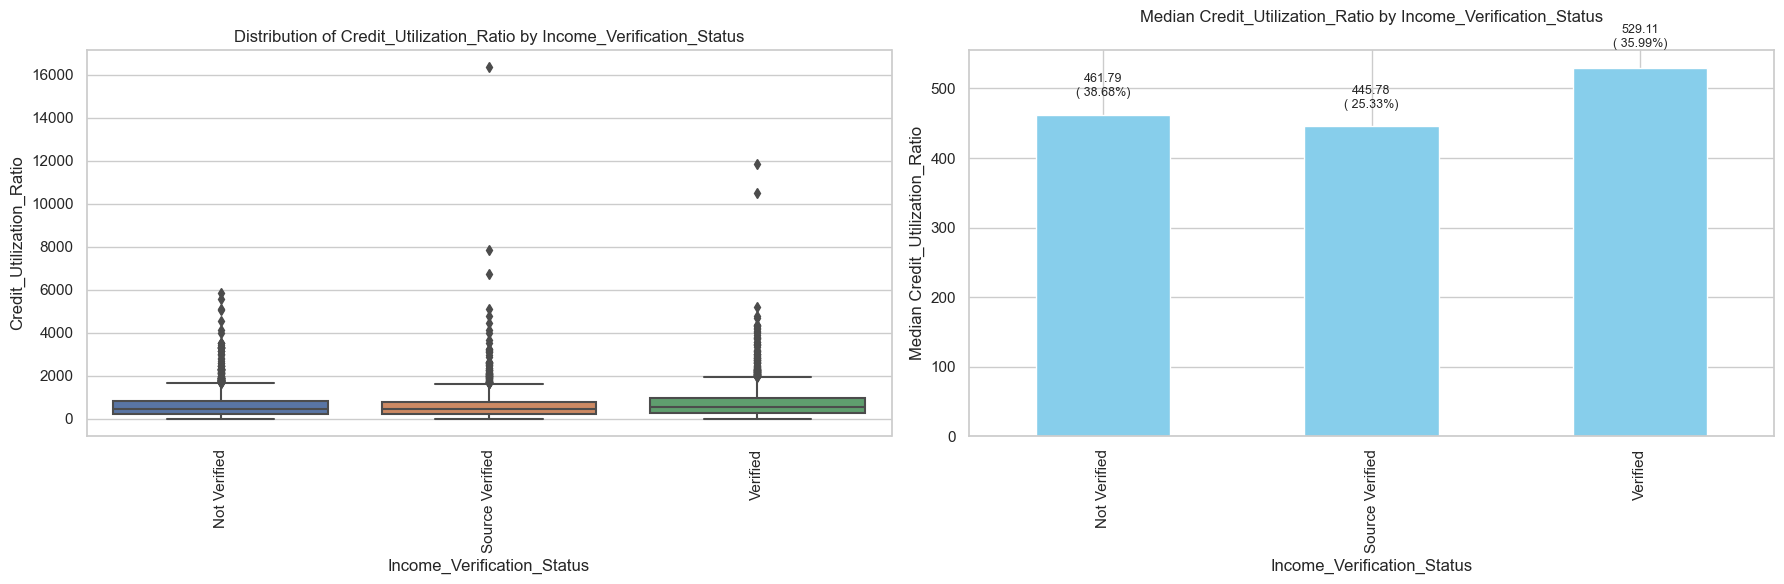

In [260]:
bivariate_analysis(df, 'Income_Verification_Status', 'Credit_Utilization_Ratio')

<br><font color='red'> **Insight :**</font> 
1. Verified income borrowers have a higher median credit utilization ratio of 529.11 compared to unverified and source-verified income borrowers, with medians of 461.79 and 445.78, respectively.
2. The spread of credit utilization ratios is wider for verified income borrowers, suggesting greater variability in their credit usage habits.
3. 
Regarding default rates, borrowers with unverified income have the highest default rate at 38.68%, followed by verified borrowers at 35.99%. Source-verified borrowers show the lowest default rate of 25.33%.

<font color='red'> **Recommendation :**</font>
1. To address the higher default rates among borrowers with unverified income, the online loan marketplace should improve risk assessment strategies.
2. Continuously monitor and analyze credit utilization patterns to identify early signs of potential defaults among borrowers with unverified income.

#### 3. Credit Grade vs. Interest Rates

Describe function output for Boxplot (Credit_Grade):
               count  mean  std   min   25%   50%   75%   max
Credit_Grade                                                 
A             593.00  7.59 1.02  5.42  6.91  7.51  8.49  9.63
B            1378.00 11.13 0.89  8.88 10.38 11.12 11.83 12.69
C            1325.00 13.60 0.99 10.28 12.99 13.49 14.22 16.11
D            1081.00 15.84 1.23 11.86 15.05 15.95 16.77 18.25
E             660.00 17.85 1.35 13.75 16.77 17.88 19.03 20.30
F             289.00 20.00 1.49 15.01 18.67 20.25 21.28 22.94
G              95.00 21.44 1.33 18.72 20.29 21.14 22.74 24.40

Table for Visual Data (Credit_Grade - Bar Plot):
              Median Value  Default Rate
Credit_Grade                            
A                     7.51         10.94
B                    11.12         25.42
C                    13.49         24.44
D                    15.95         19.94
E                    17.88         12.17
F                    20.25          5.33
G          

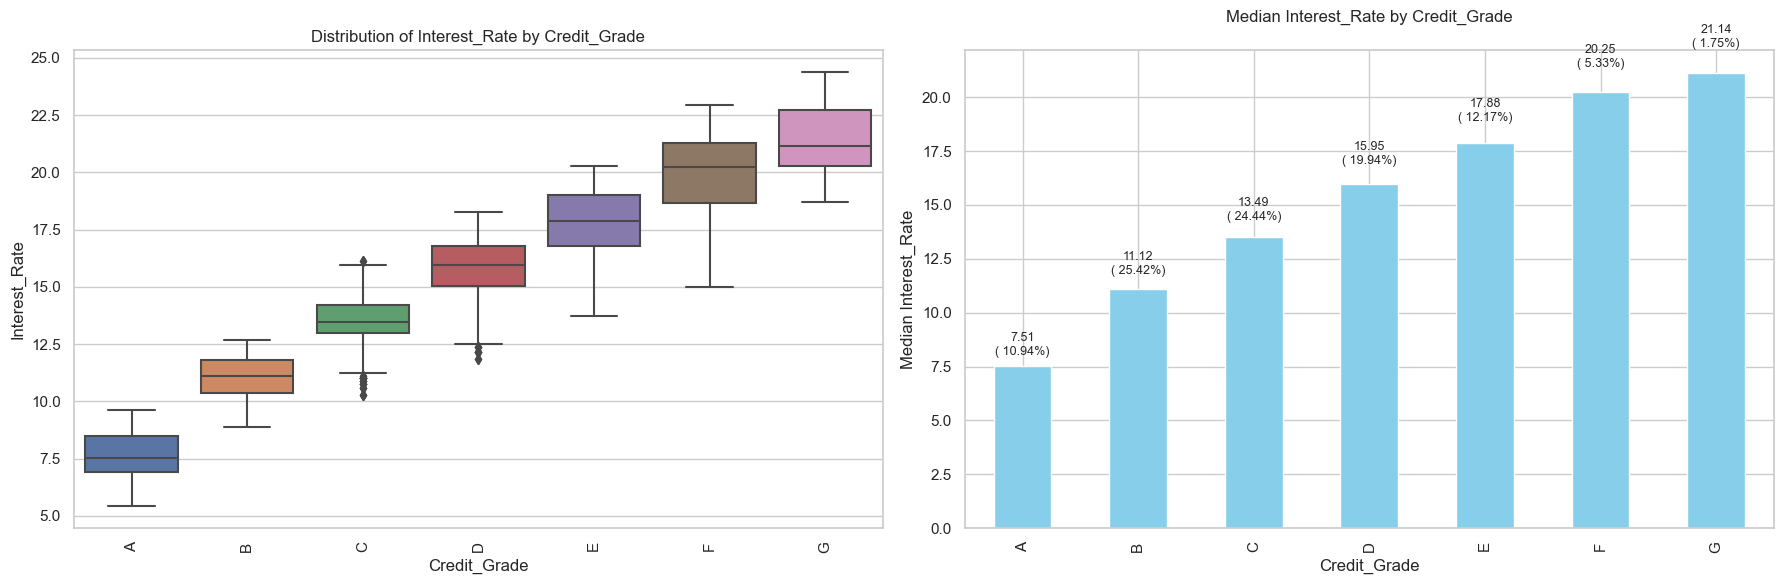

In [261]:
bivariate_analysis(df, 'Credit_Grade', 'Interest_Rate')

<br><font color='red'> **Insight :**</font> 
1. Based on the analysis, borrowers with lower credit grades, particularly grades F and G, are more likely to default on their loans,considering the number of loans issued in them

<font color='red'> **Recommendation :**</font>
1. To minimize the chances of borrowers not paying back their loans, the online loan marketplace should focus on providing more attractive terms, such as lower interest rates, to borrowers with lower credit grades, like F and G.
2. This could help encourage responsible borrowing behavior and reduce the risk of defaults.

#### 4. Home Ownership Status vs. Number of Inquiries per Credit Account

Describe function output for Boxplot (Home_Ownership_Status):
                        count  mean  std  min  25%  50%  75%  max
Home_Ownership_Status                                            
MORTGAGE              2197.00  0.14 0.19 0.00 0.00 0.09 0.20 2.67
OTHER                   17.00  0.16 0.17 0.00 0.00 0.12 0.30 0.50
OWN                    434.00  0.17 0.26 0.00 0.00 0.09 0.22 2.00
RENT                  2773.00  0.15 0.22 0.00 0.00 0.09 0.22 2.00

Table for Visual Data (Home_Ownership_Status - Bar Plot):
                       Median Value  Default Rate
Home_Ownership_Status                            
MORTGAGE                       0.09         40.53
OTHER                          0.12          0.31
OWN                            0.09          8.01
RENT                           0.09         51.15


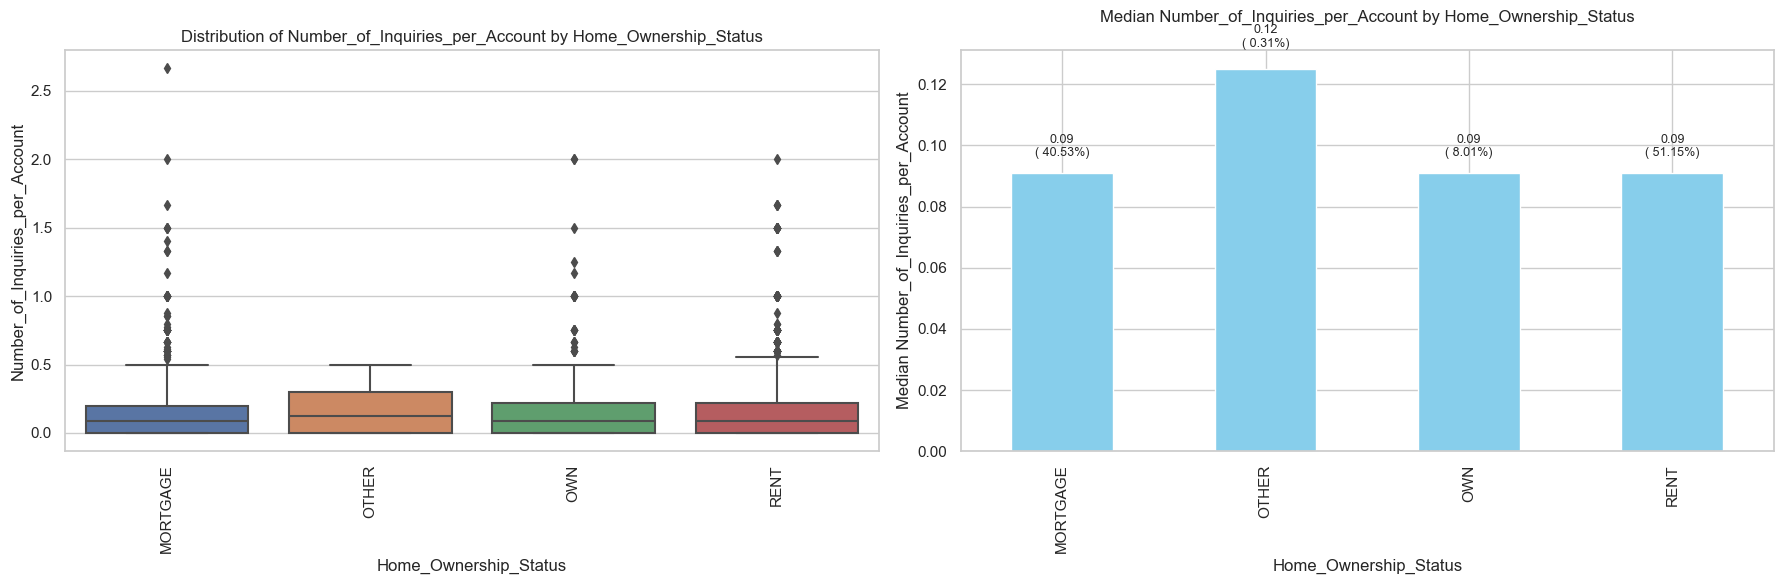

In [262]:
bivariate_analysis(df, 'Home_Ownership_Status', 'Number_of_Inquiries_per_Account')

<br><font color='red'> **Insight :**</font> 
1. Borrowers with ownership status categorized as "Own" tend to have similar median values compared to those with "Mortgage" or "Rent" statuses which is 0.09.
2. Borrowers who rent their homes have the highest default rate (51.15%), followed by those with mortgages.(40.53%)
3. Given that the median number of inquiries for both high-risk groups (RENT and MORTGAGE) is 0.09, we can infer that any number of inquiries greater than this value increases the likelihood of default, especially for these categories.

<font color='red'> **Recommendation :**</font>
1. Given the higher default rates observed among renters and mortgage holders, the online loan marketplace should implement targeted risk management strategies for these groups.
2. This may involve offering personalized assistance to help renters and mortgage holders better manage their finances and reduce default risks. 

#### 5. Credit Grade vs. Number of Delinquencies per Credit Account

Describe function output for Boxplot (Credit_Grade):
               count  mean  std  min  25%  50%  75%  max
Credit_Grade                                            
A             593.00  0.01 0.04 0.00 0.00 0.00 0.00 0.50
B            1378.00  0.01 0.06 0.00 0.00 0.00 0.00 0.60
C            1325.00  0.03 0.10 0.00 0.00 0.00 0.00 2.00
D            1081.00  0.04 0.14 0.00 0.00 0.00 0.00 2.00
E             660.00  0.03 0.09 0.00 0.00 0.00 0.00 1.00
F             289.00  0.06 0.22 0.00 0.00 0.00 0.00 2.50
G              95.00  0.06 0.14 0.00 0.00 0.00 0.07 1.00

Table for Visual Data (Credit_Grade - Bar Plot):
              Median Value  Default Rate
Credit_Grade                            
A                     0.00         10.94
B                     0.00         25.42
C                     0.00         24.44
D                     0.00         19.94
E                     0.00         12.17
F                     0.00          5.33
G                     0.00          1.75


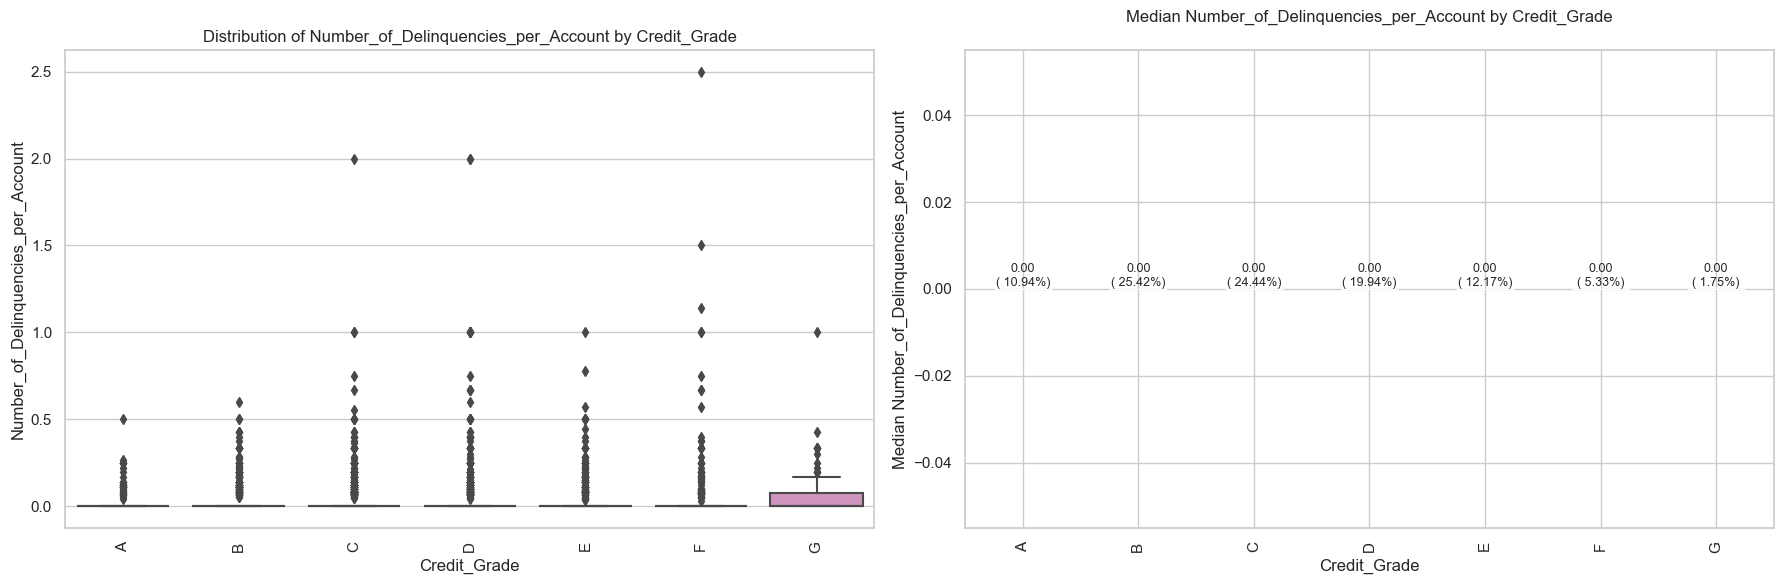

In [263]:
bivariate_analysis(df, 'Credit_Grade', 'Number_of_Delinquencies_per_Account')

<br><font color='red'> **Insight :**</font> 
1. Most borrowers across all credit grades have zero delinquencies per credit account. However, outliers with higher values exist, particularly in grades C, D, F, and G.
2. These outliers indicate that a small proportion of borrowers in these grades have multiple delinquencies per credit account.
3. Default rates tend to increase with higher numbers of delinquencies per credit account. Grades F and G, which have higher mean values (0.22 and 0.14) for delinquencies per credit account, also exhibit lower default rates (5.33% and 1.75%) compared to grades B and C with default rate 25.42% and 24.44%).

<font color='red'> **Recommendation :**</font>
1. Implement targeted interventions for borrowers in credit grades B and C, where default rates are higher.
2. Offer financial counseling or debt management assistance programs to help borrowers address their delinquencies and improve their creditworthiness. 

#### 6. Credit Utilization Ratio vs. Debt-to-Income Ratio

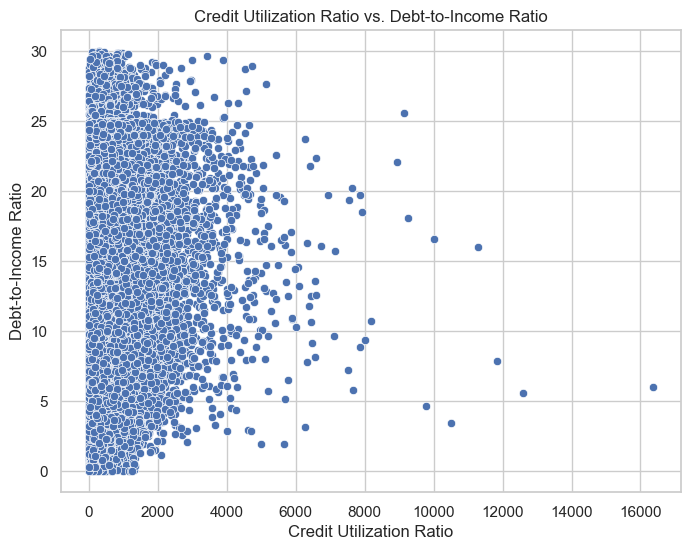

In [264]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Credit_Utilization_Ratio', y='Debt_to_Income_Ratio', data=df)
plt.title('Credit Utilization Ratio vs. Debt-to-Income Ratio')
plt.xlabel('Credit Utilization Ratio')
plt.ylabel('Debt-to-Income Ratio')
plt.grid(True)
plt.show()

In [265]:
# Define the Credit Utilization Ratio bins
bins = [0, 0.2, 0.4, 0.6, float('inf')]  # Define the bin edges

# Group the data by the bins created using pd.cut() and calculate the summary statistics for Debt-to-Income Ratio
grouped_data = df.groupby(pd.cut(df['Credit_Utilization_Ratio'], bins, labels=['0-0.2', '0.2-0.4', '0.4-0.6', '>0.6']))['Debt_to_Income_Ratio'].describe()

# Print the summary statistics
grouped_data

count  mean  std  min  25%   50%   75%   max
Credit_Utilization_Ratio                                                
0-0.2                       21.00  7.30 7.48 0.02 1.82  4.62 10.58 23.94
0.2-0.4                     25.00  9.44 6.25 0.34 5.10  9.47 12.40 26.34
0.4-0.6                     18.00  8.11 5.94 0.07 2.52  8.36 11.26 18.54
>0.6                     36734.00 13.61 6.62 0.00 8.54 13.75 18.84 29.99

<br><font color='red'> **Insight :**</font> 
1. Borrowers with Credit Utilization Ratios exceeding 0.6 have significantly higher Debt-to-Income Ratios, averaging at 13.61, and a larger standard deviation of 6.62, indicating higher debt levels with more variability.
2. Credit Utilization Ratio > 0.6: This category shows a mean DTI of 13.61, indicating higher default risk.

<font color='red'> **Recommendation :**</font>
1. People who use a lot of their available credit, especially more than 60%, often have higher levels of debt compared to what they earn. 
2. For these borrowers, lenders might want to be more careful or even offer some extra help or advice on managing their finances.

<a id="conclusion"></a>
## 5. Conclusion - Risk Criteria used to identify potential default risk in loan applications

| Criteria                       | Description                                                                                |
|--------------------------------|--------------------------------------------------------------------------------------------|
| Credit Grade                   | Grades B, C, D, E, F, G selected based on historical default rates.                        |
| Debt-to-Income Ratio (DTI)    | DTI > 13 indicates potential financial strain.                                             |
| Income Verification Status    | Not Verified status implies income uncertainty.                                            |
| Home Ownership Status         | Renters or Mortgage holders provide stable housing situations.                              |
| Number of Delinquencies       | Any delinquencies suggest past payment issues. (>0)                                         |
| Credit Utilization Ratio      | High ratios (> 0.6) indicate potential financial stress.                                   |
| Interest Rate                 | Rates between 13.23% and 14.11% associated with higher defaults.                            |
| Number of Inquiries per Account | High inquiries (> 0.09) may signal financial distress.                                   |
| Loan Purpose                  | High-risk purposes like debt_consolidation, credit_card, small_business, other.             |
| Employment Length             | Short (< 2 years) or long (>= 10 years) lengths suggest instability.                        |
| Number of Open Credit Accounts | More than median indicates higher credit exposure. (>8)                                     |

